In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from prophet import Prophet
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [44]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('main.csv')

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE (%)': mape,
        'R2 Score': r2
    }

In [3]:
df_interpolated = df

02:51:55 - cmdstanpy - INFO - Chain [1] start processing
02:51:55 - cmdstanpy - INFO - Chain [1] done processing
02:51:55 - cmdstanpy - INFO - Chain [1] start processing
02:51:55 - cmdstanpy - INFO - Chain [1] done processing
02:51:55 - cmdstanpy - INFO - Chain [1] start processing
02:51:55 - cmdstanpy - INFO - Chain [1] done processing
02:51:56 - cmdstanpy - INFO - Chain [1] start processing
02:51:56 - cmdstanpy - INFO - Chain [1] done processing
02:51:56 - cmdstanpy - INFO - Chain [1] start processing
02:51:56 - cmdstanpy - INFO - Chain [1] done processing
02:51:56 - cmdstanpy - INFO - Chain [1] start processing
02:51:56 - cmdstanpy - INFO - Chain [1] done processing
02:51:56 - cmdstanpy - INFO - Chain [1] start processing
02:51:56 - cmdstanpy - INFO - Chain [1] done processing
02:51:56 - cmdstanpy - INFO - Chain [1] start processing
02:51:56 - cmdstanpy - INFO - Chain [1] done processing
02:51:57 - cmdstanpy - INFO - Chain [1] start processing
02:51:57 - cmdstanpy - INFO - Chain [1]

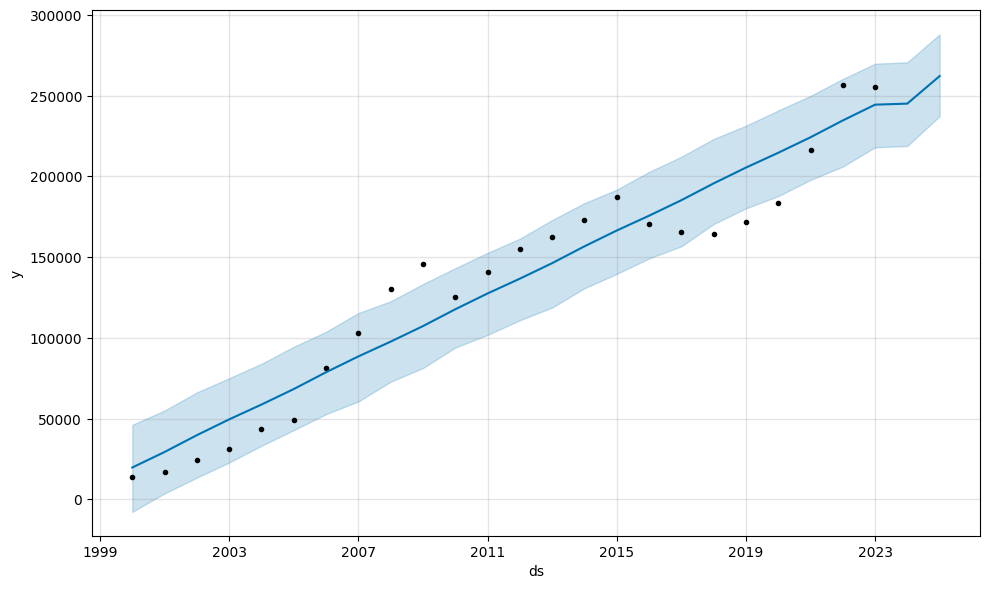

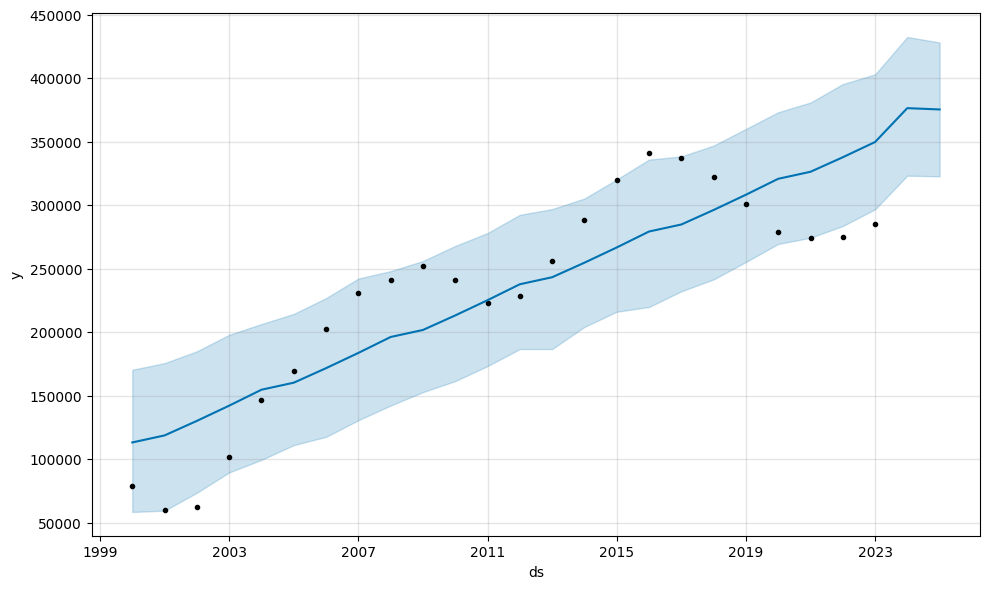

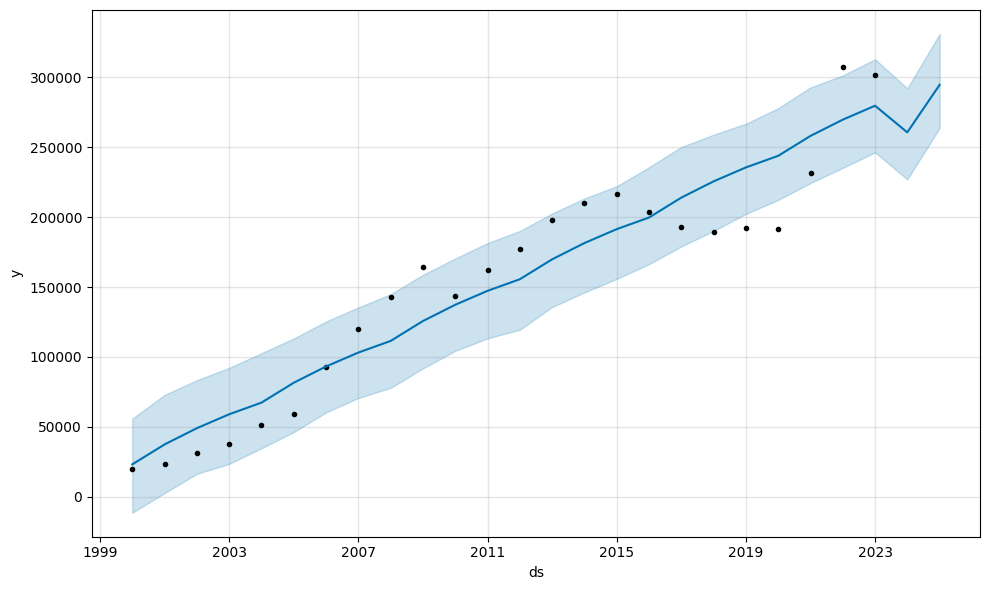

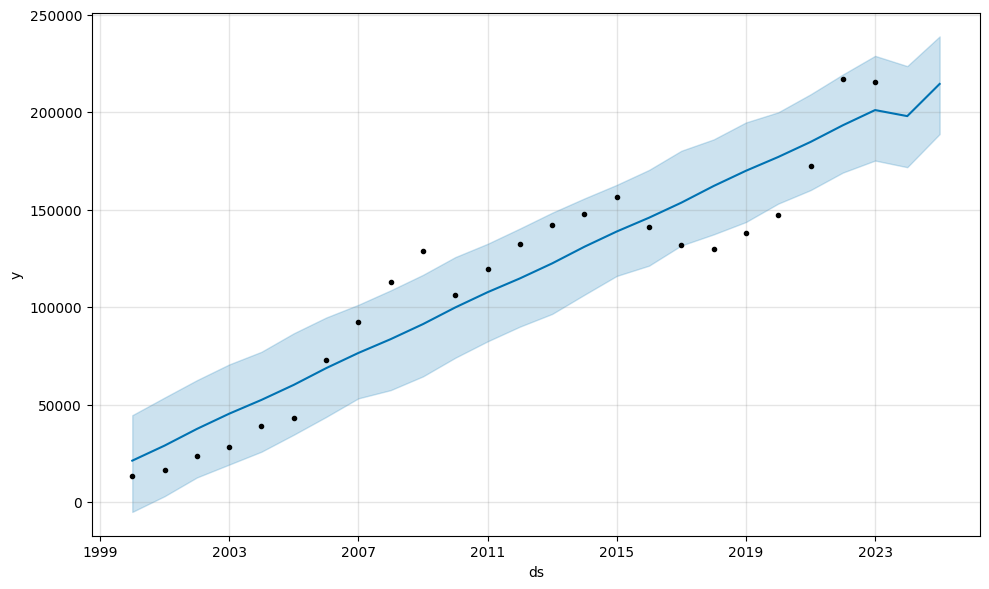

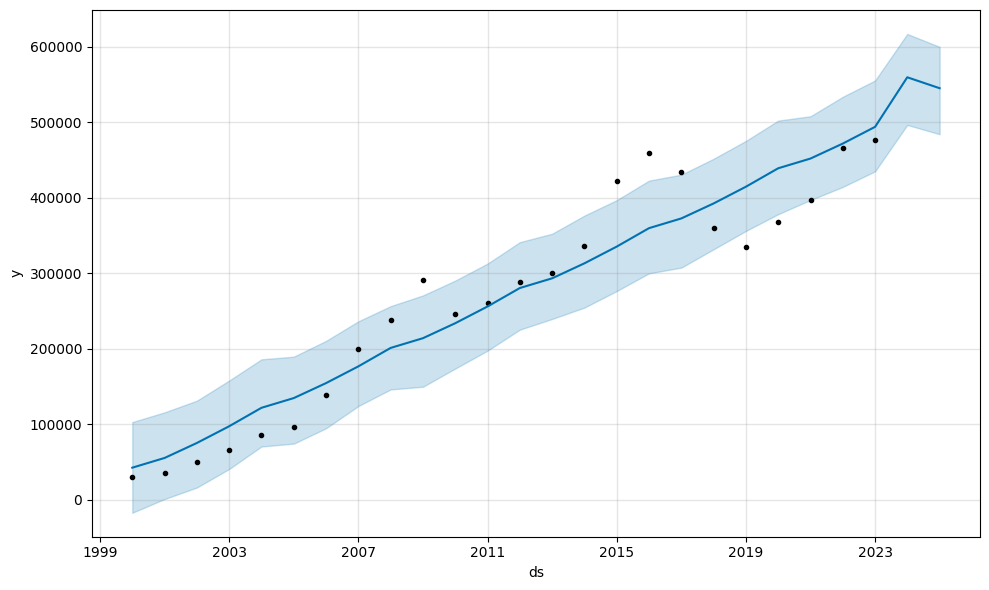

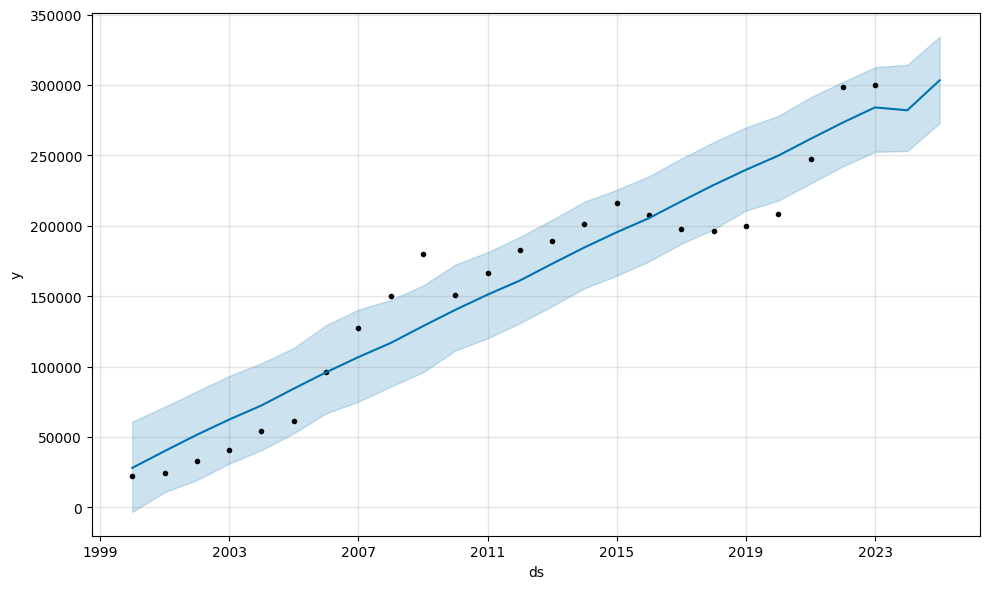

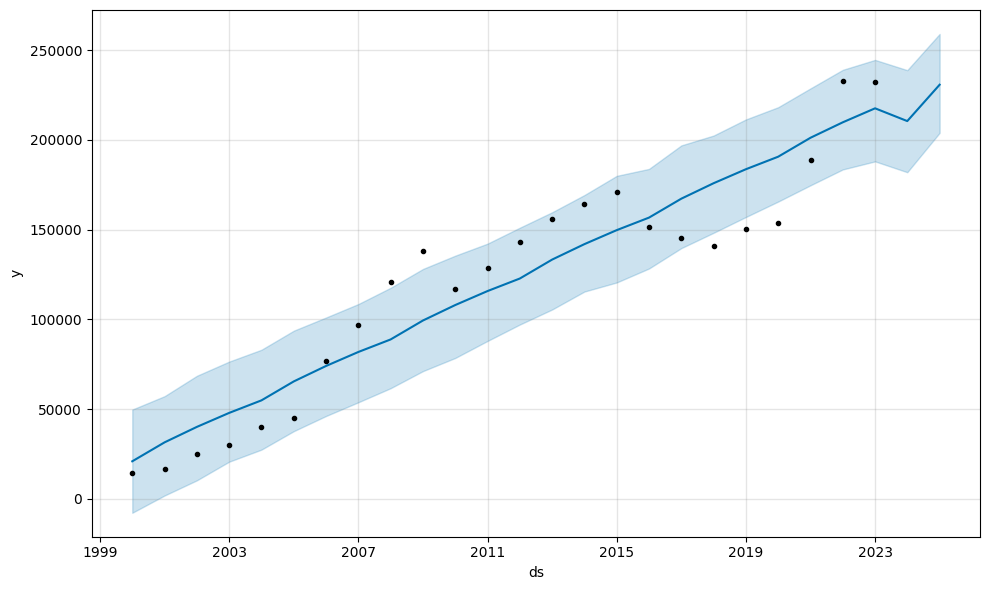

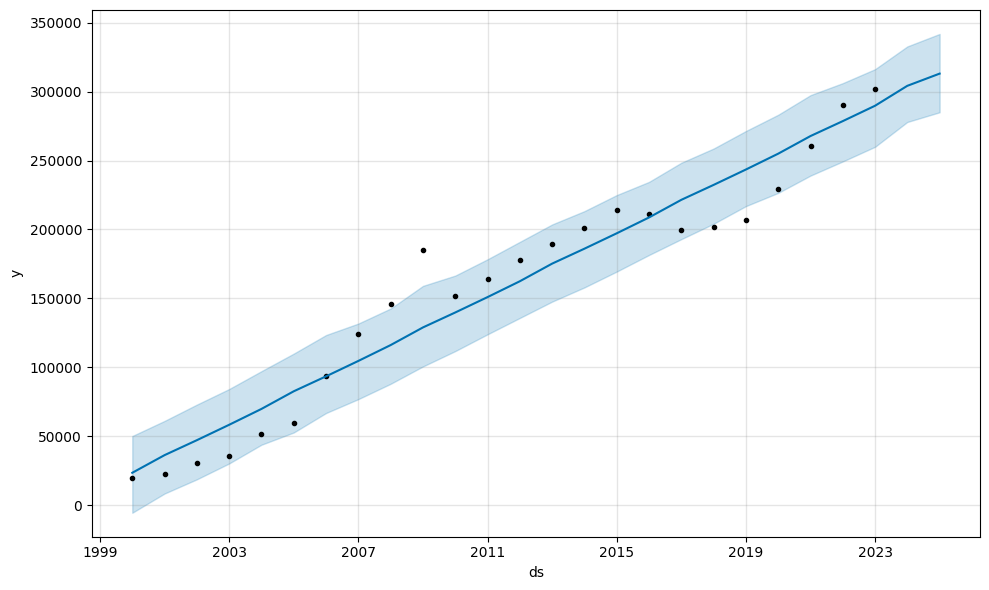

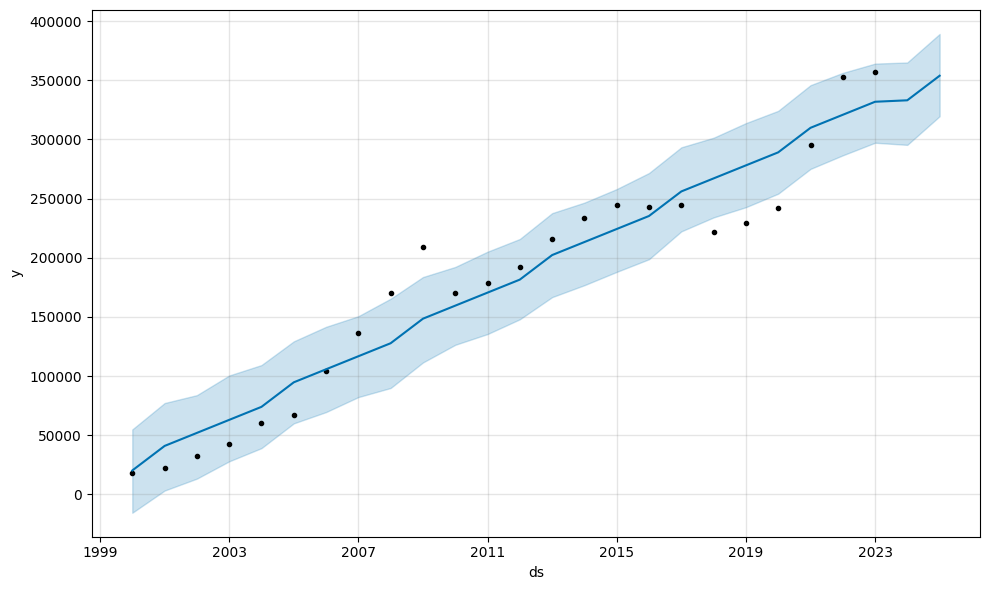

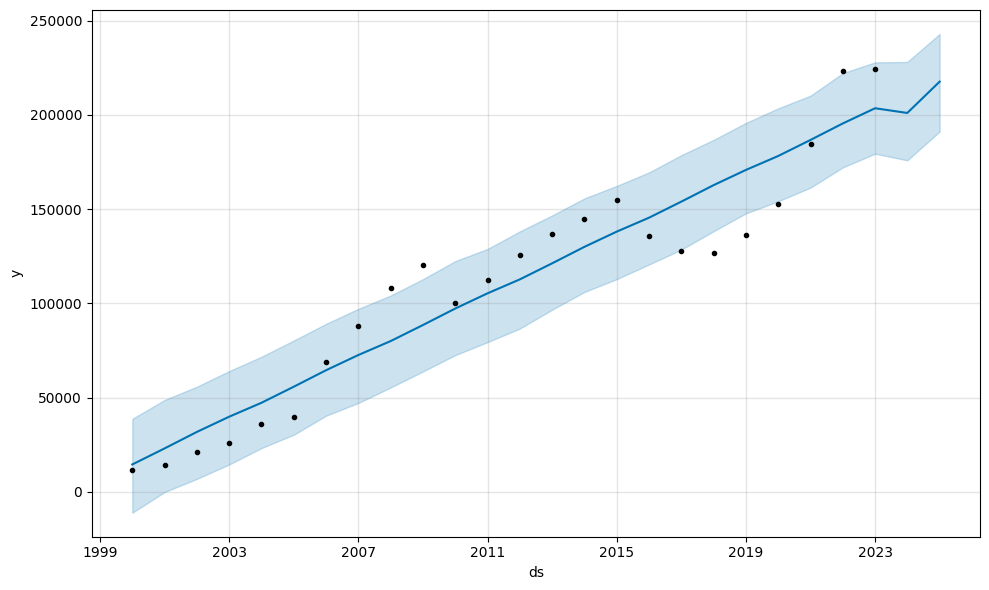

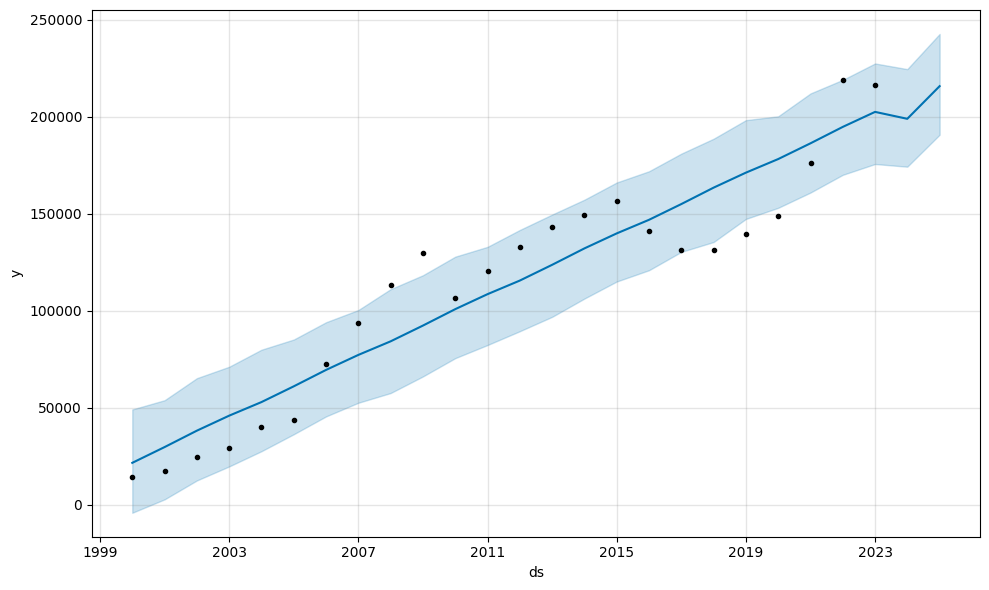

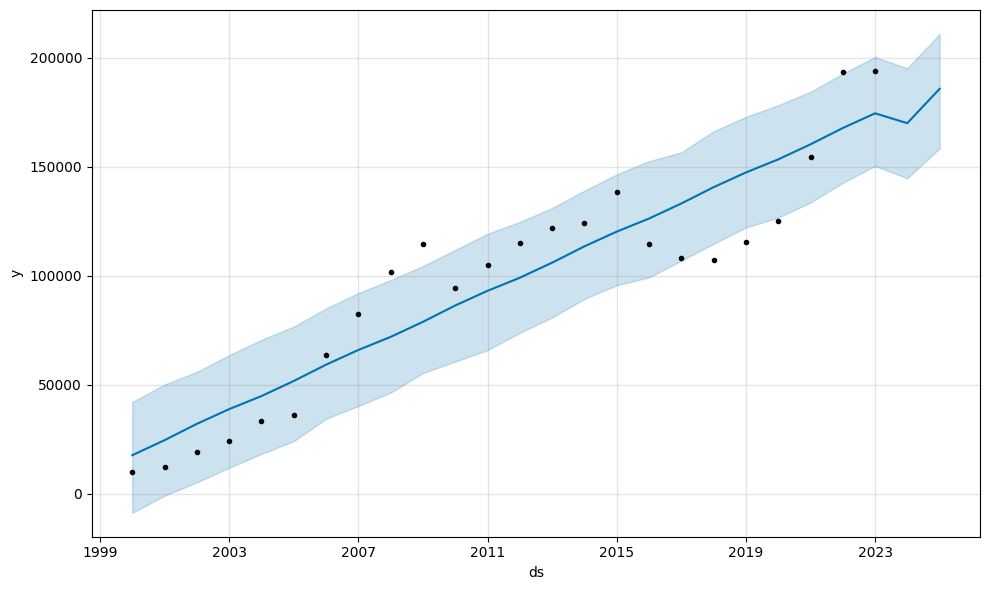

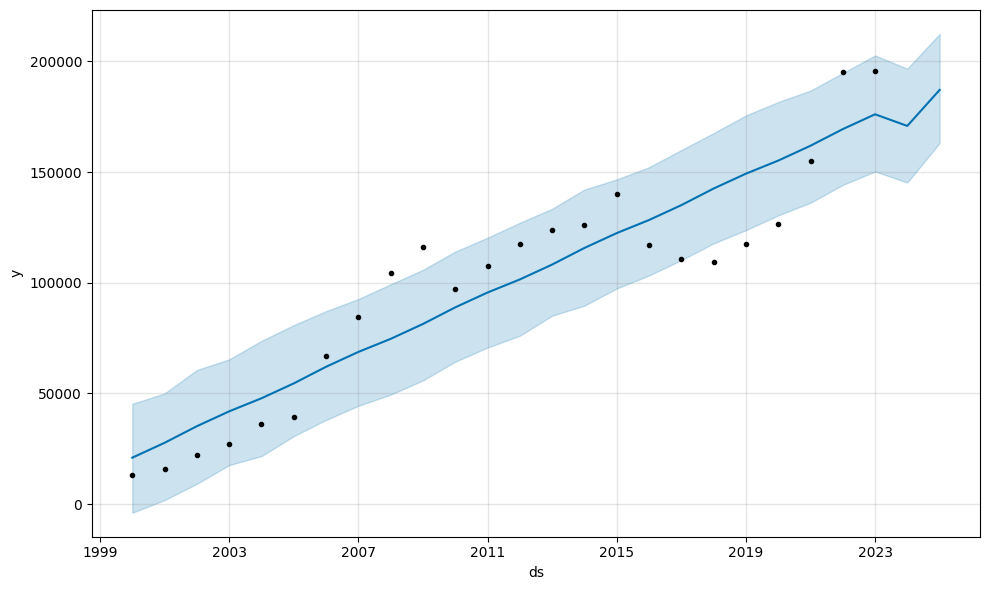

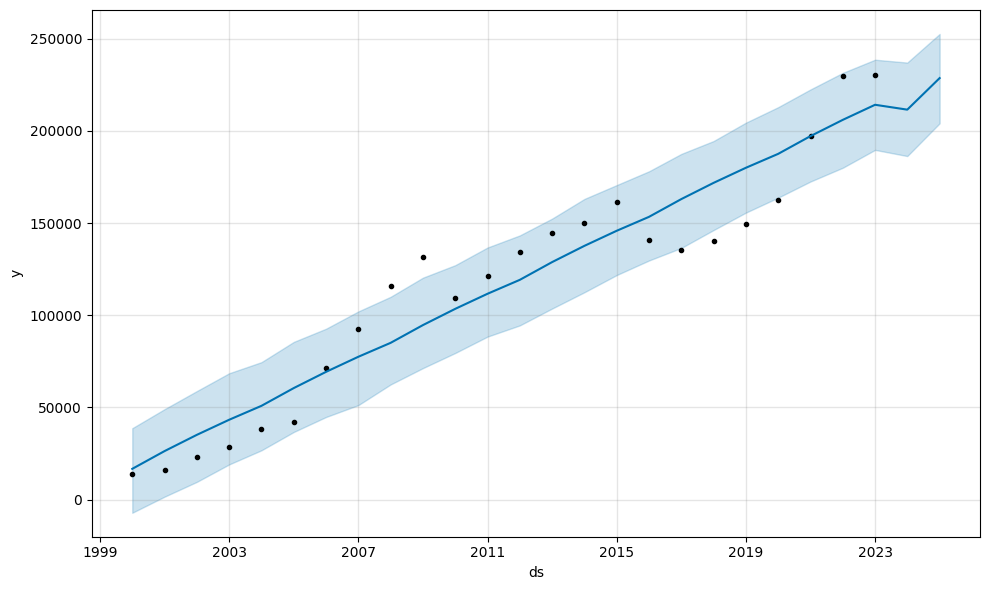

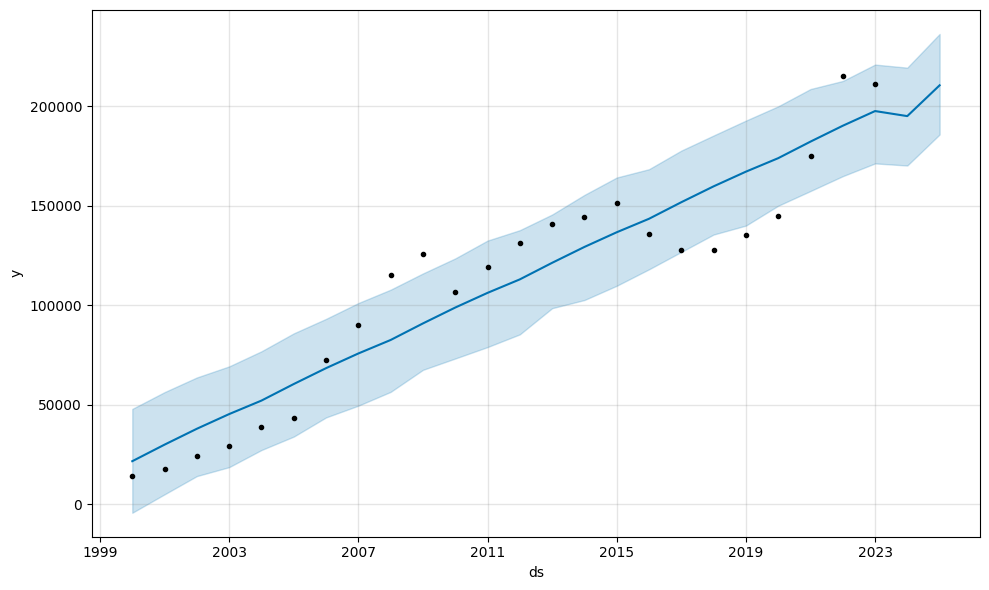

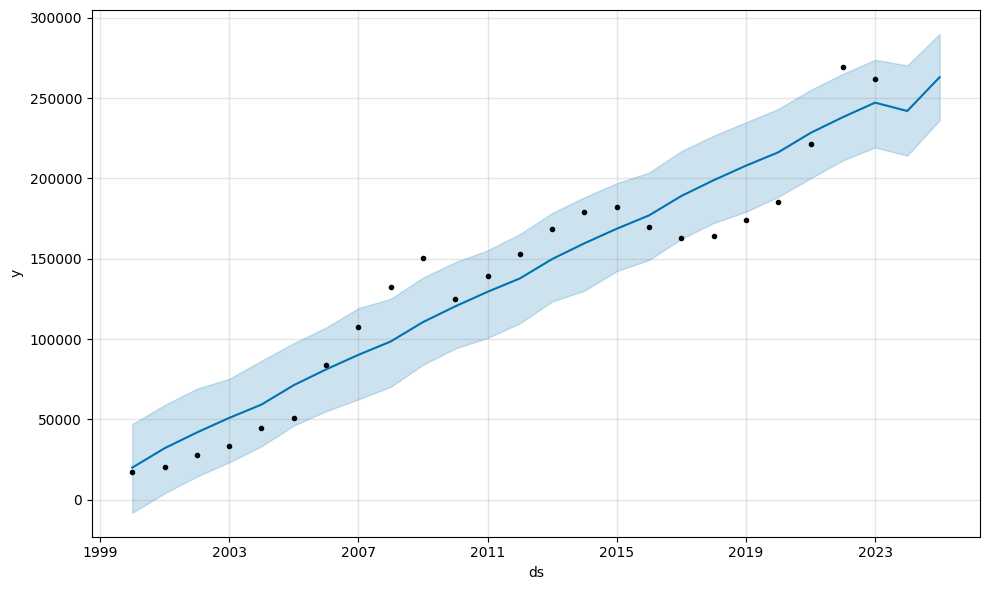

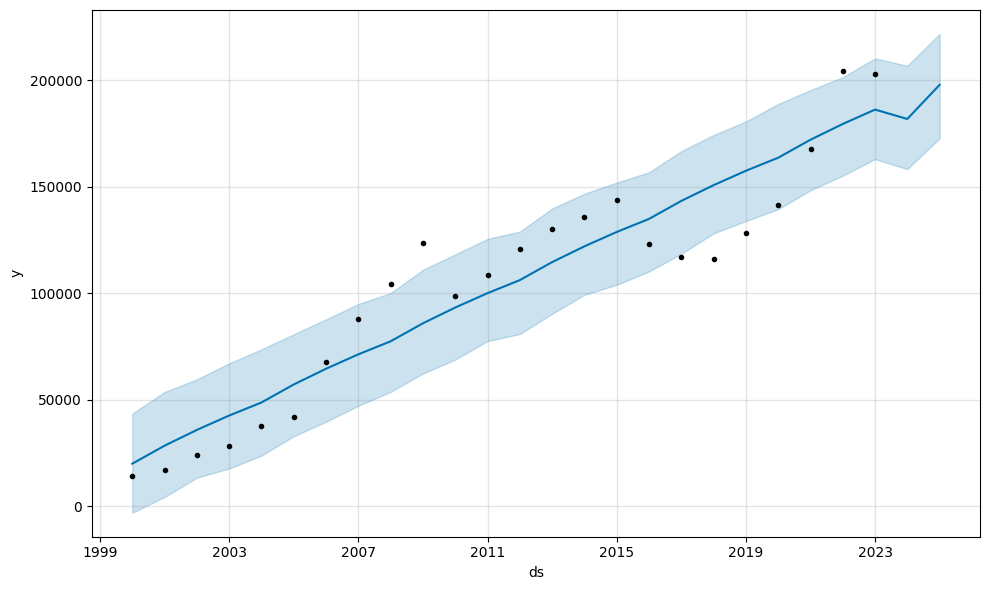

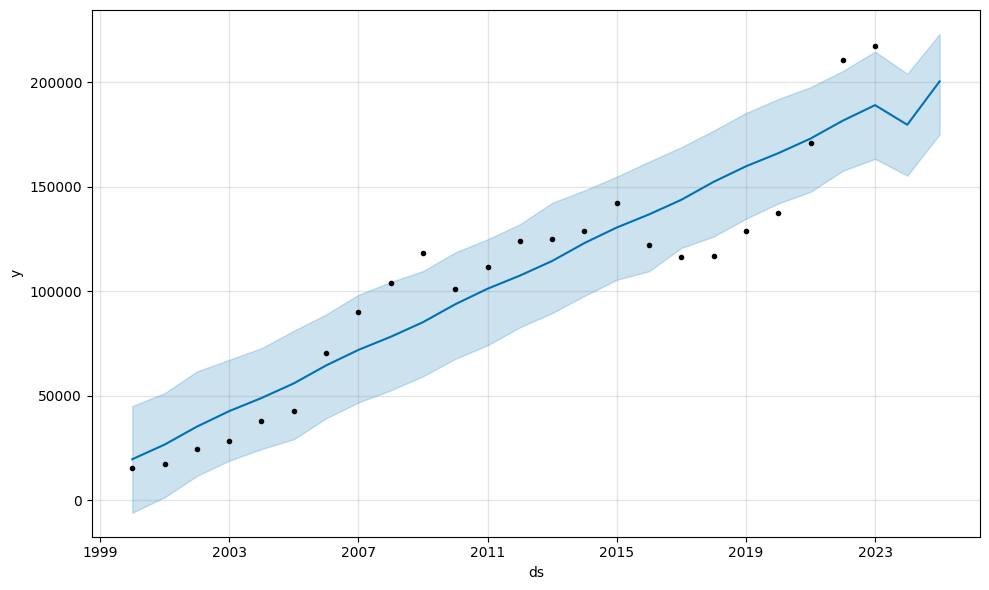

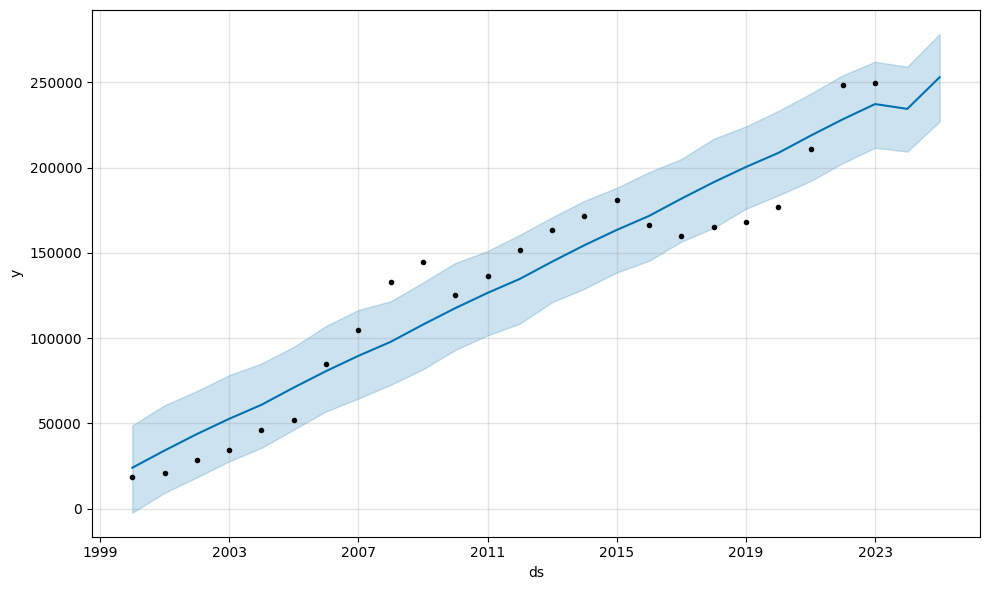

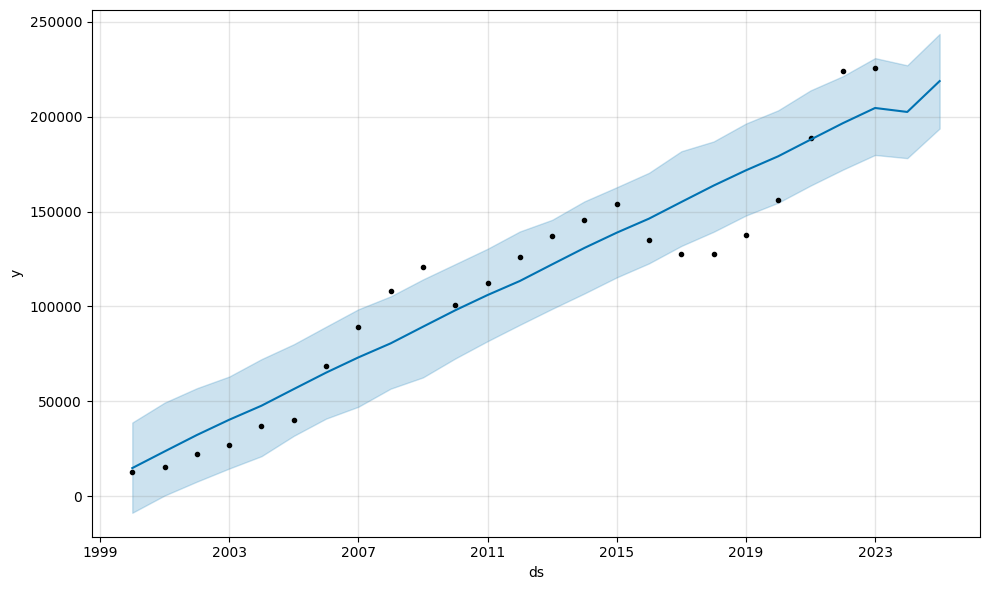

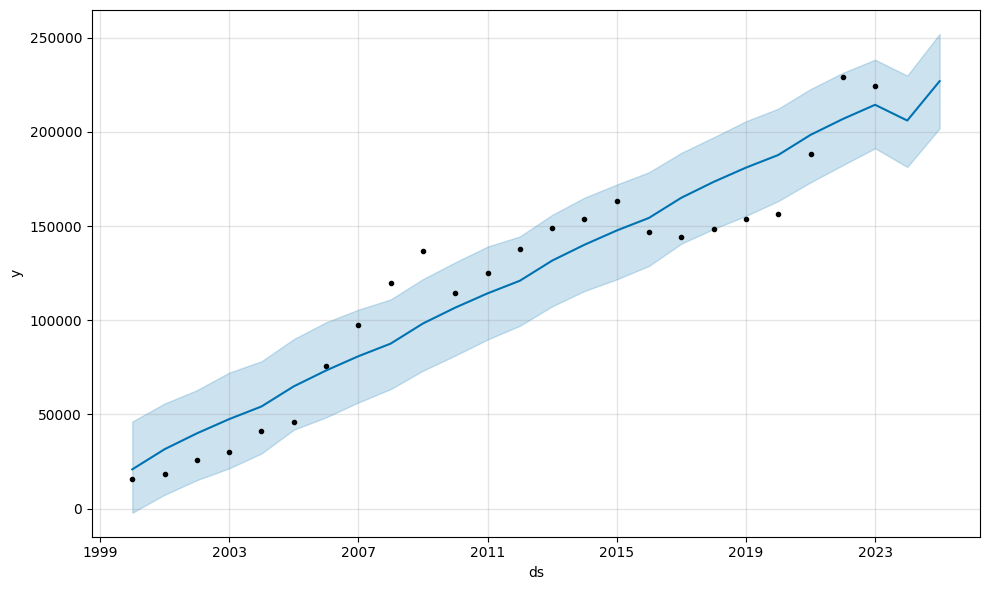

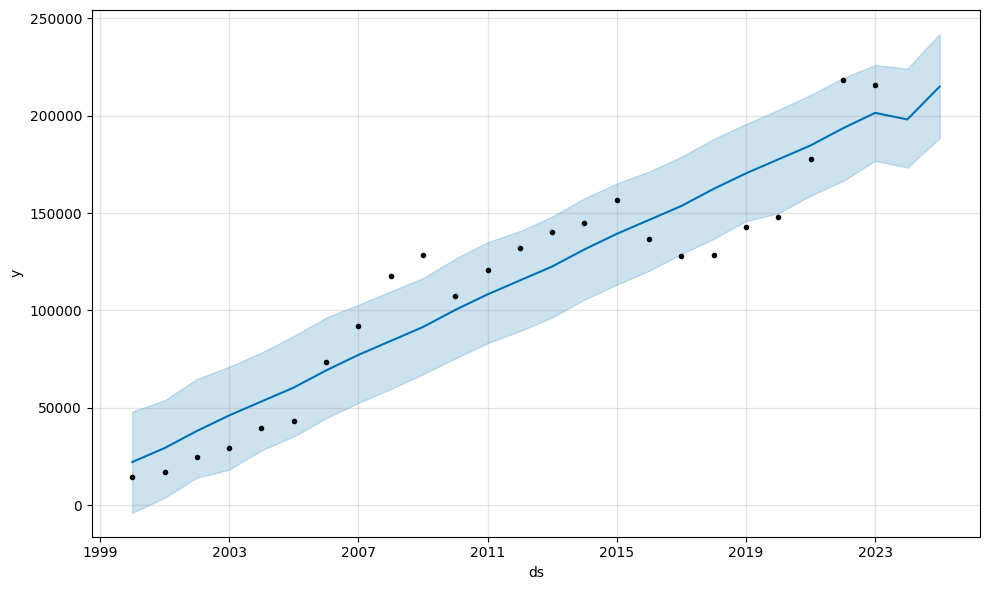

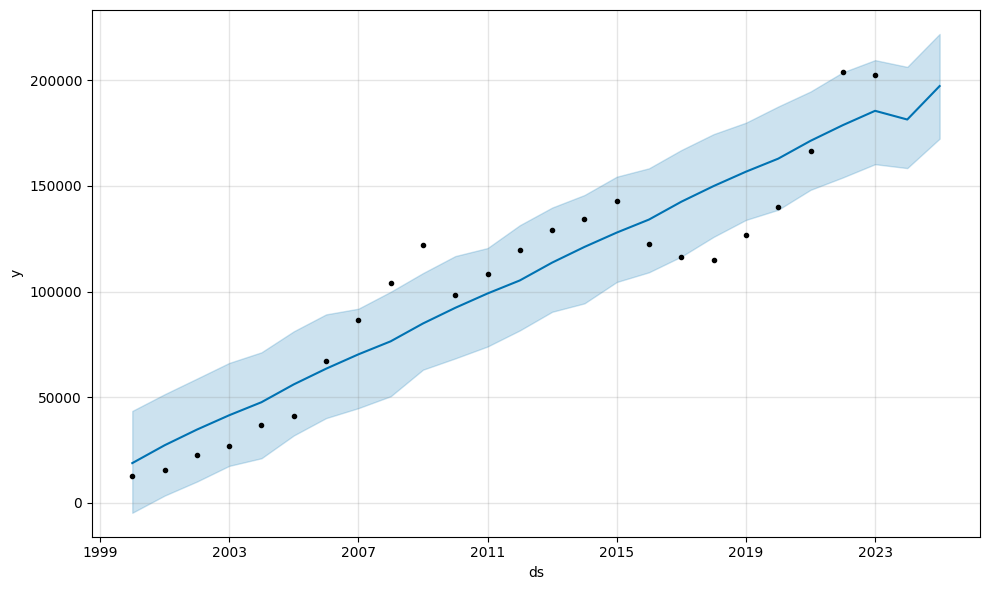

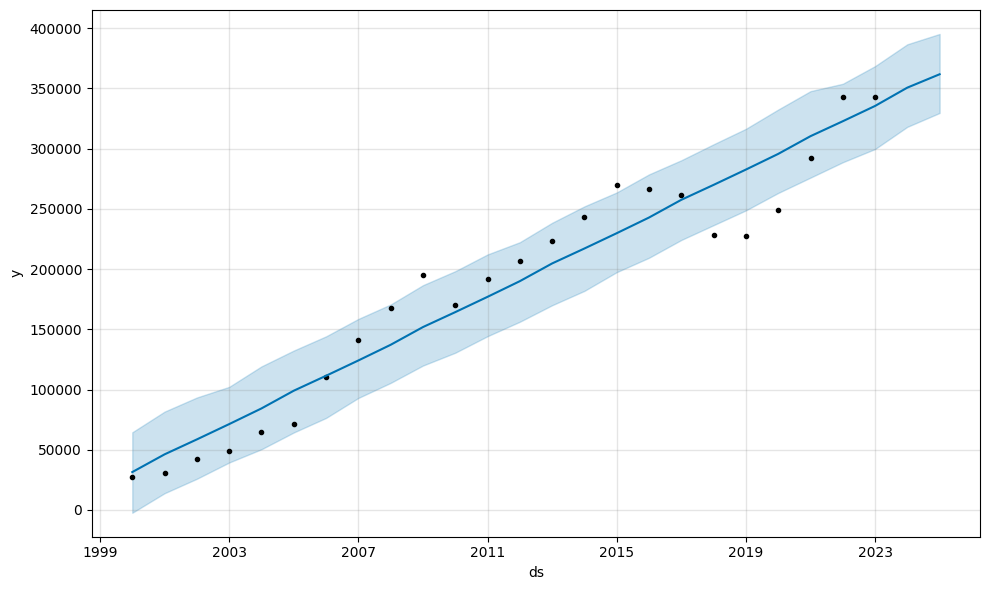

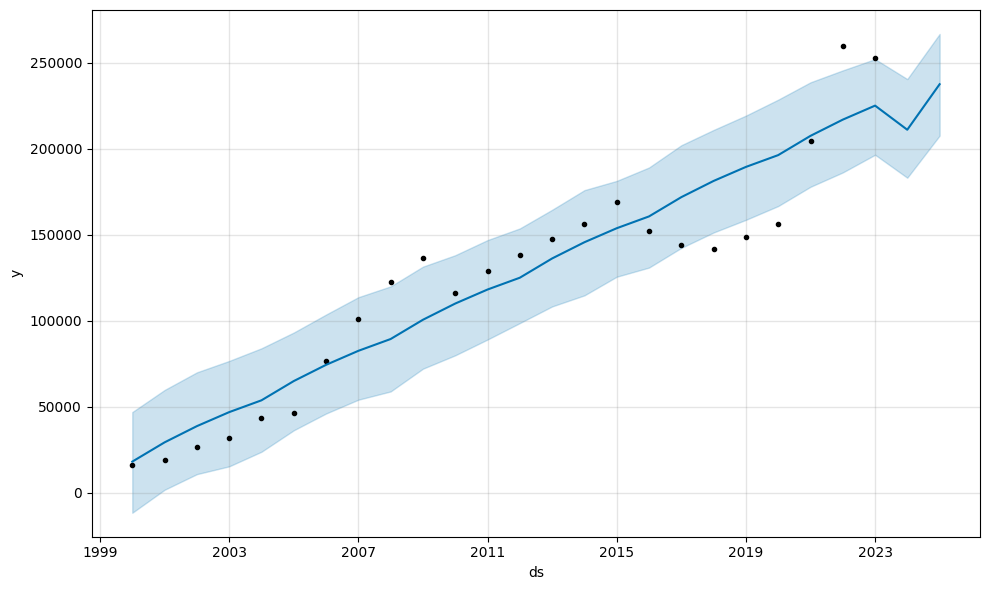

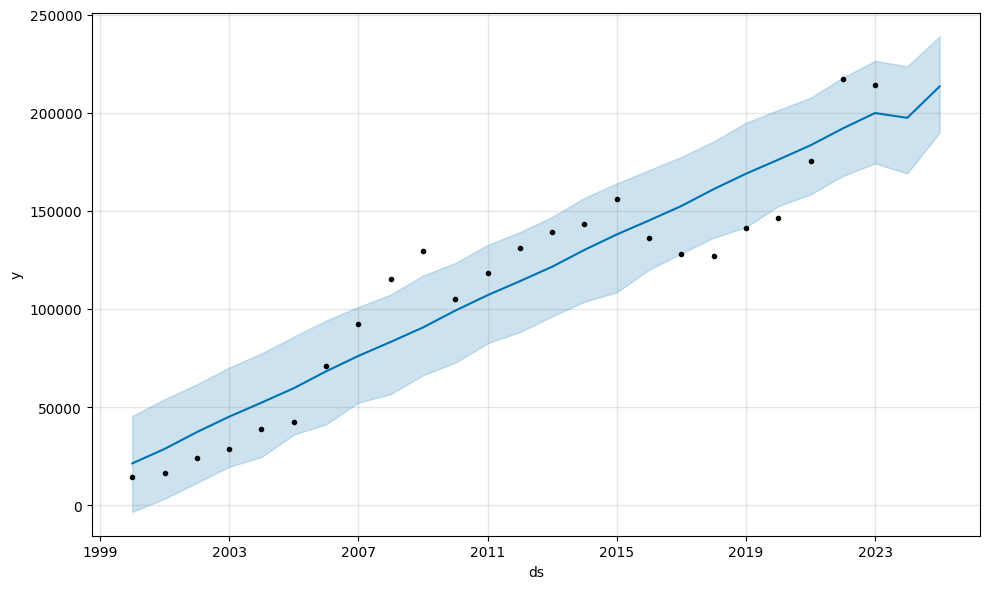

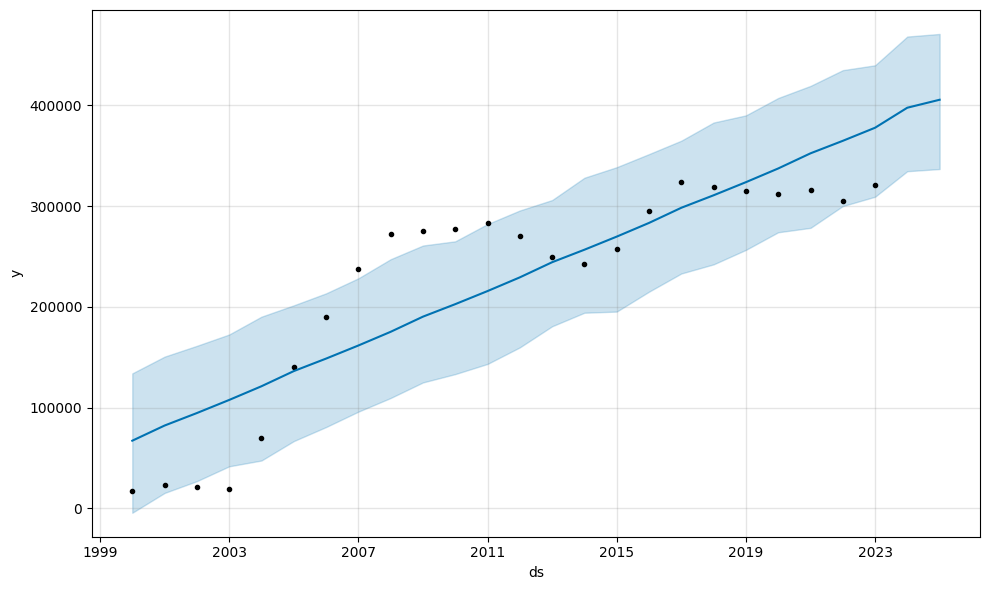

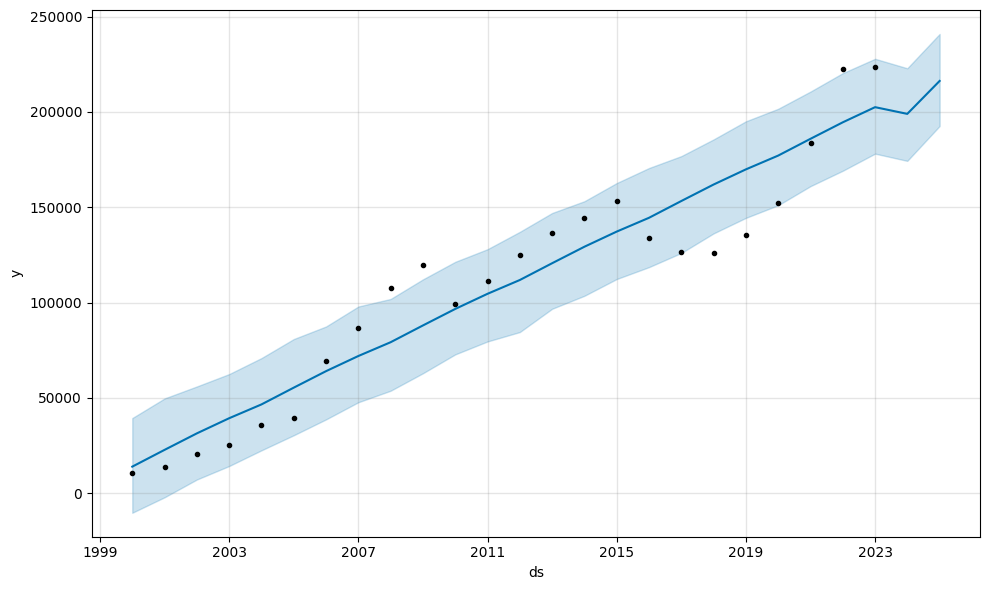

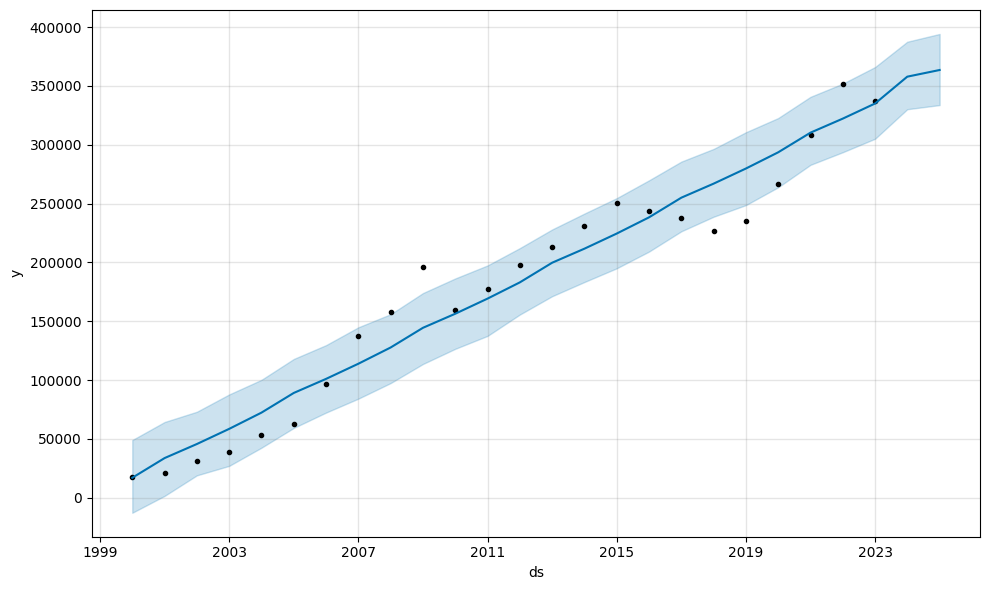

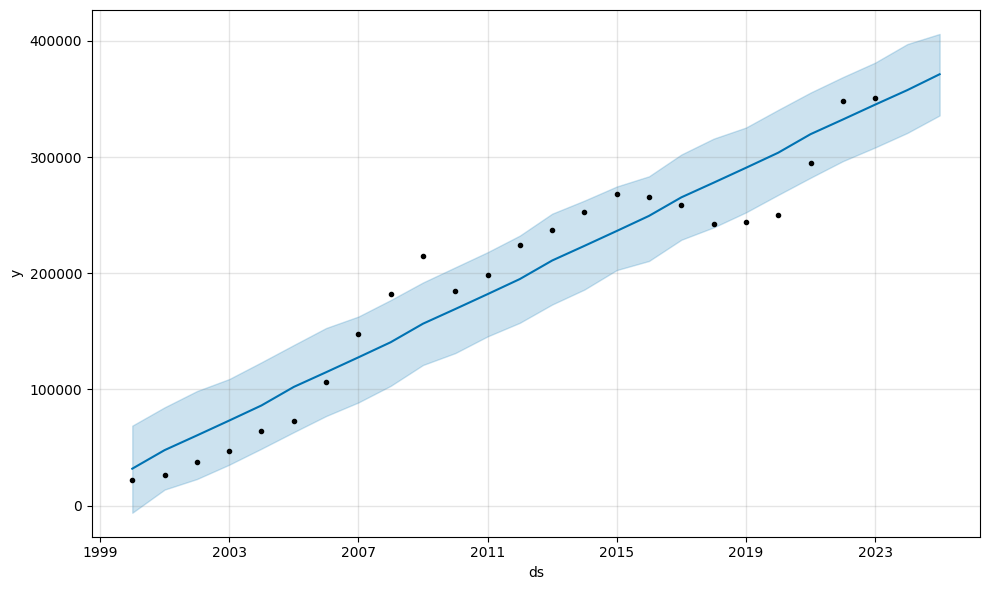

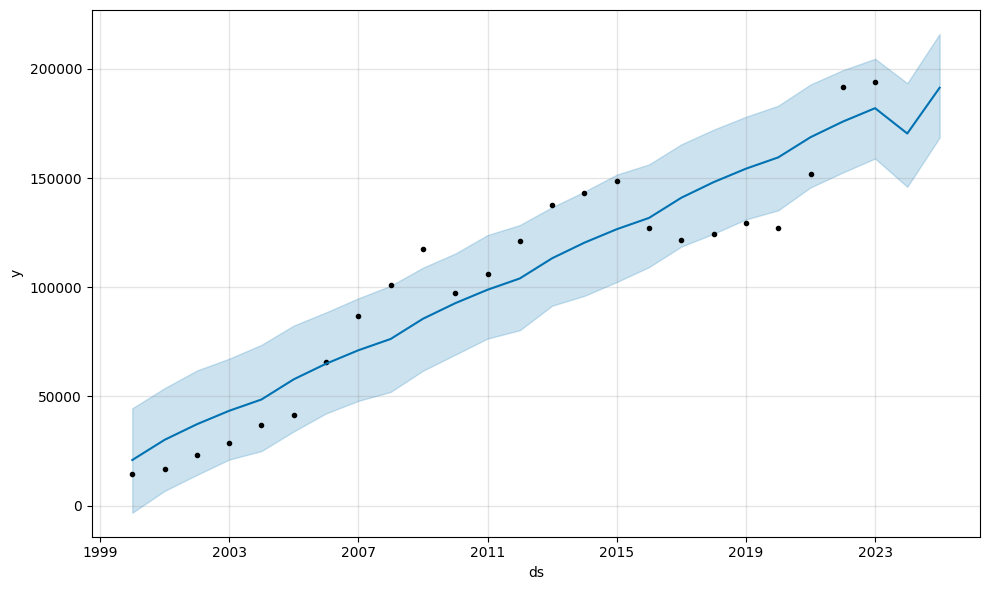

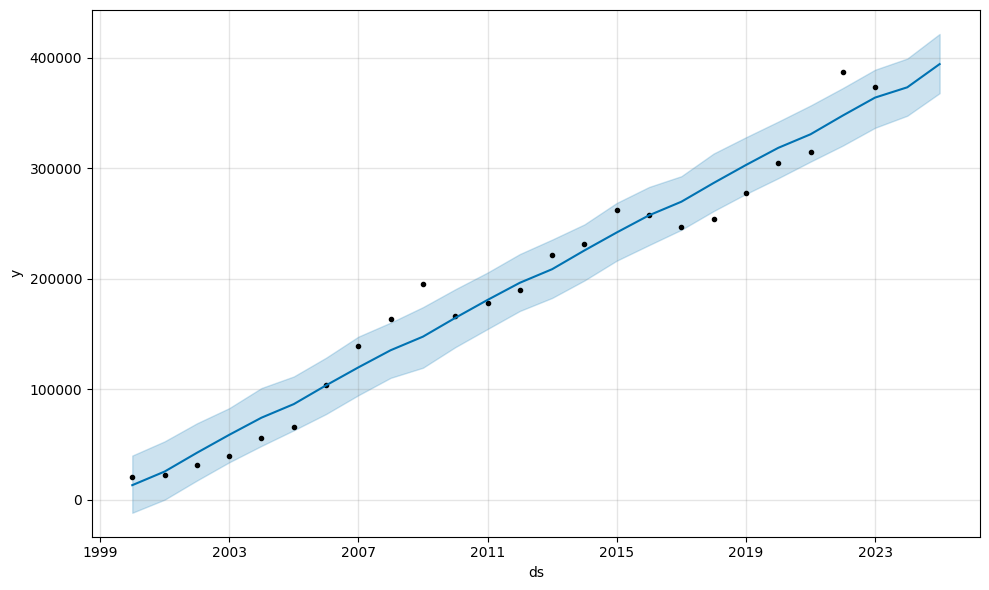

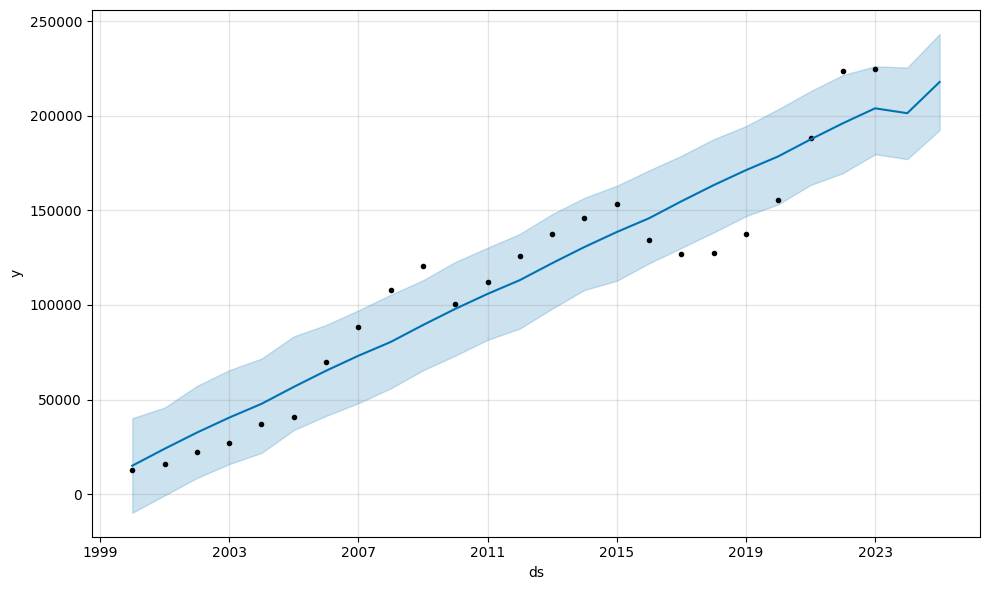

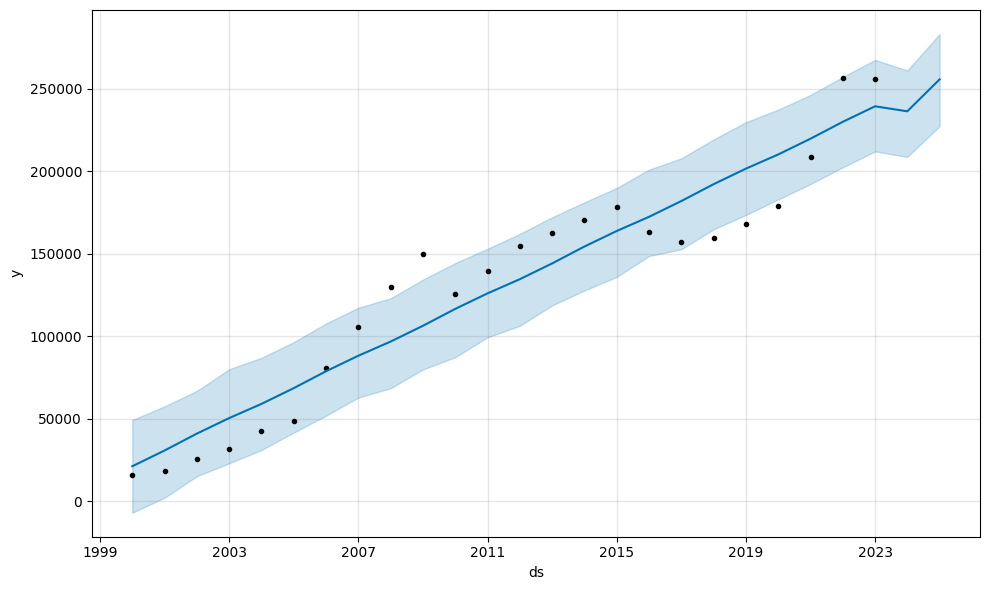

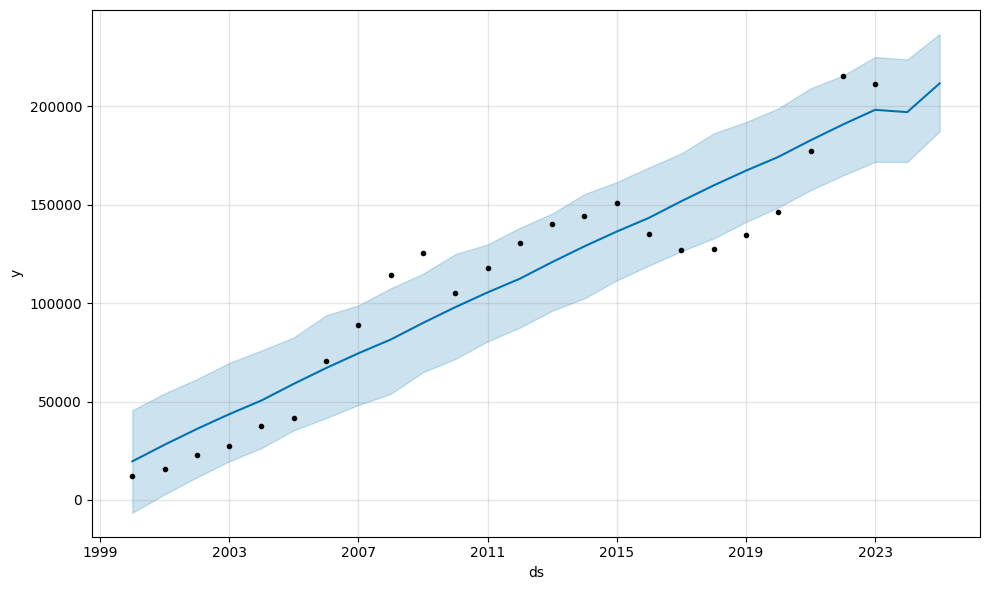

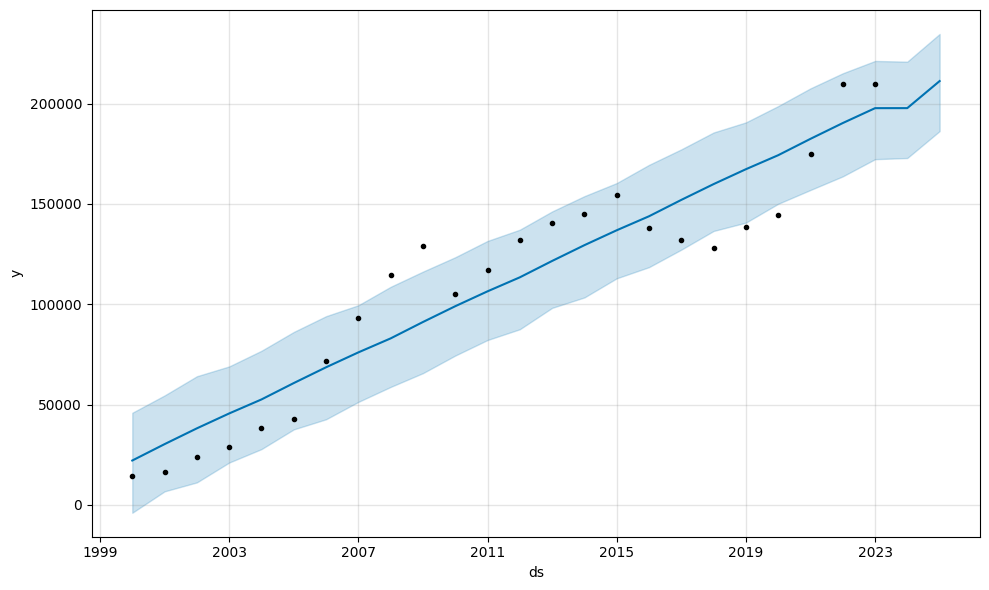

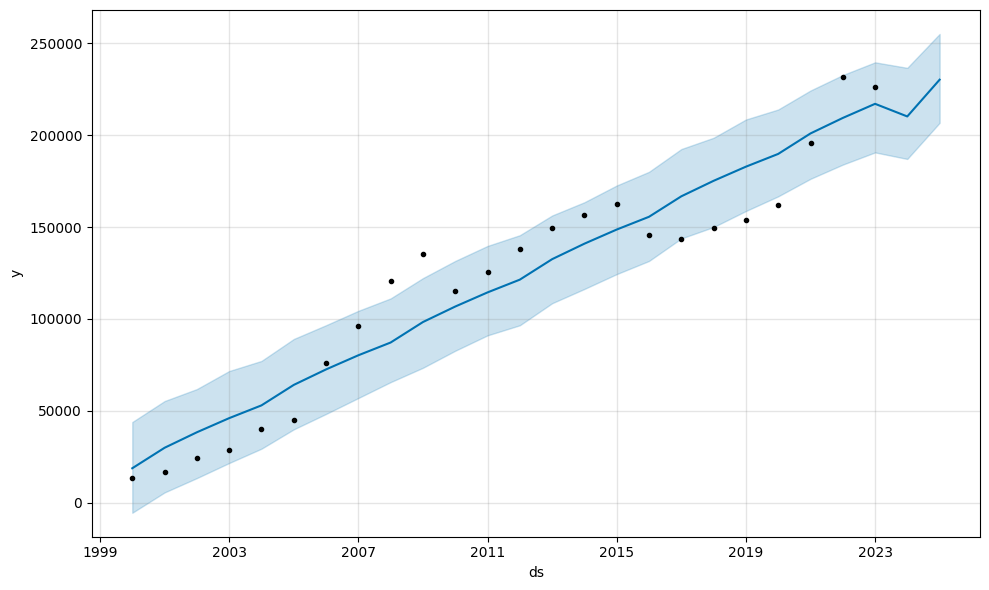

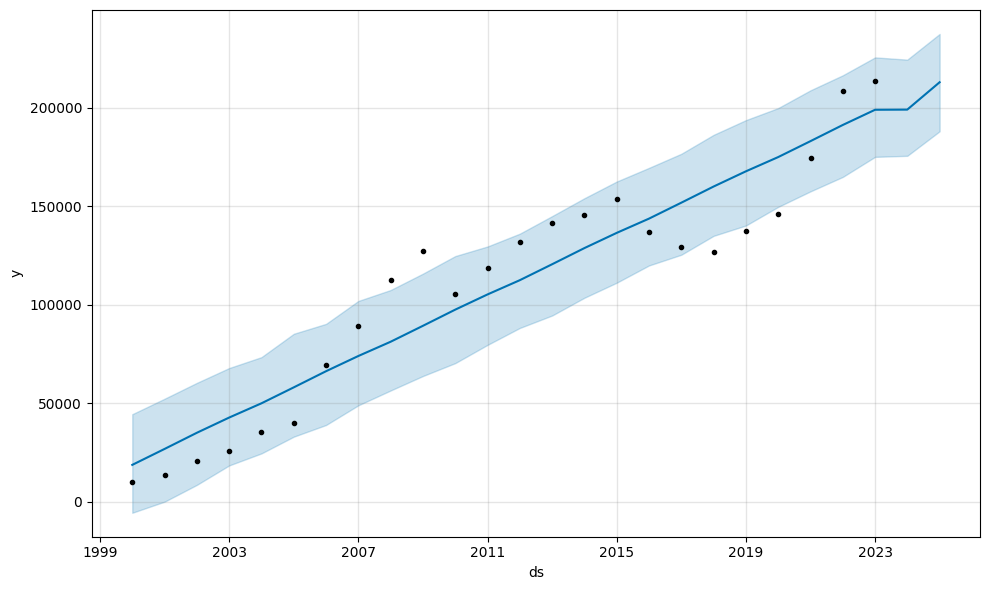

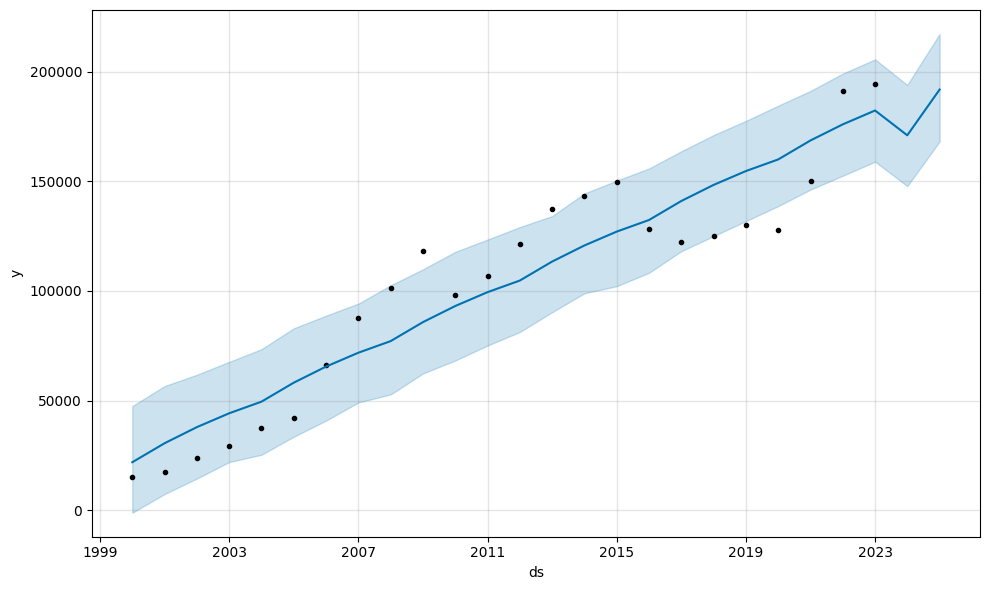

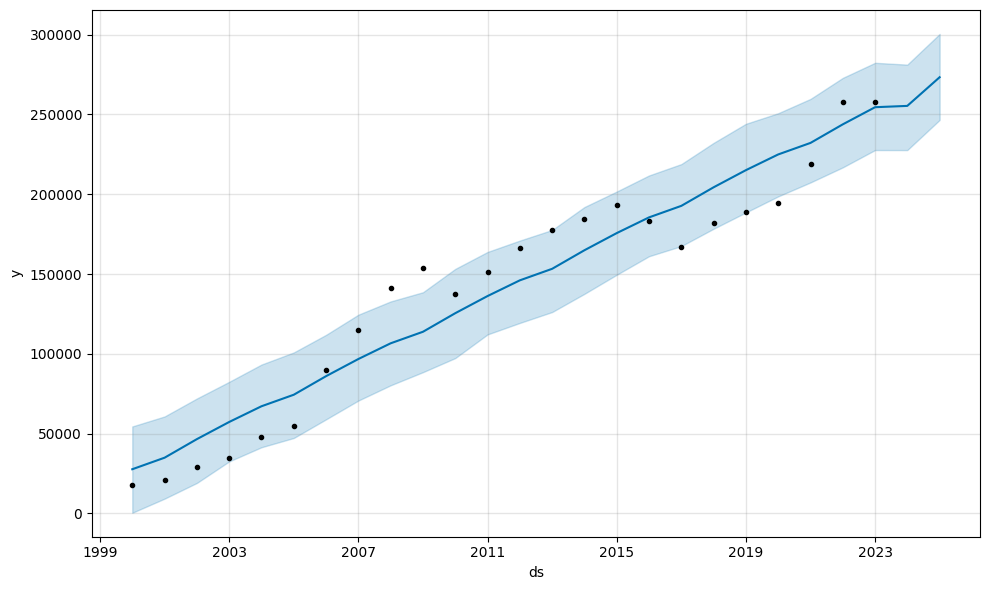

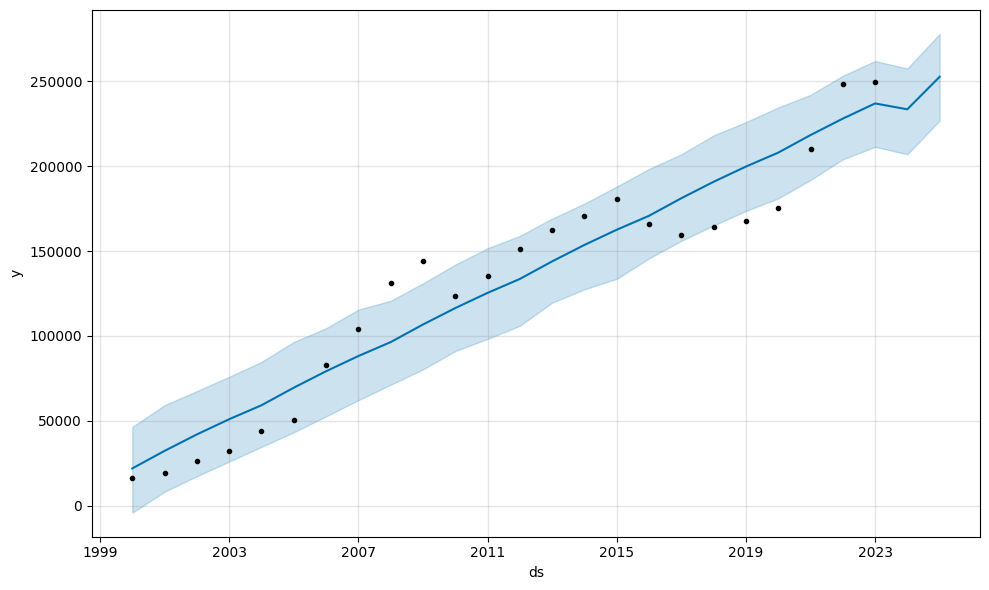

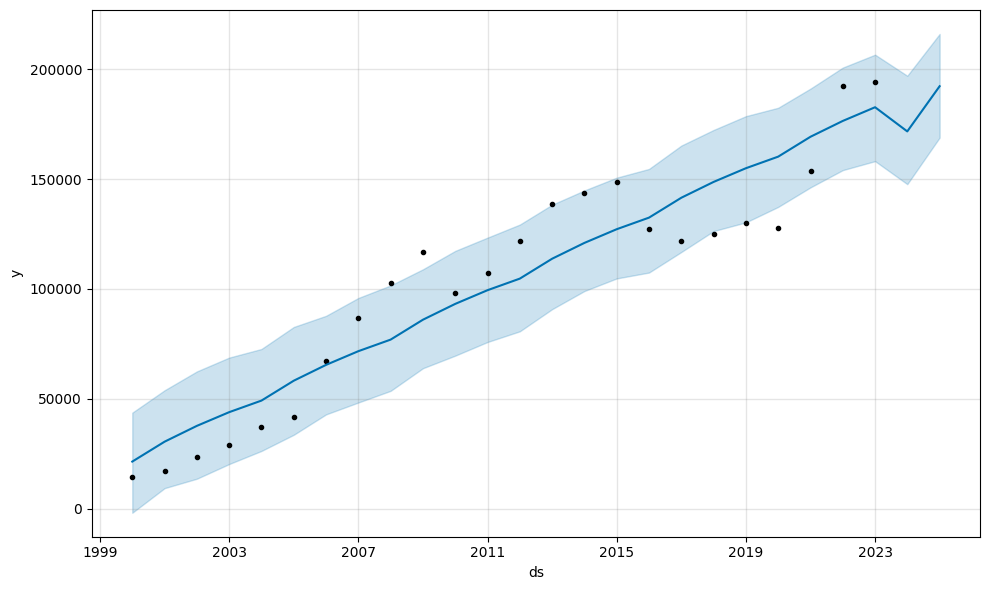

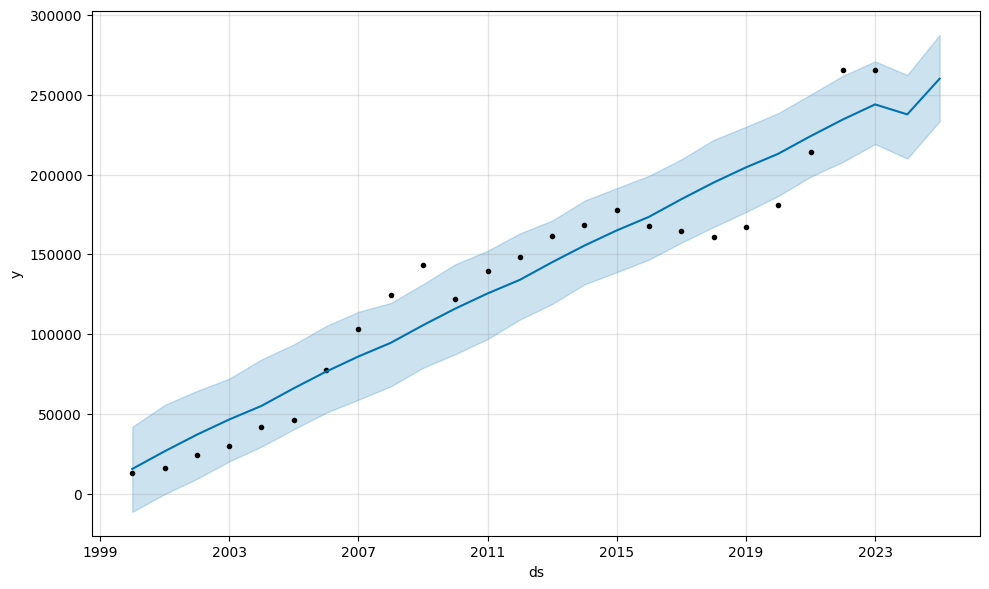

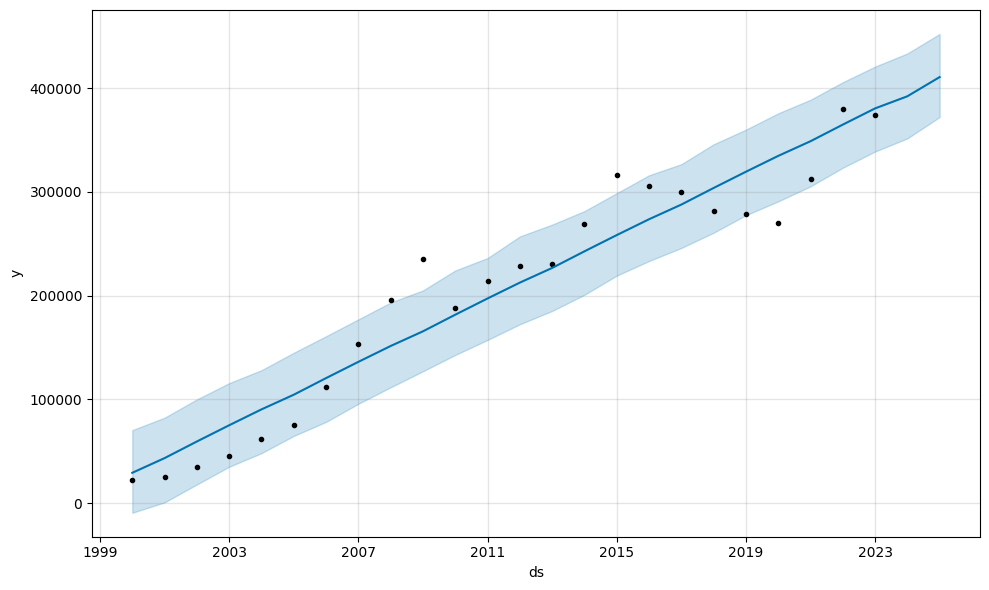

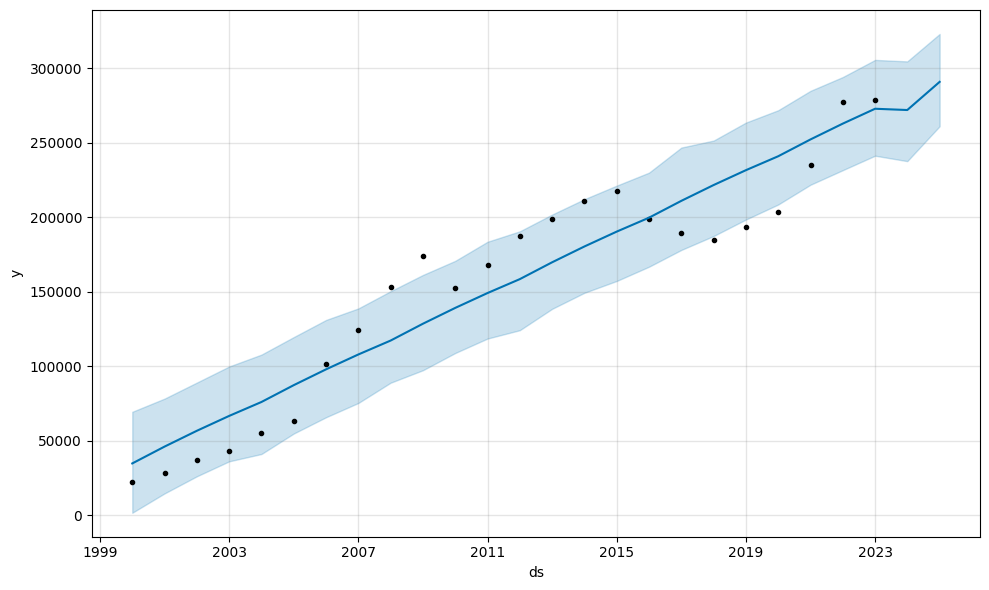

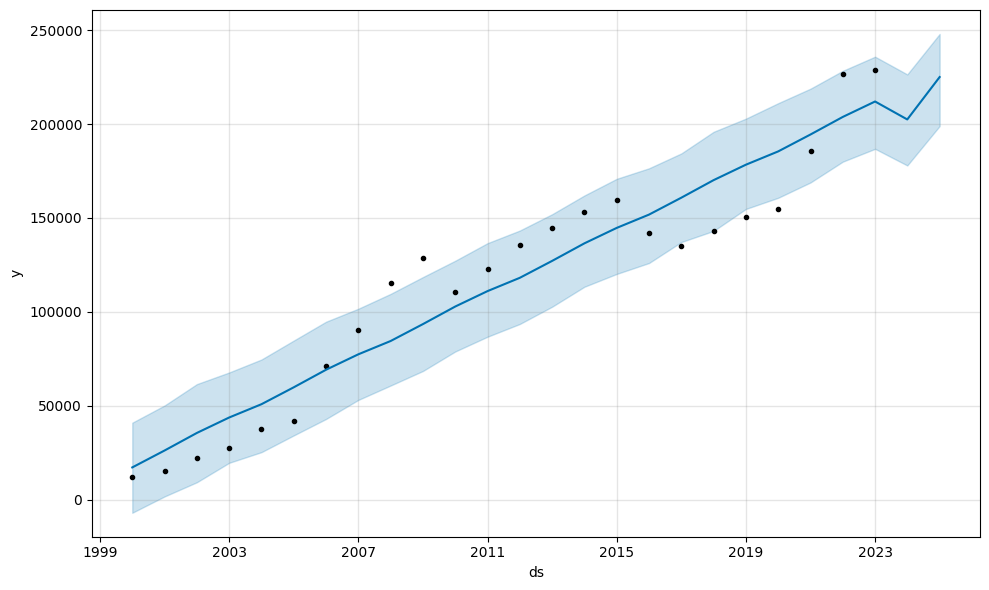

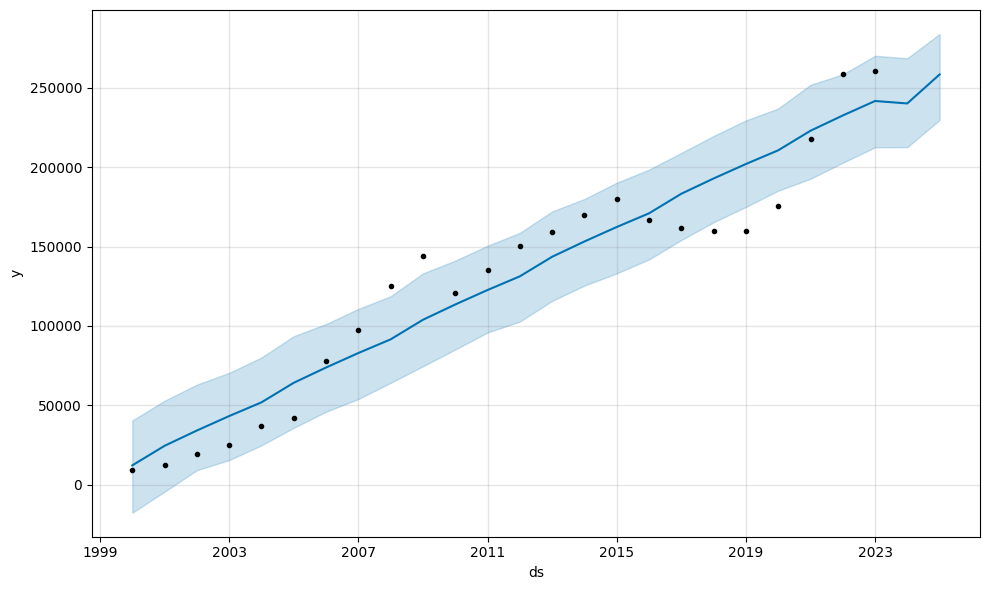

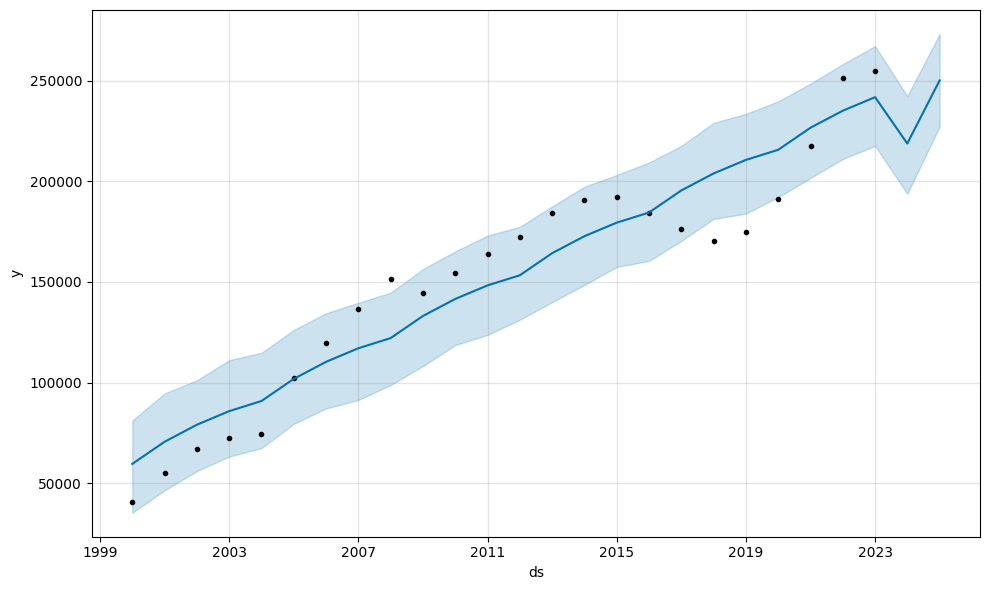

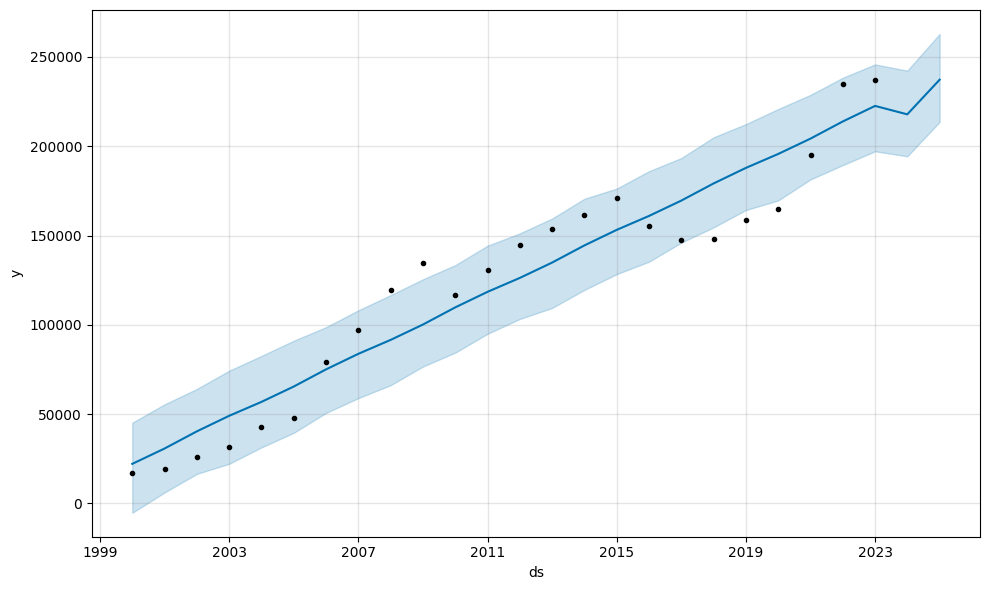

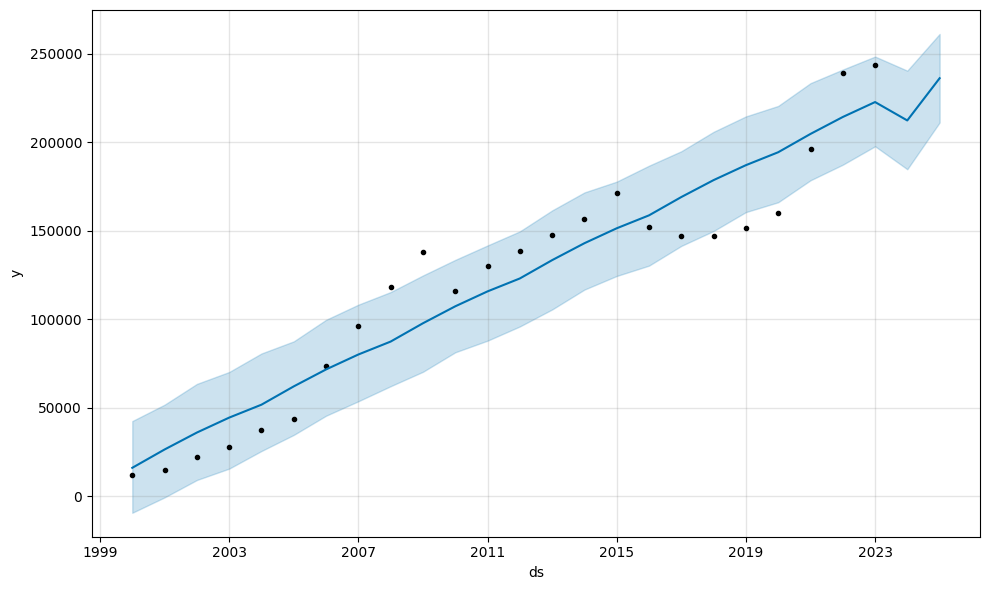

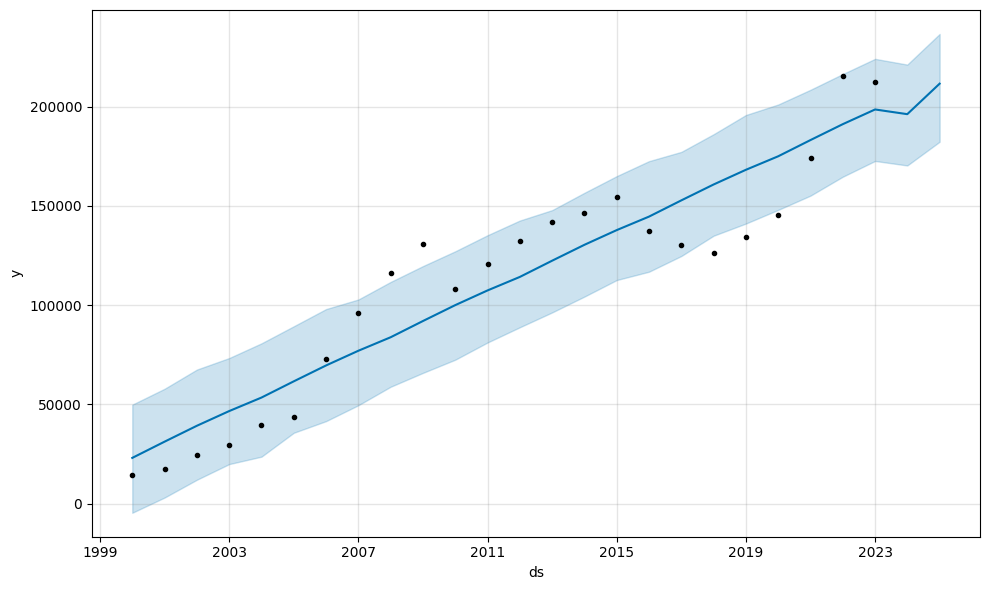

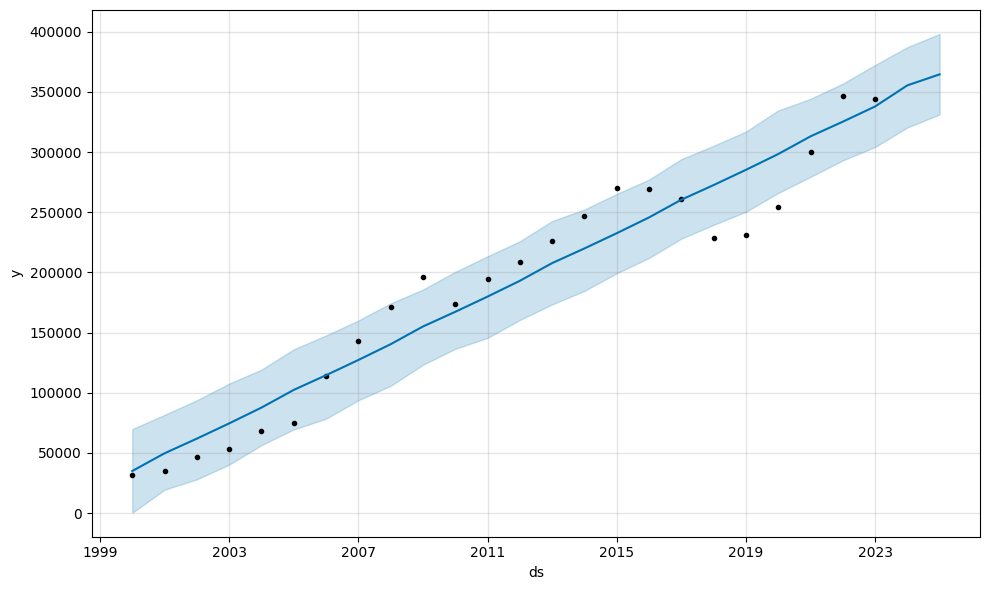

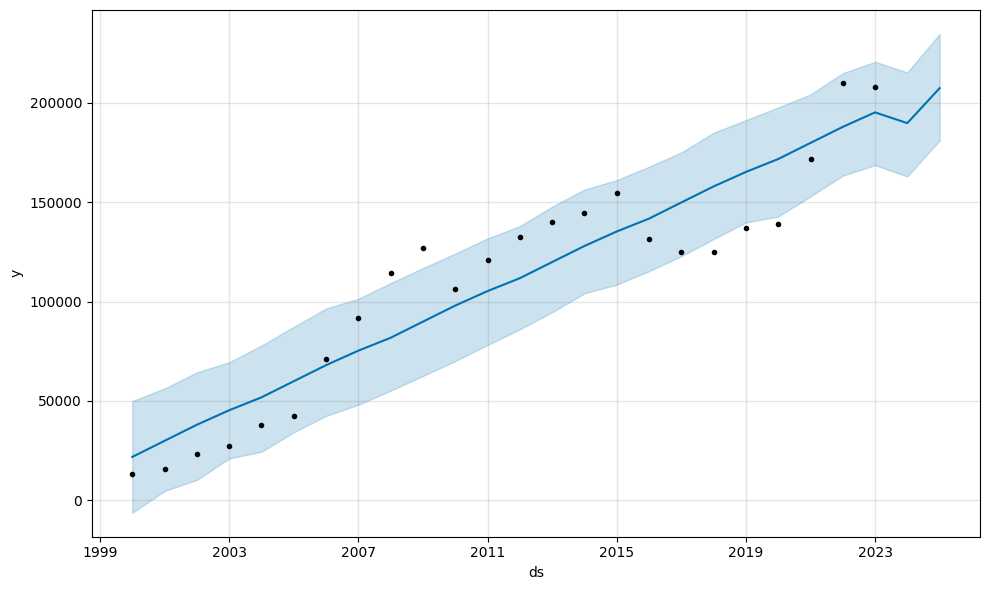

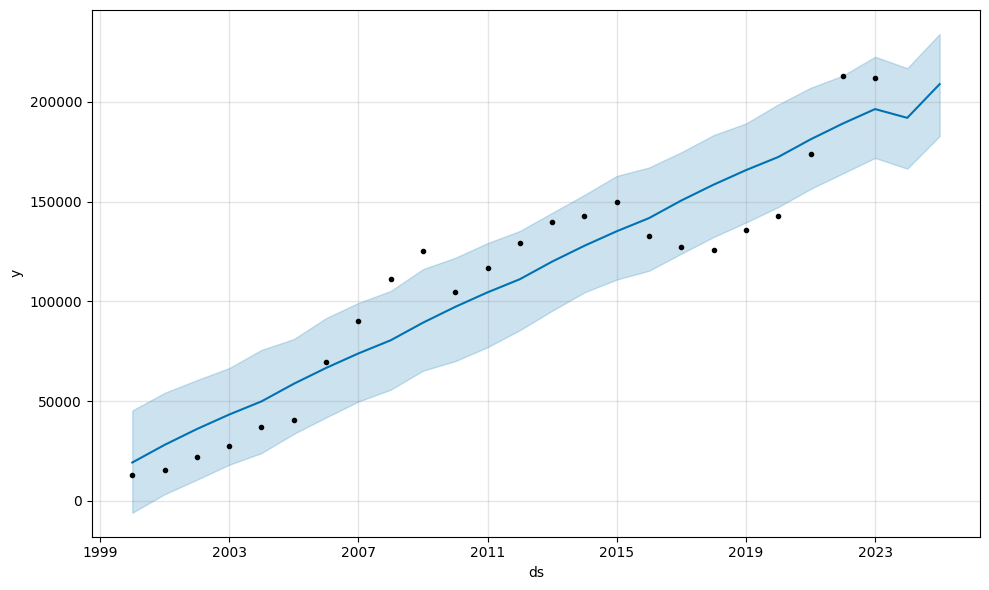

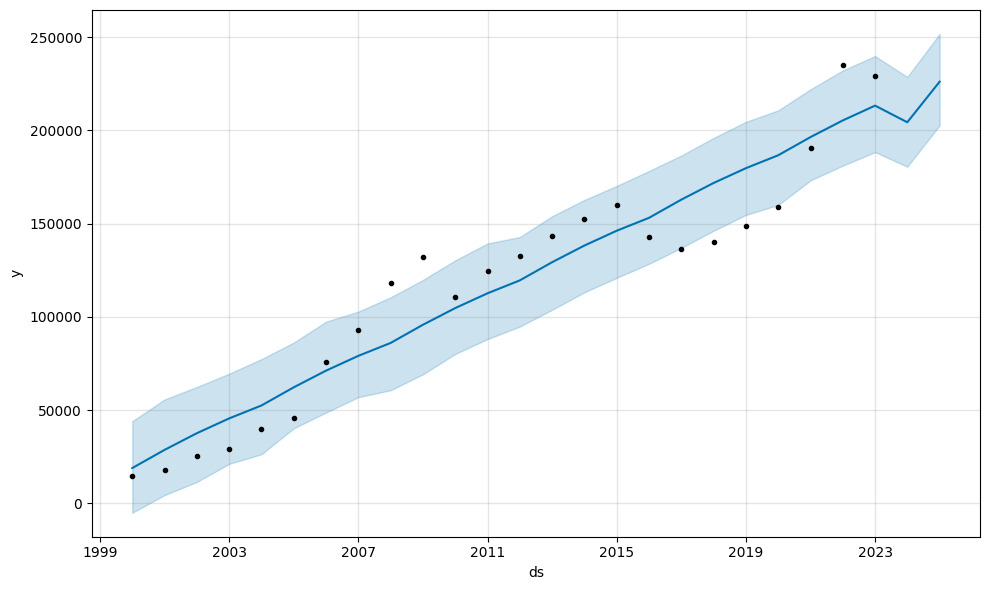

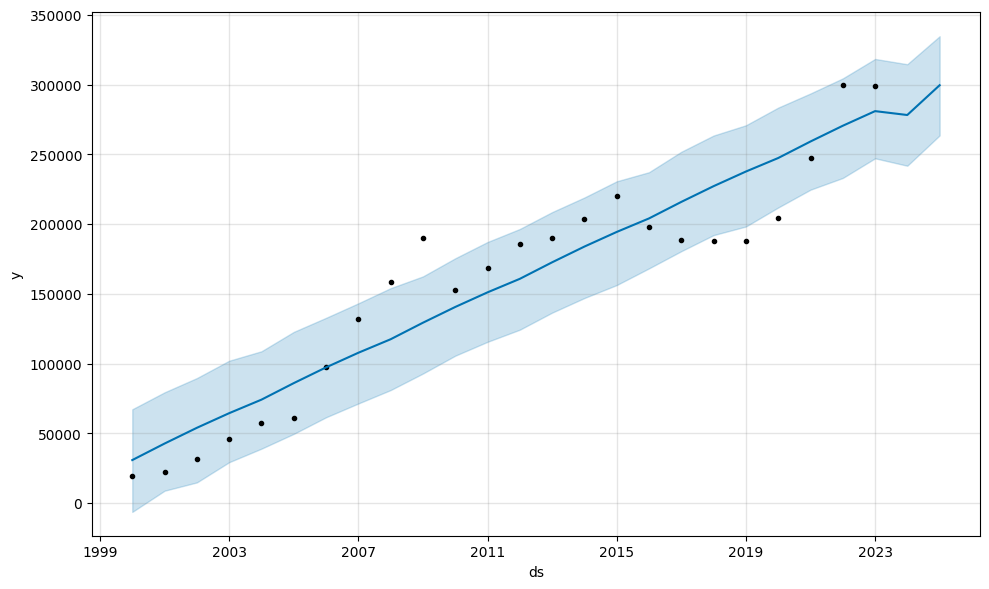

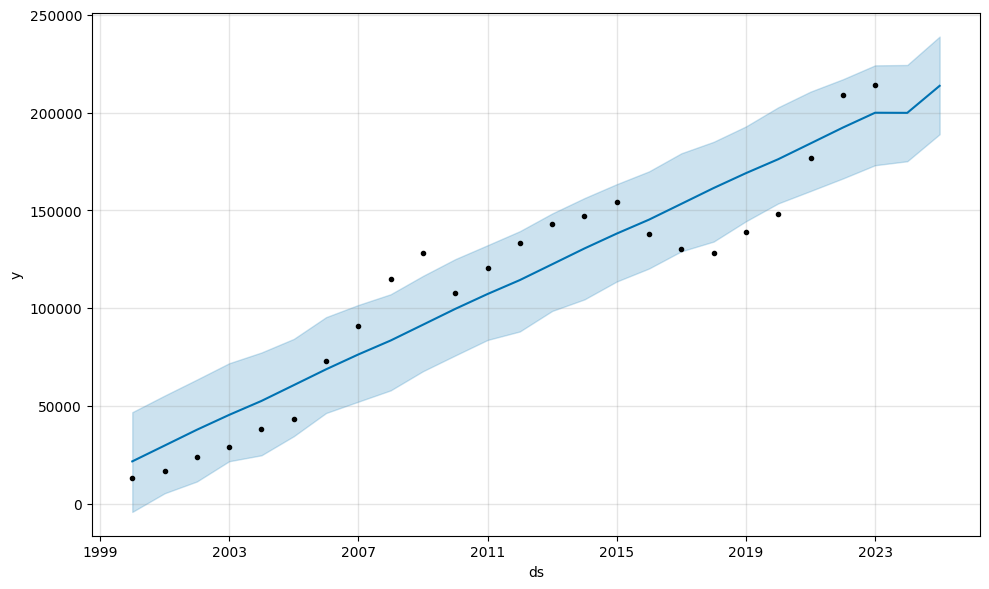

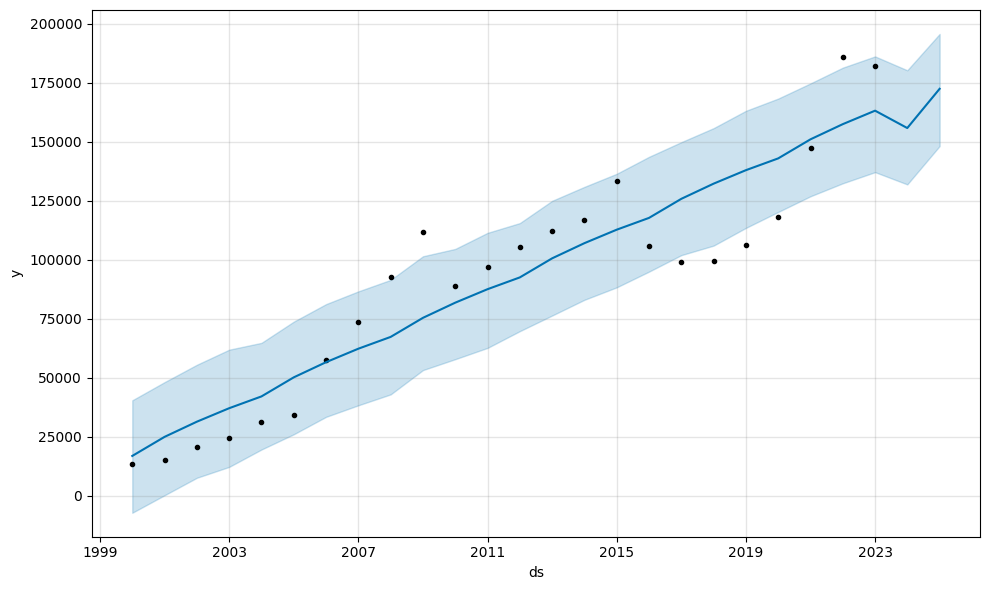

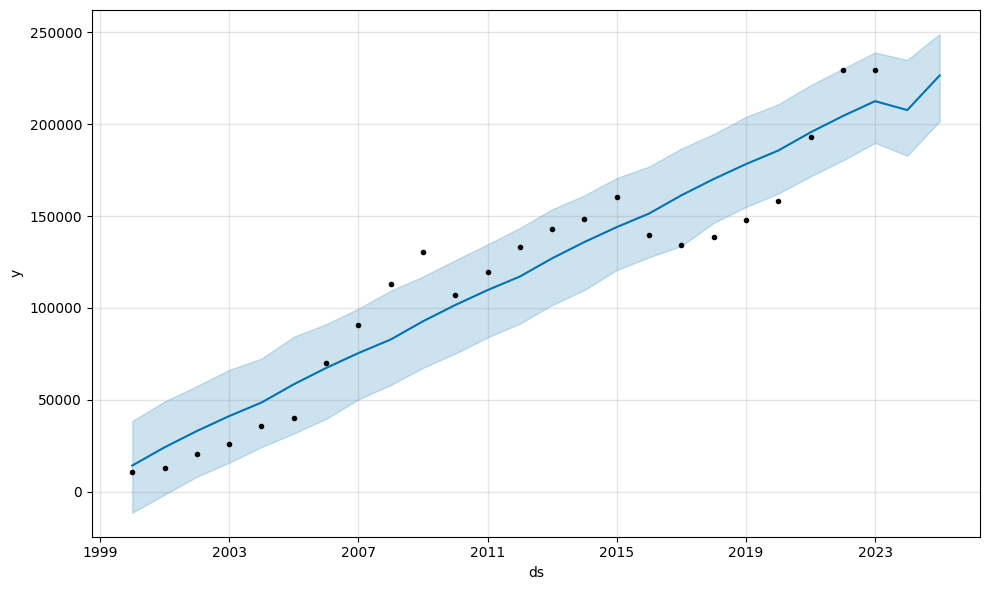

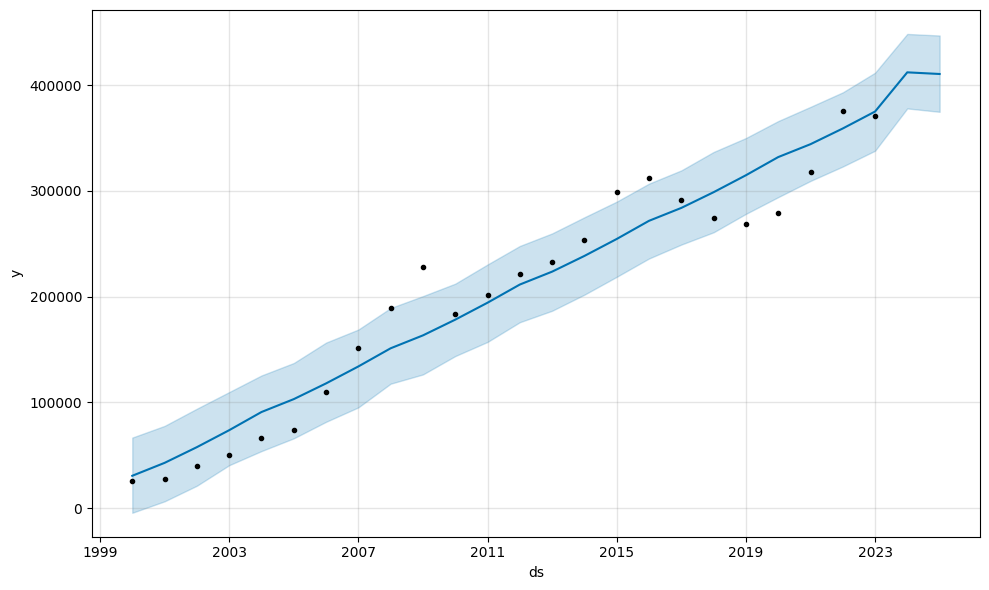

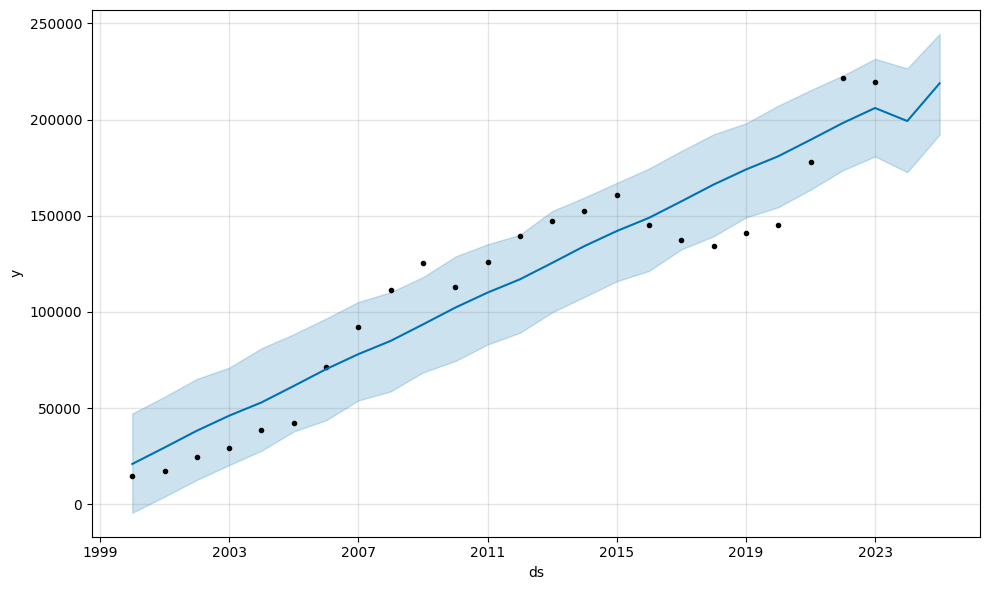

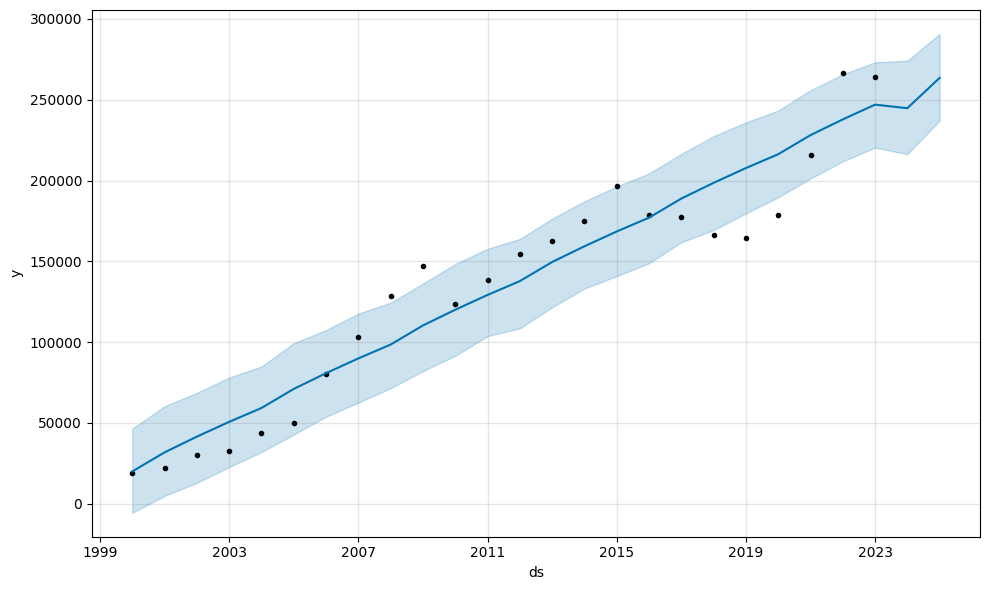

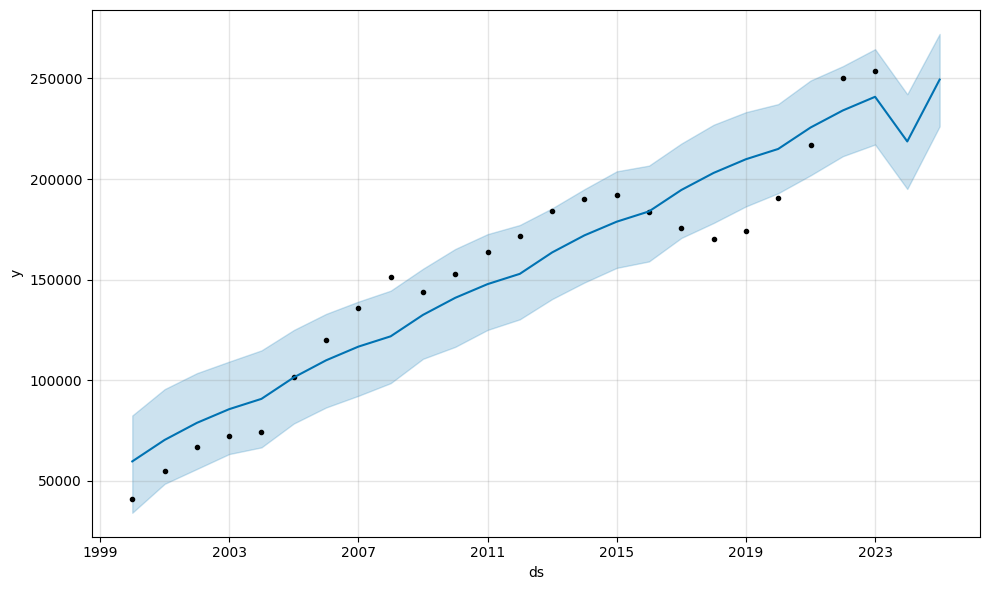

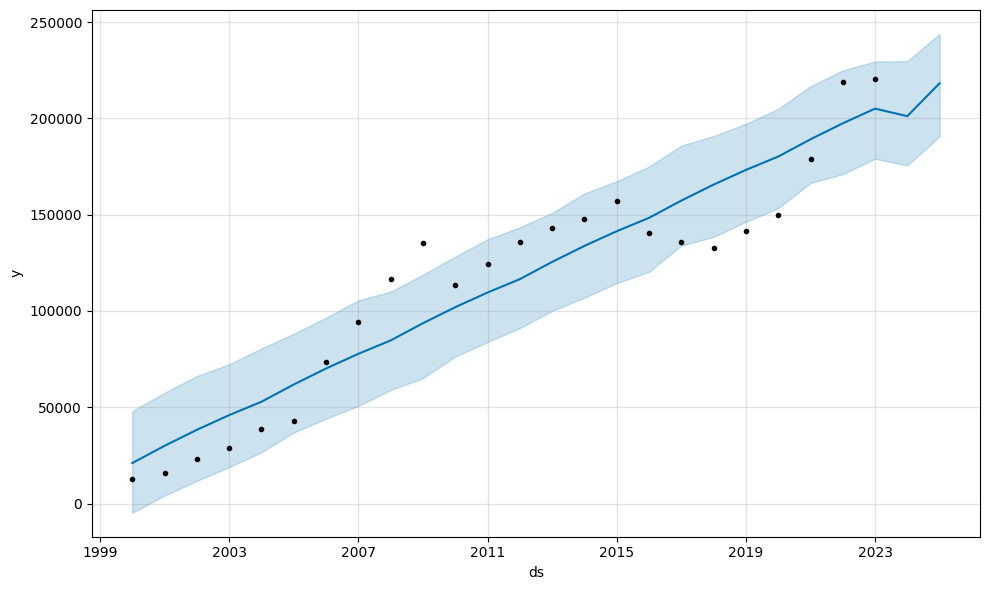

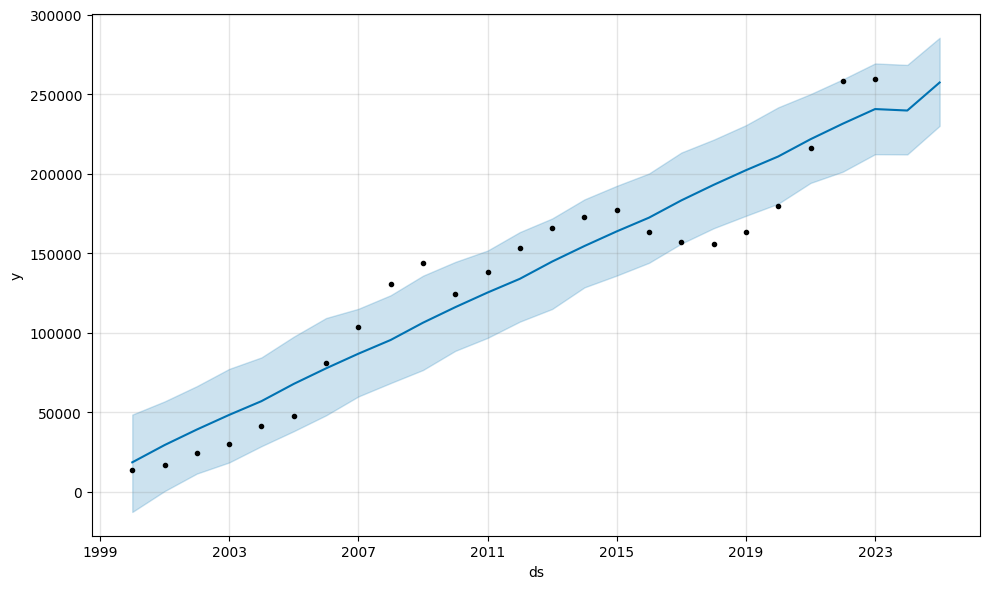

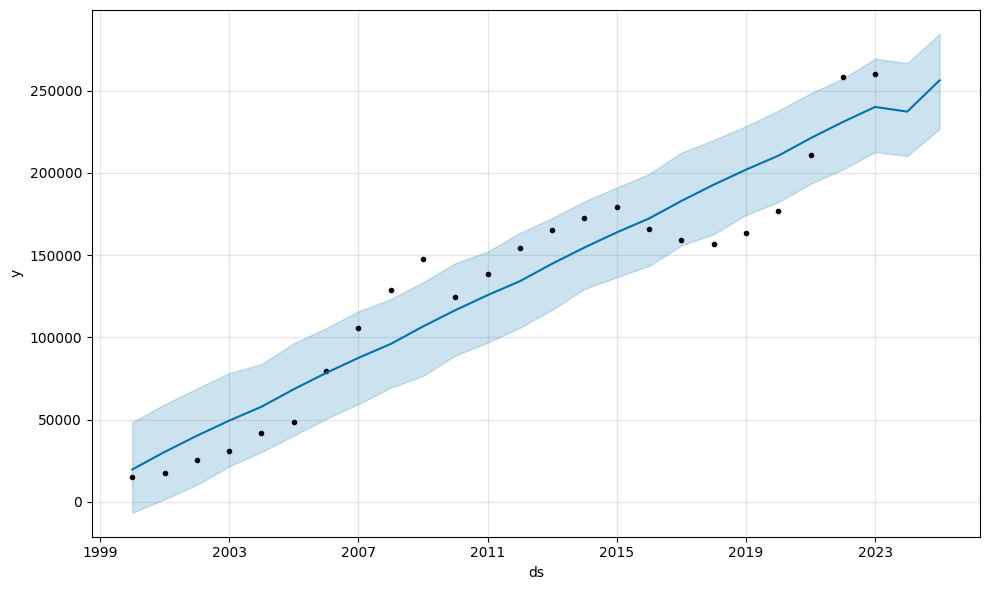

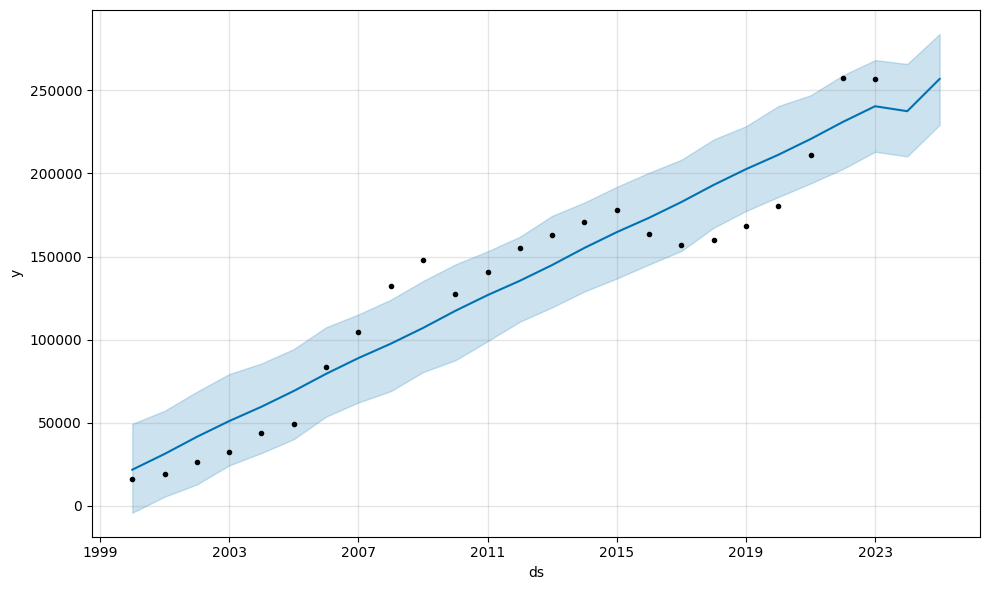

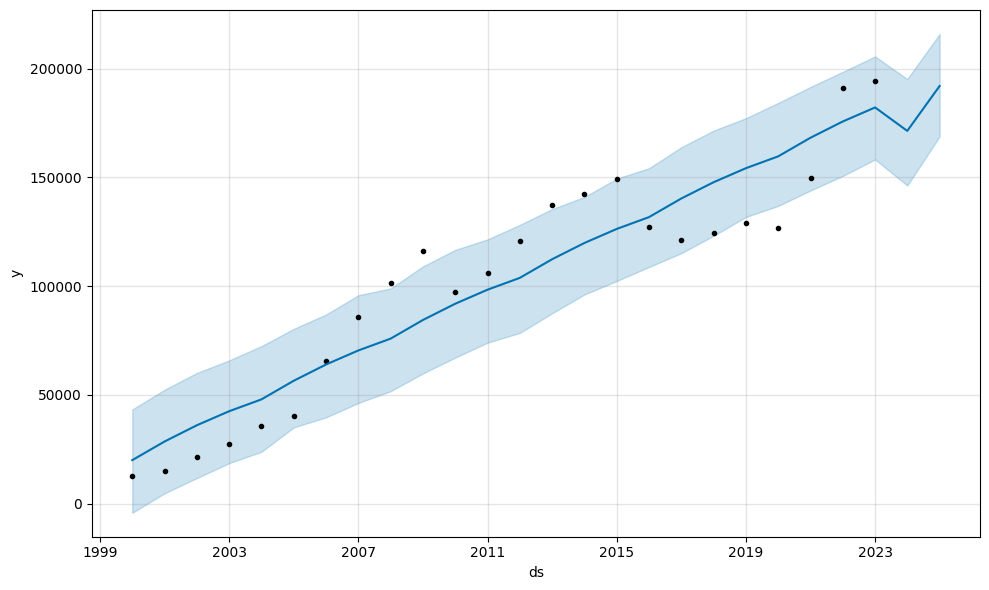

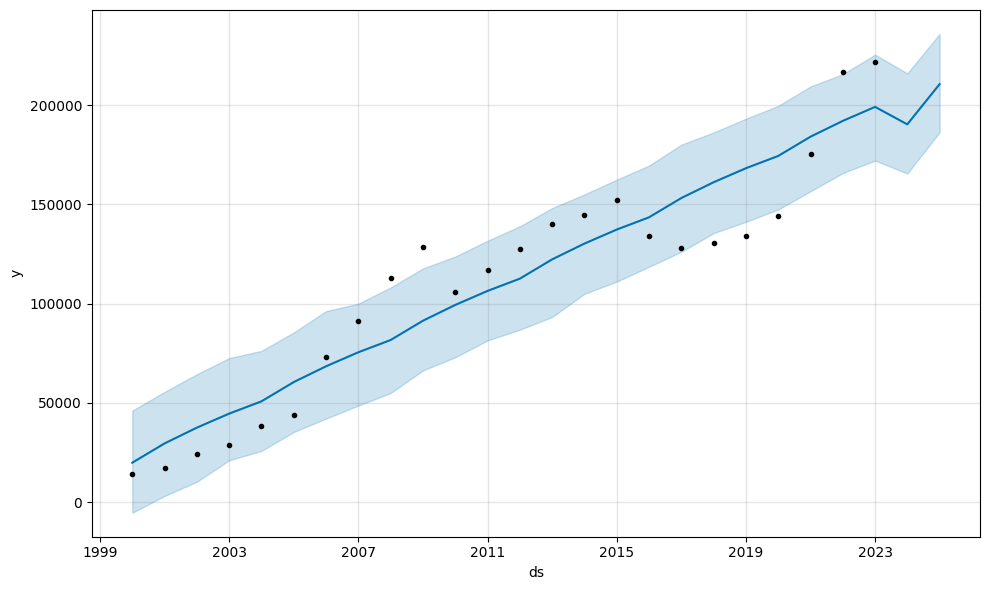

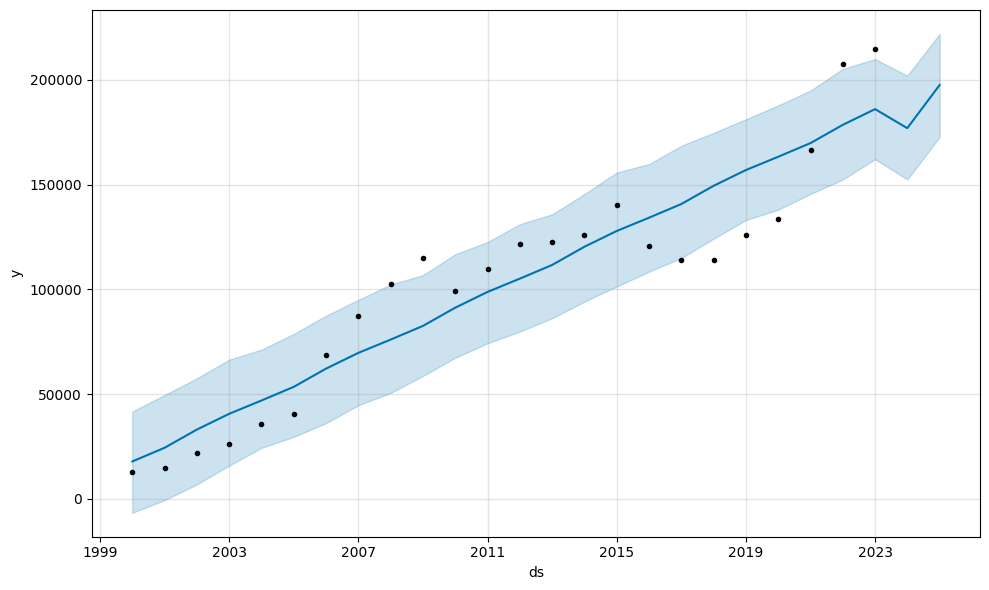

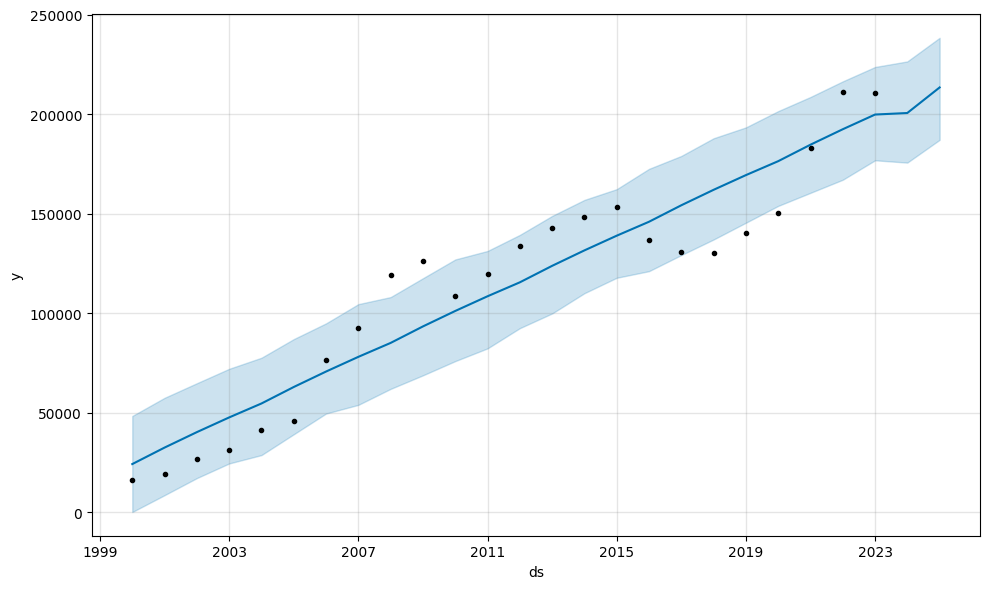

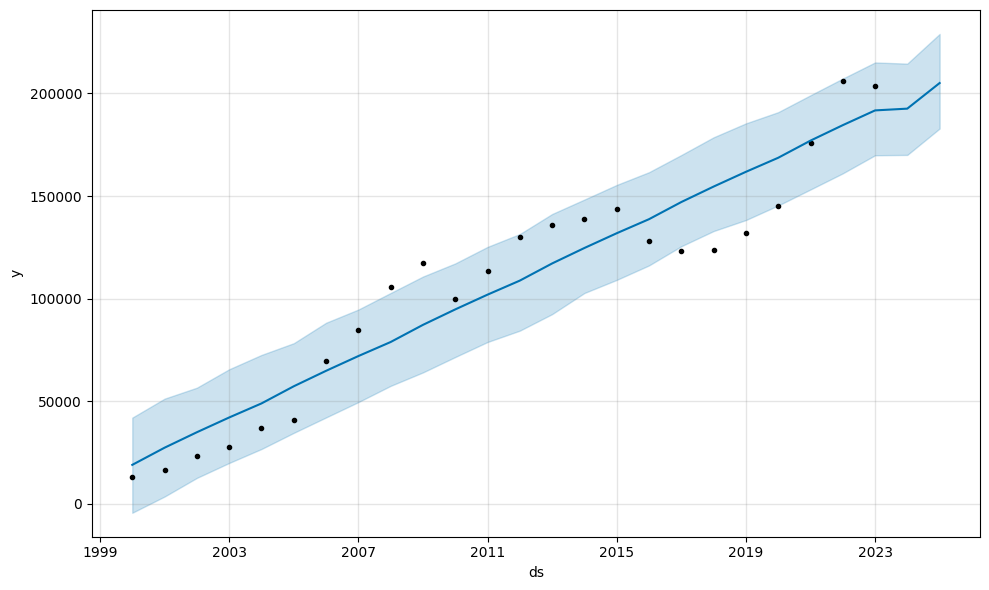

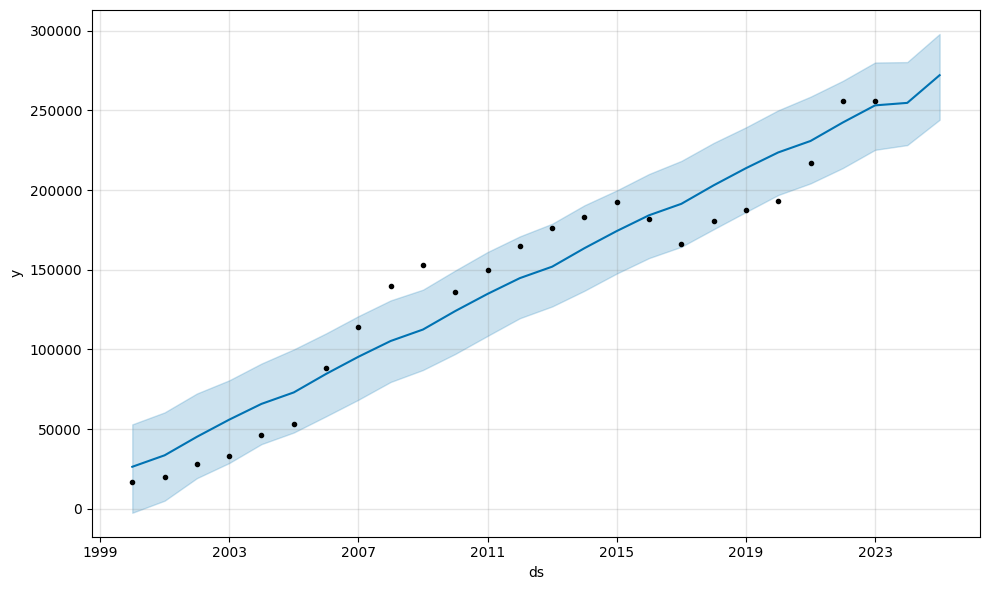

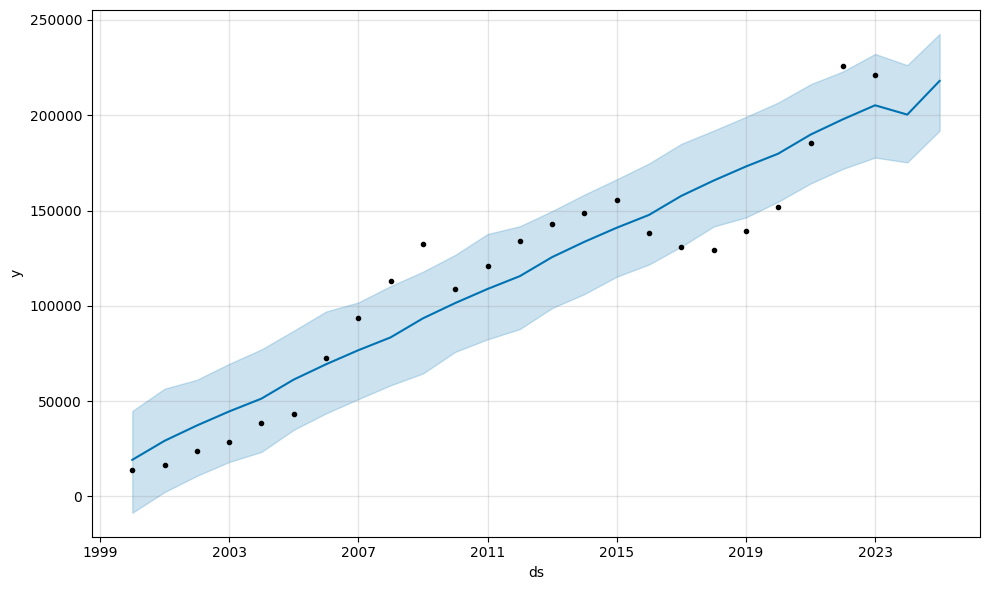

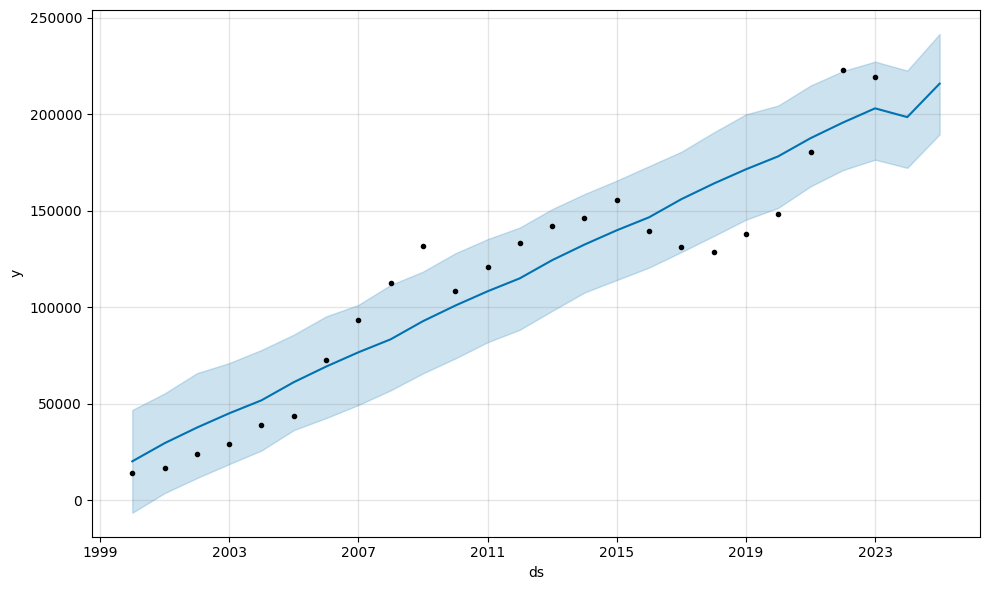

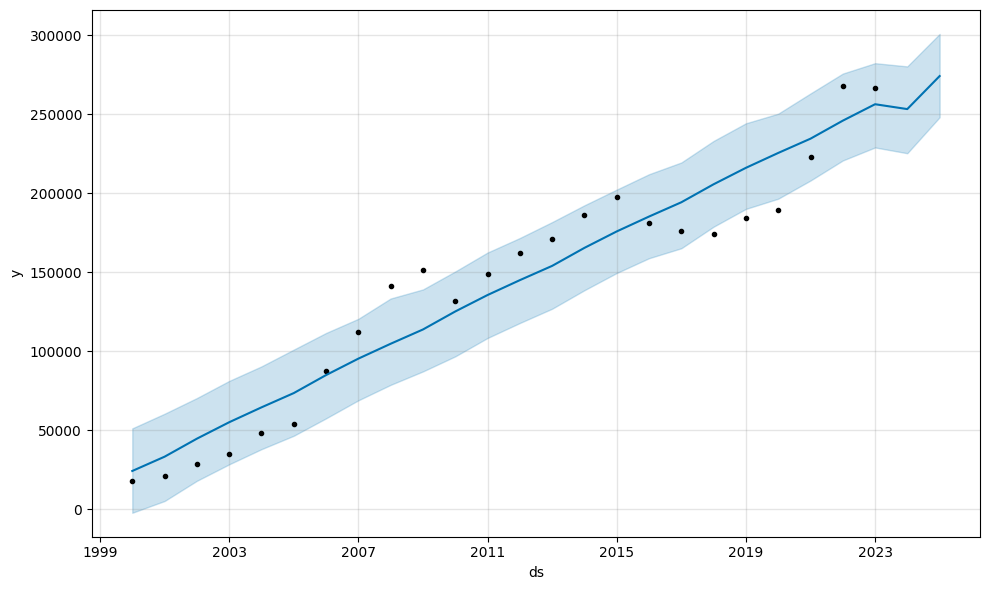

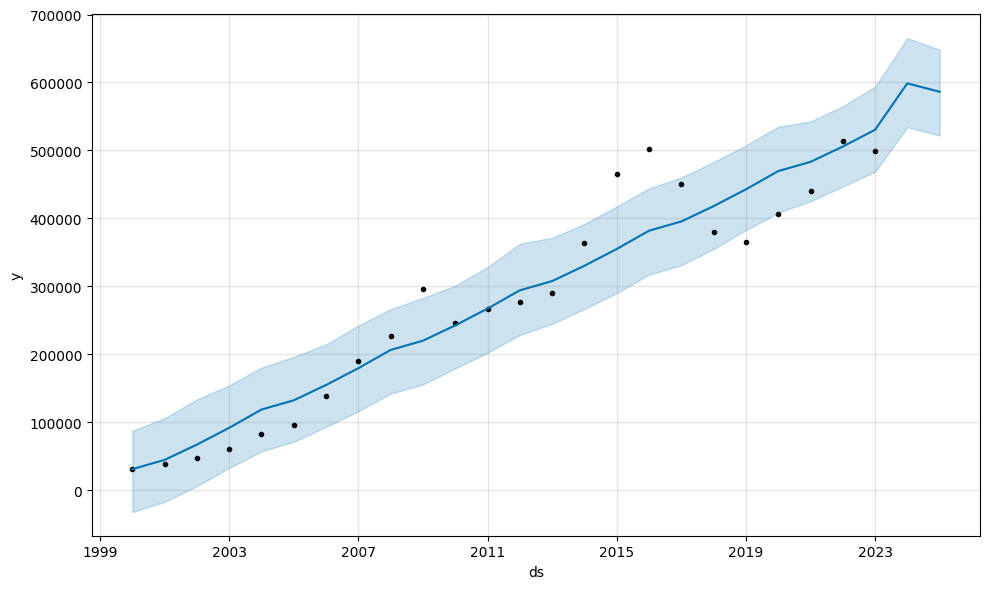

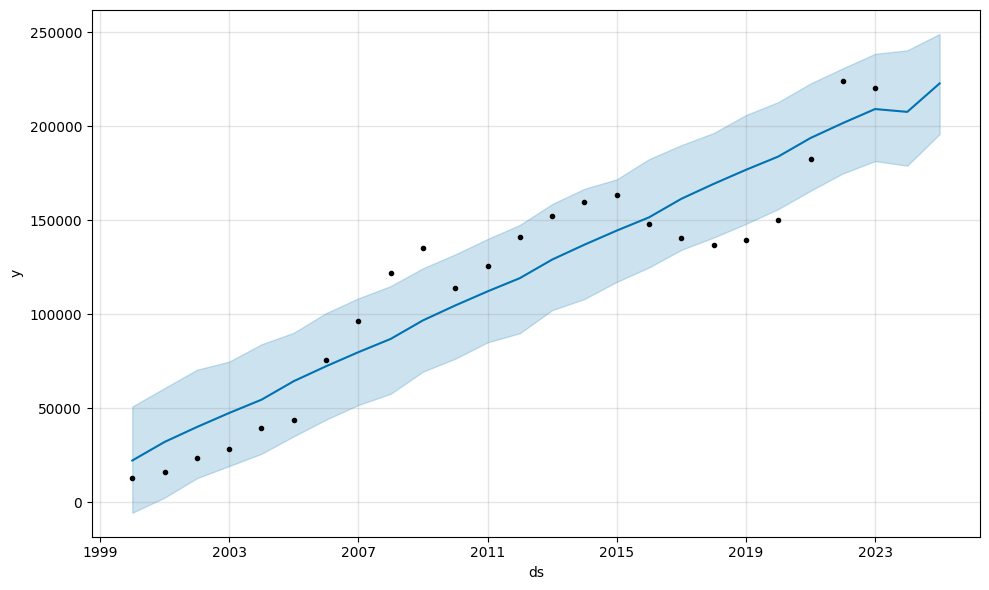

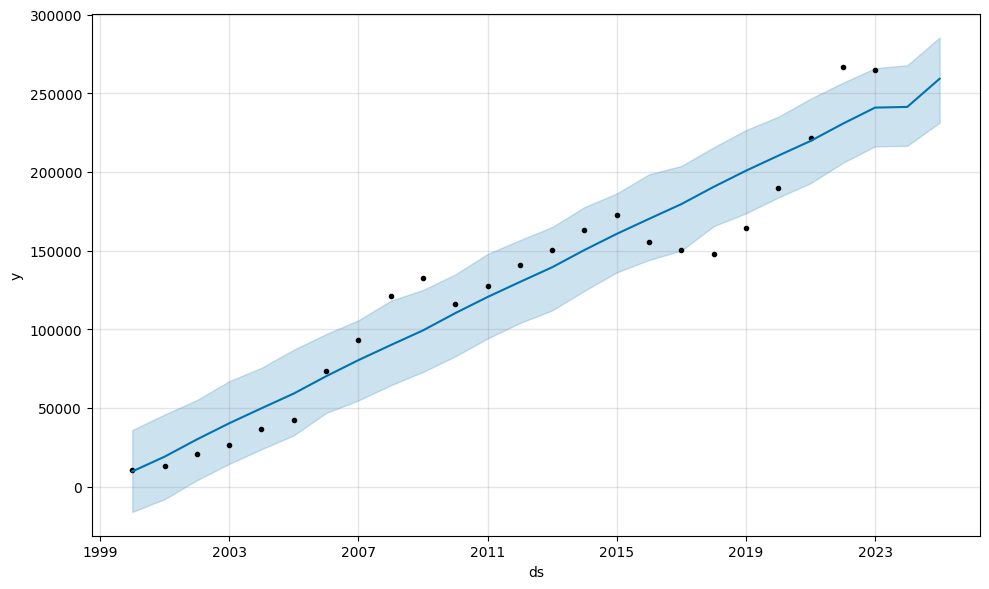

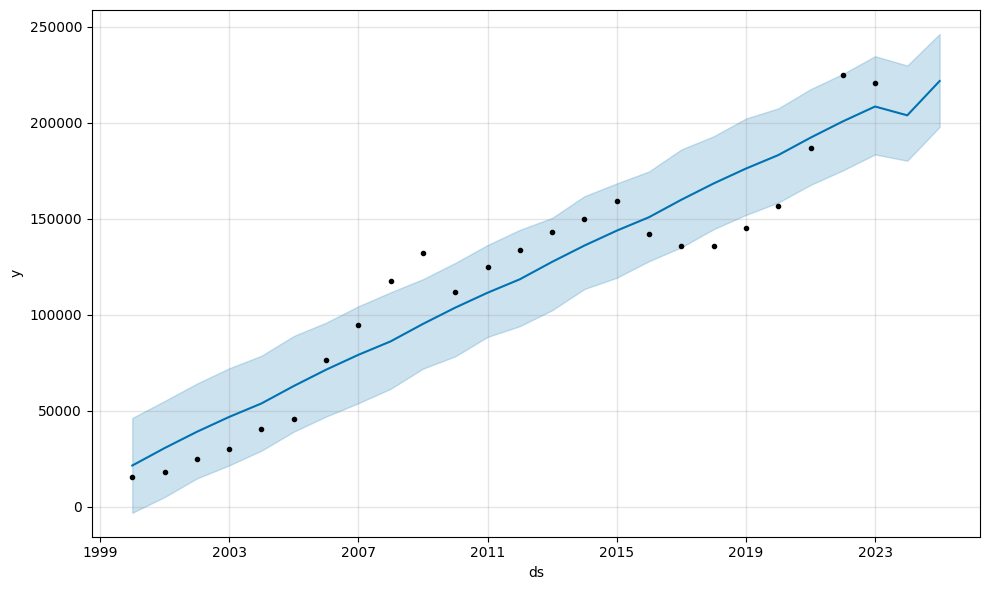

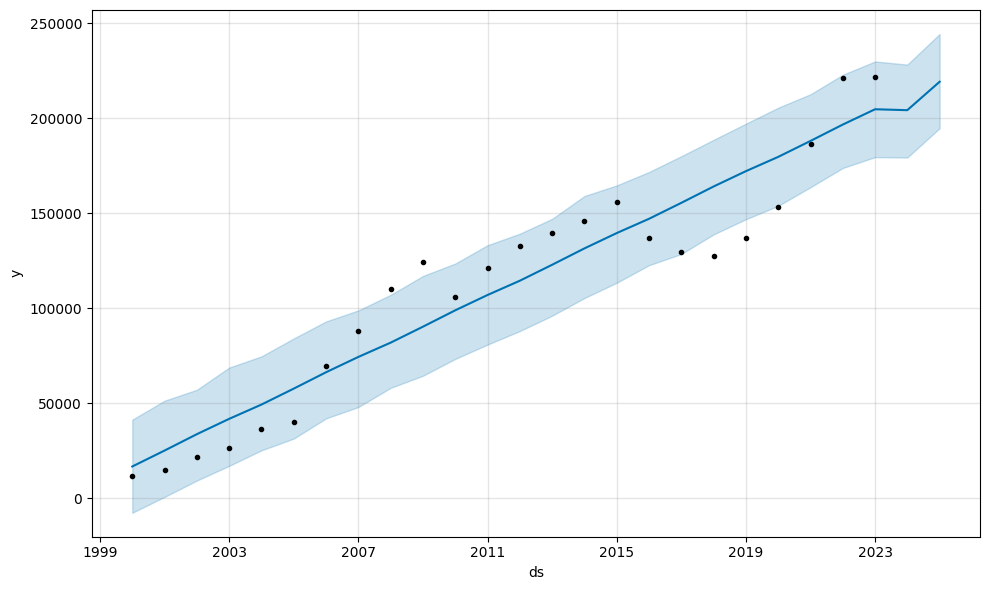

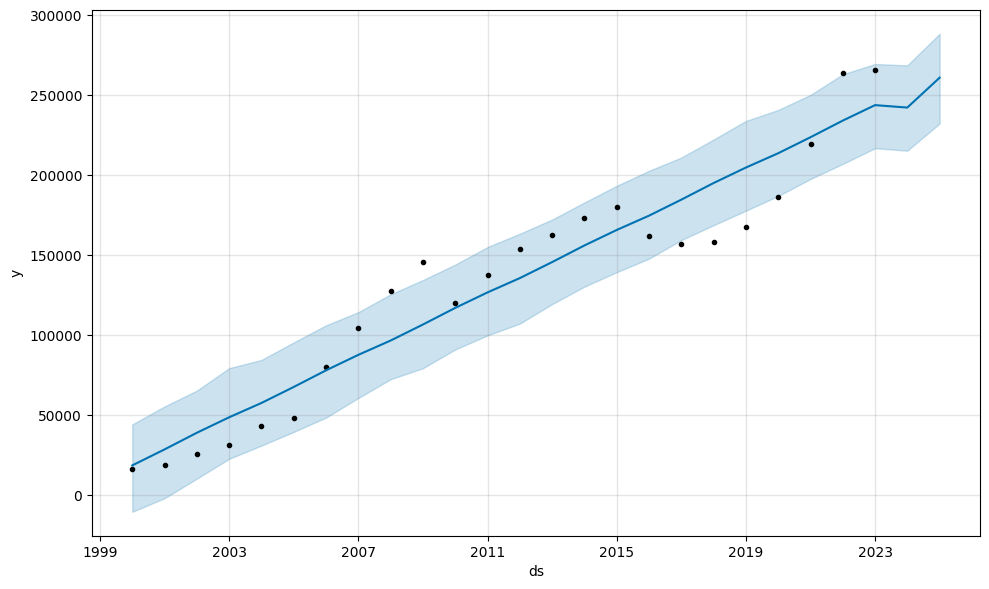

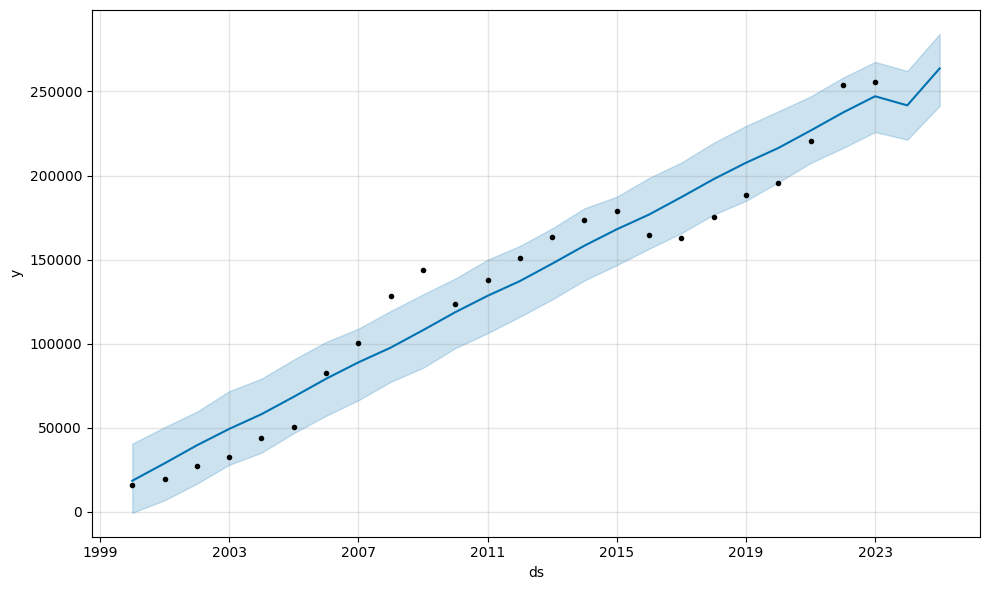

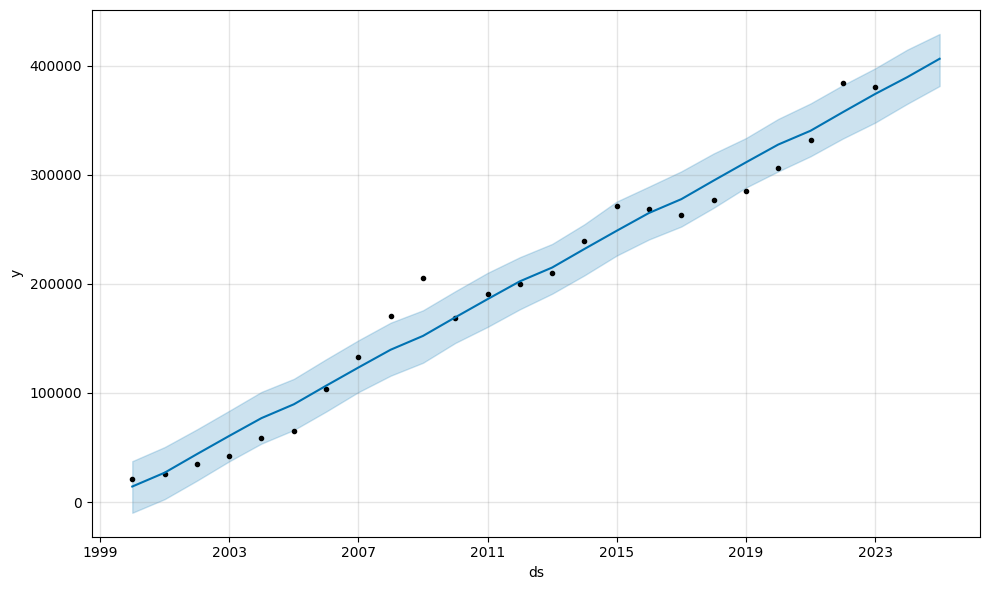

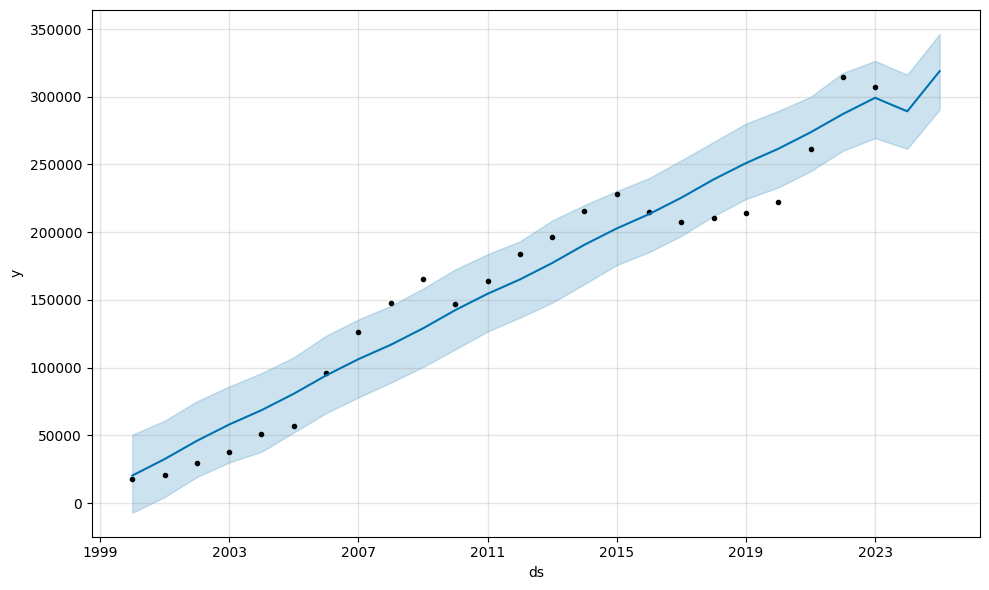

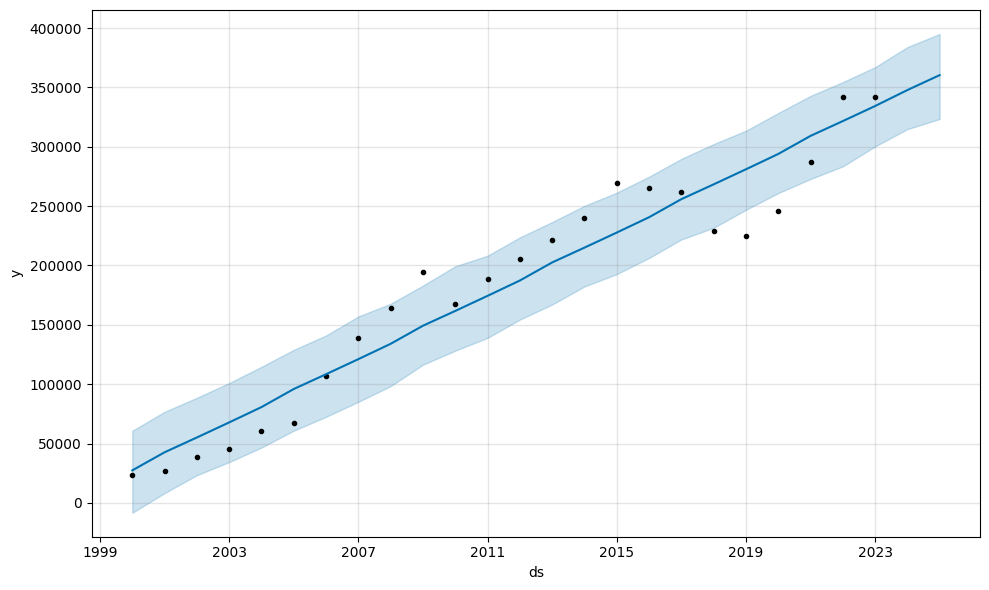

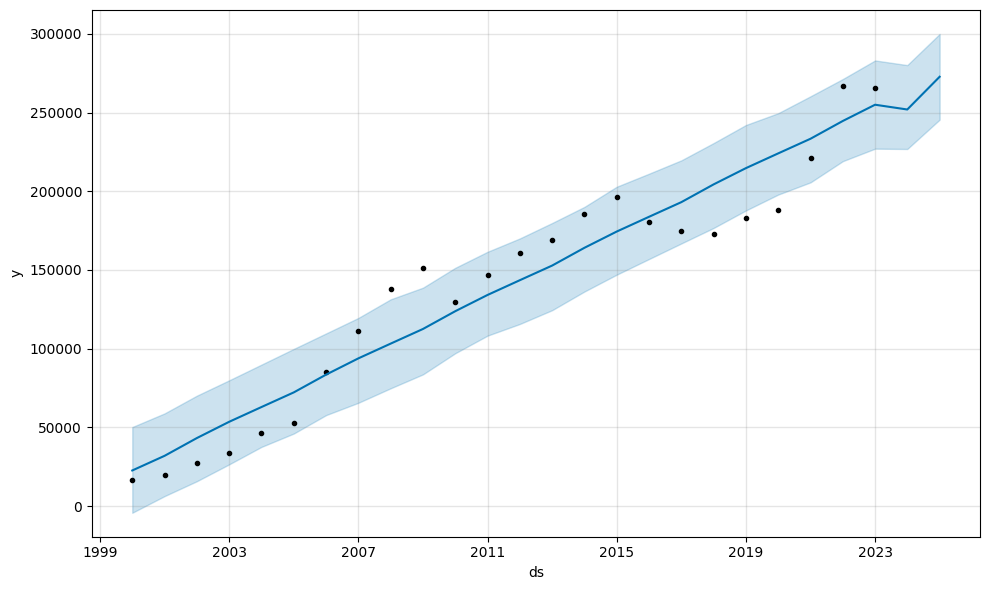

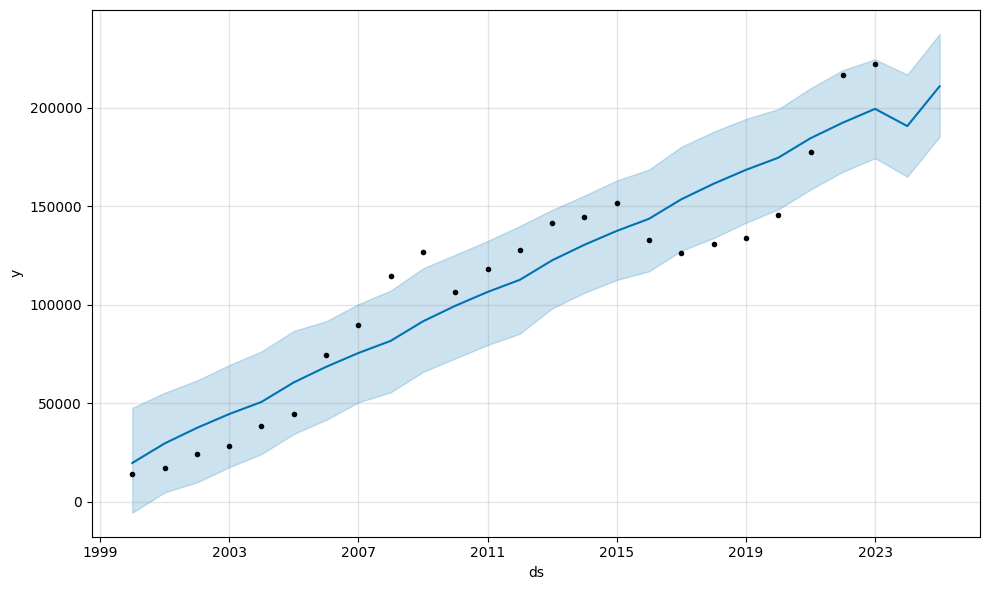

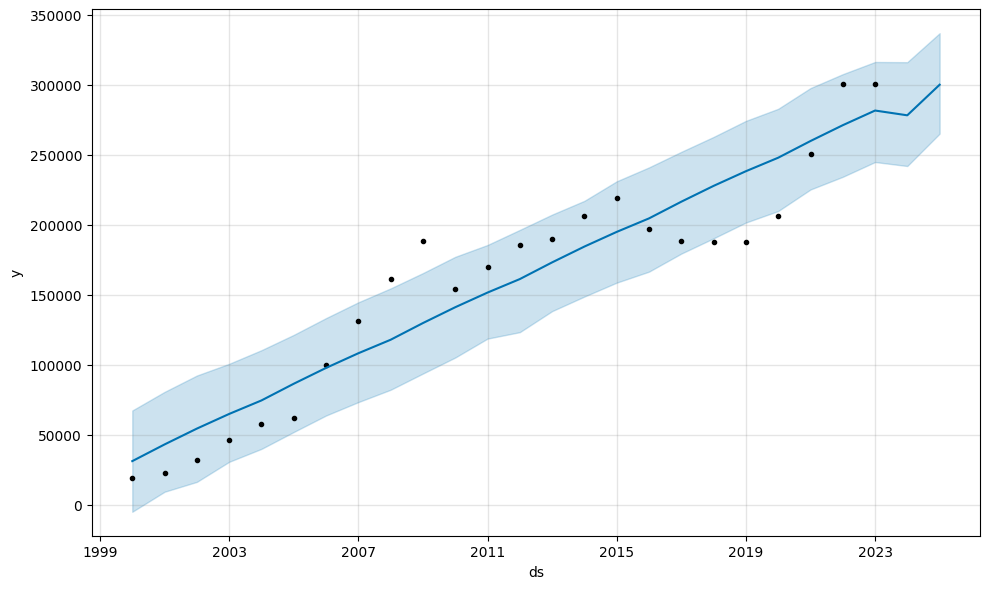

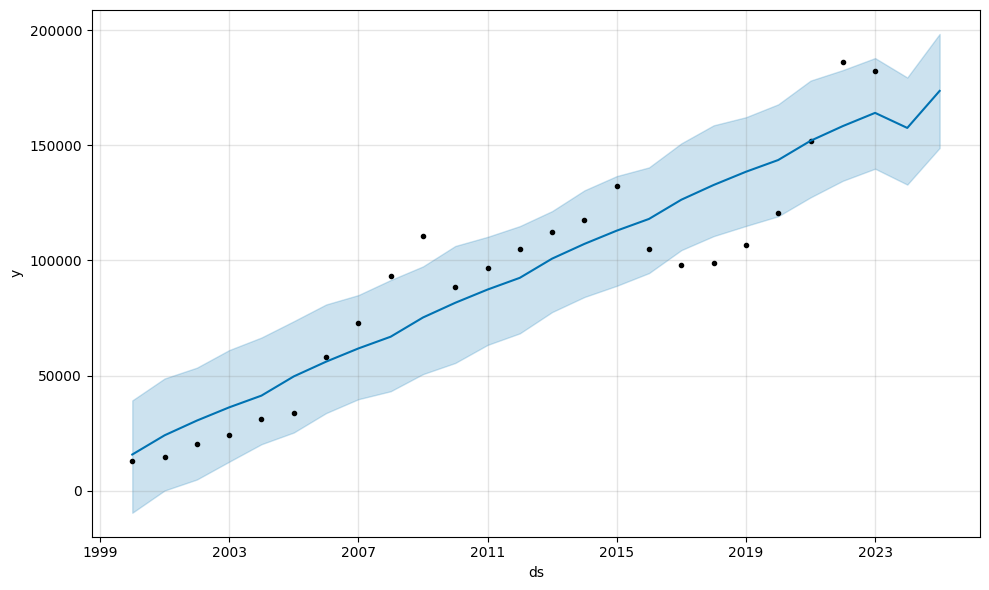

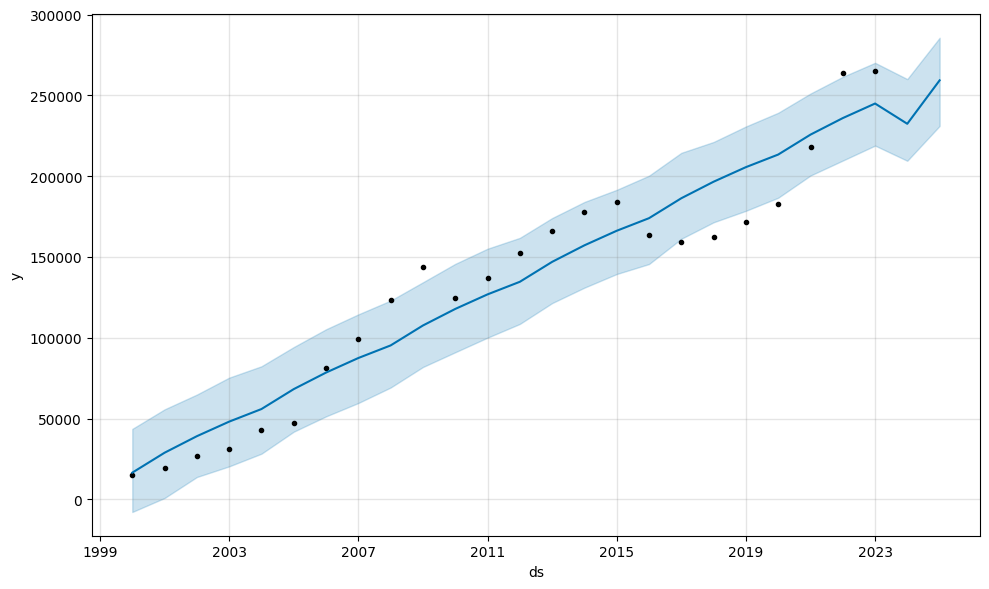

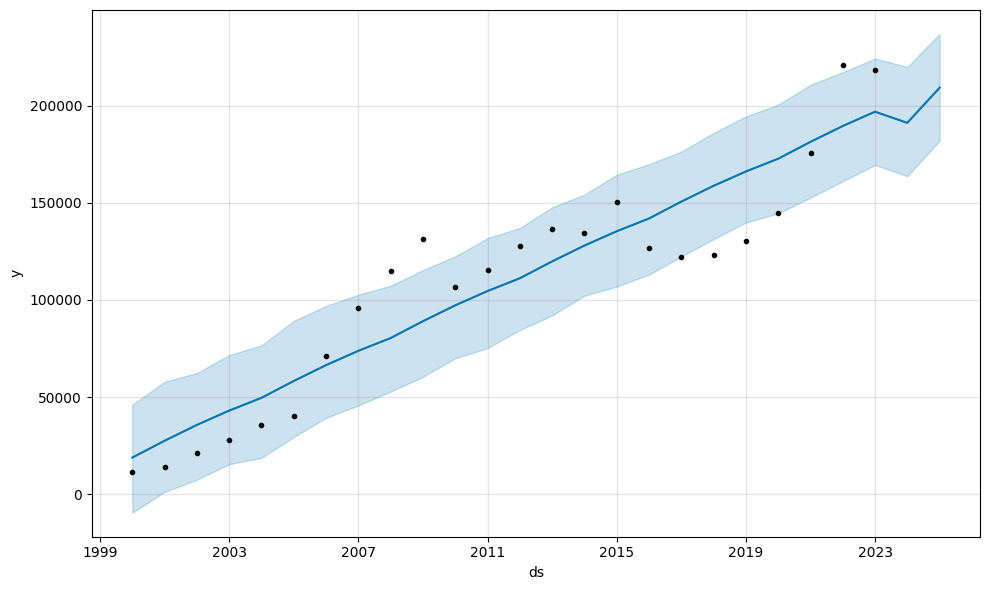

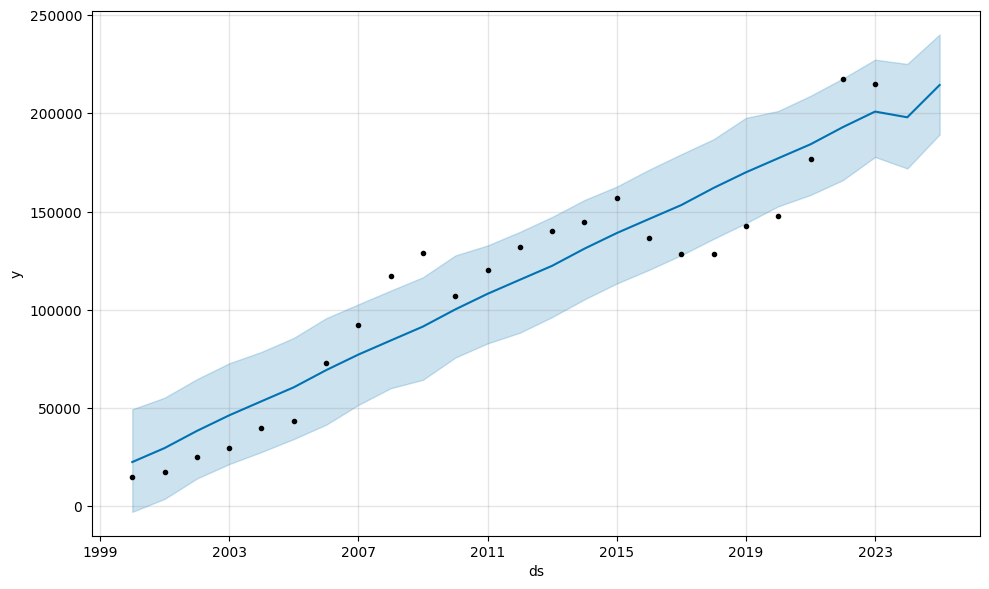

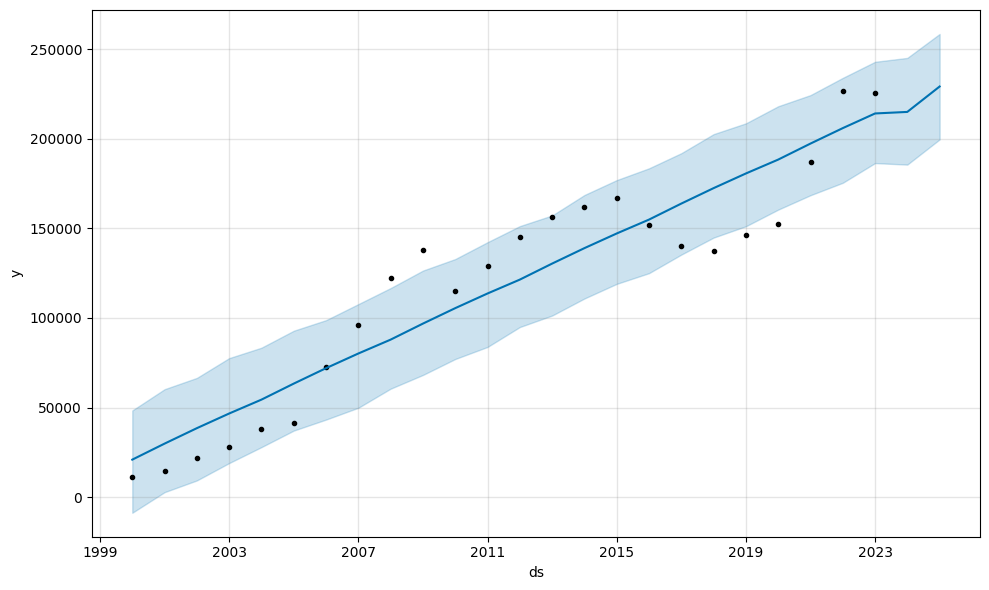

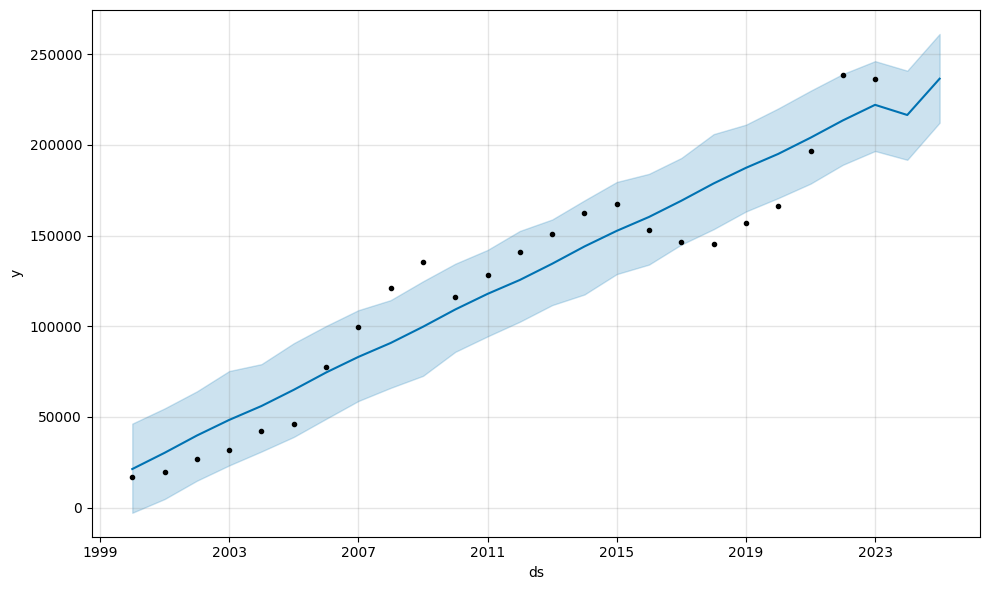

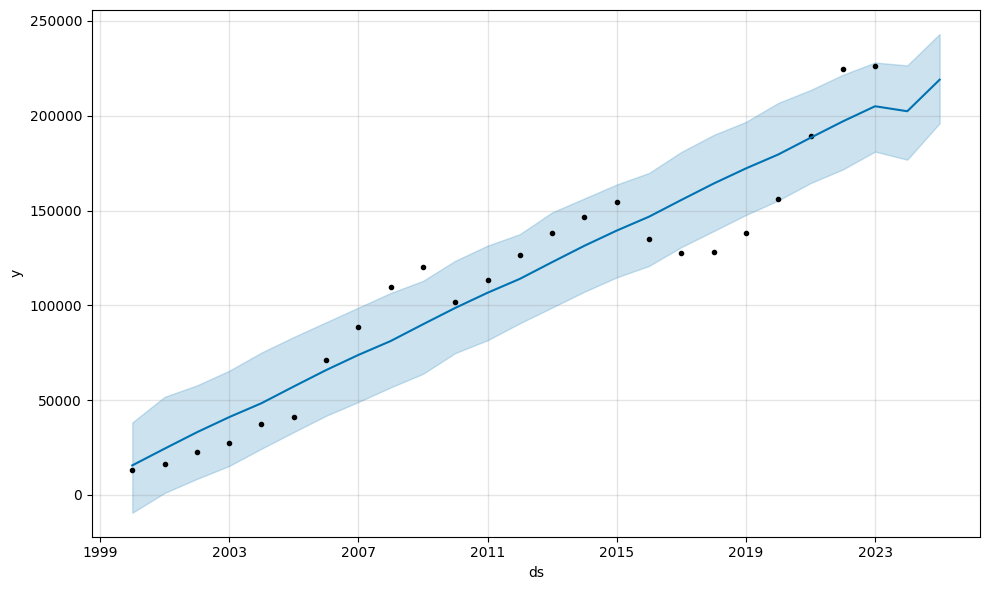

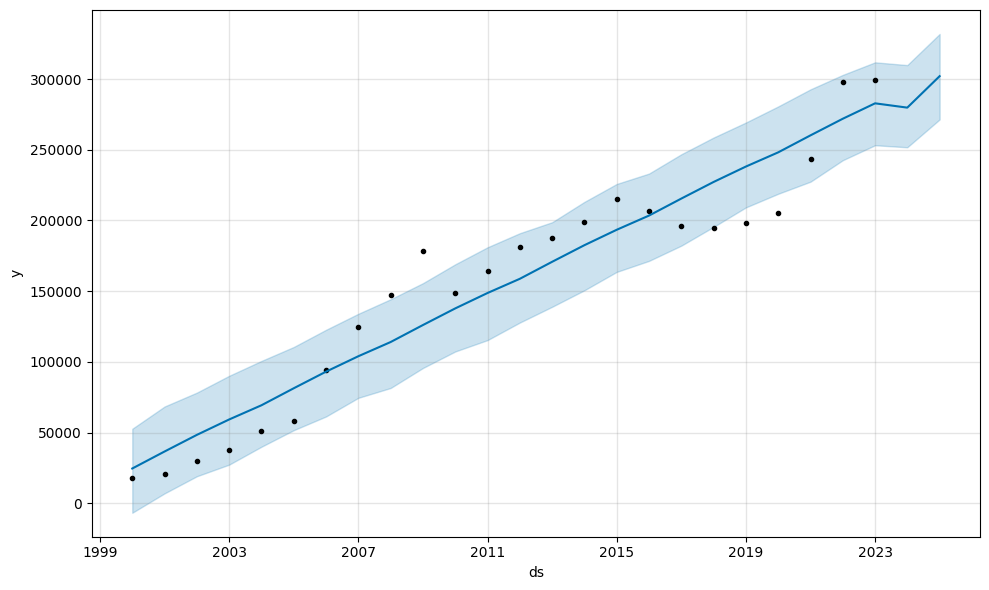

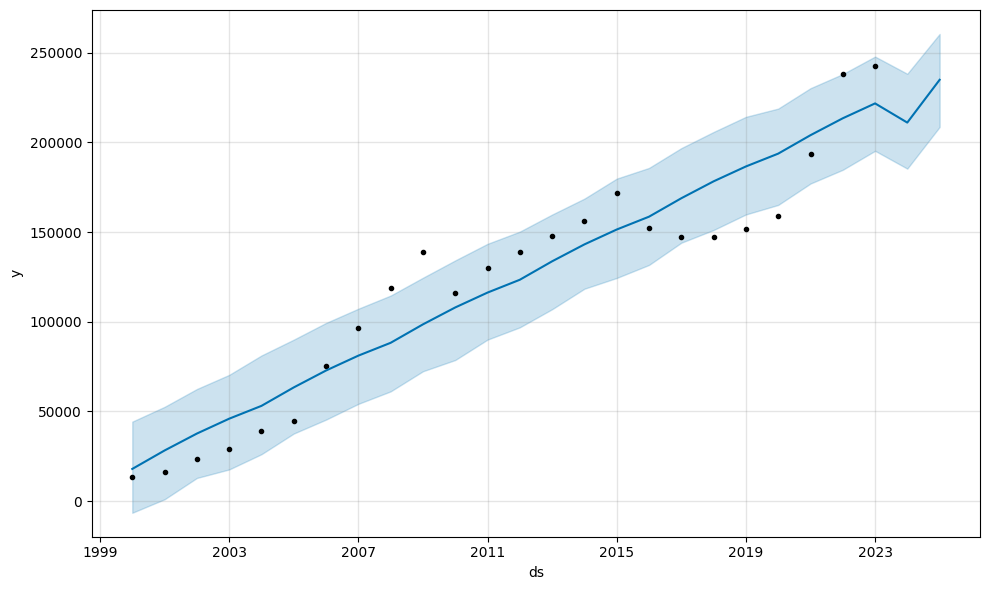

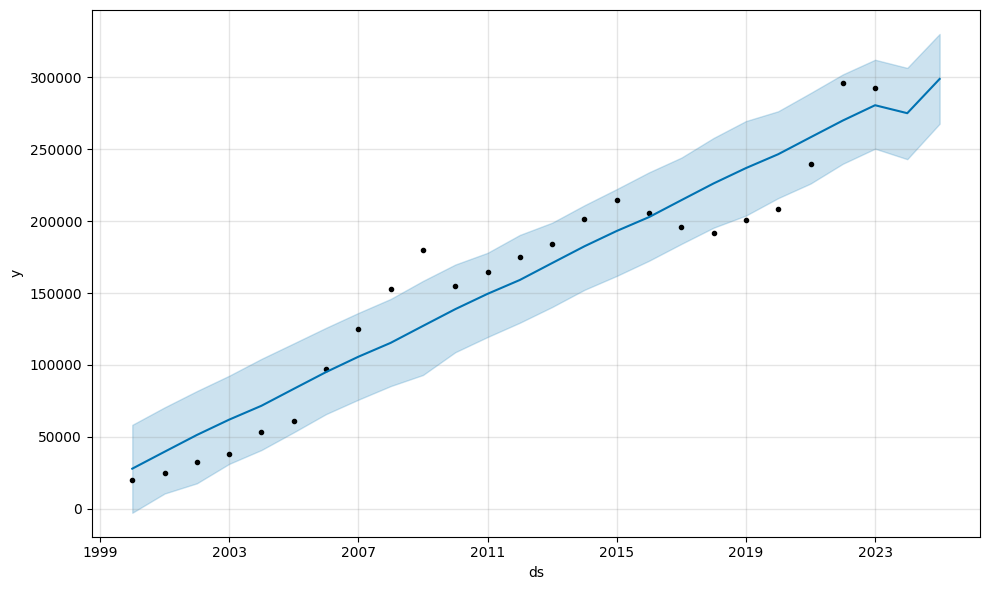

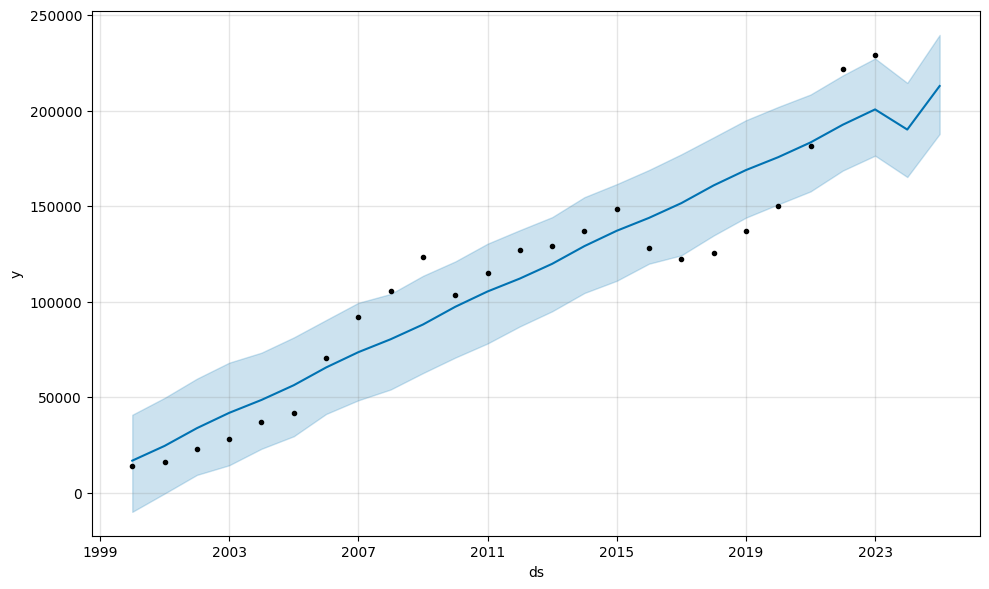

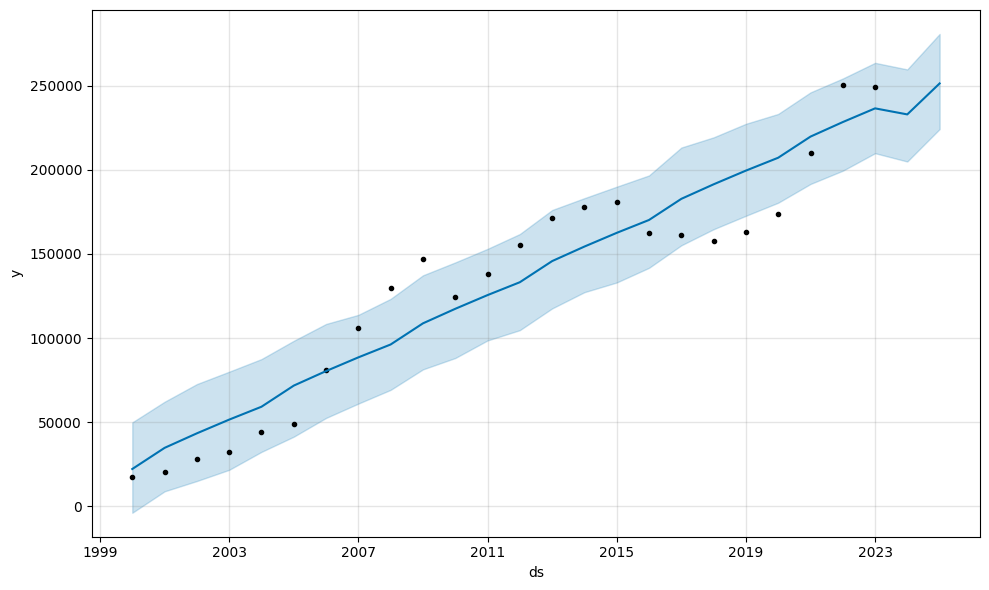

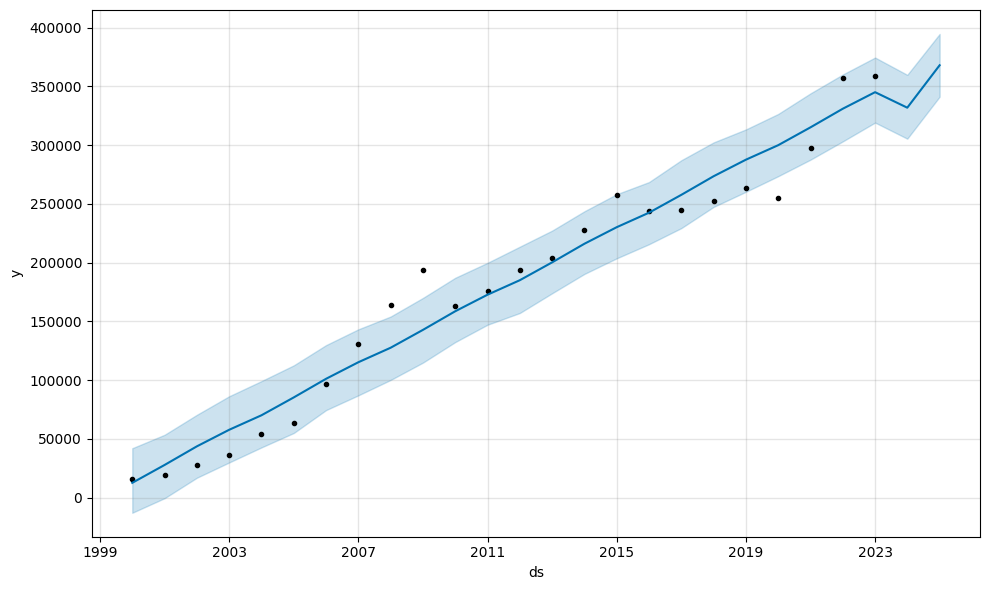

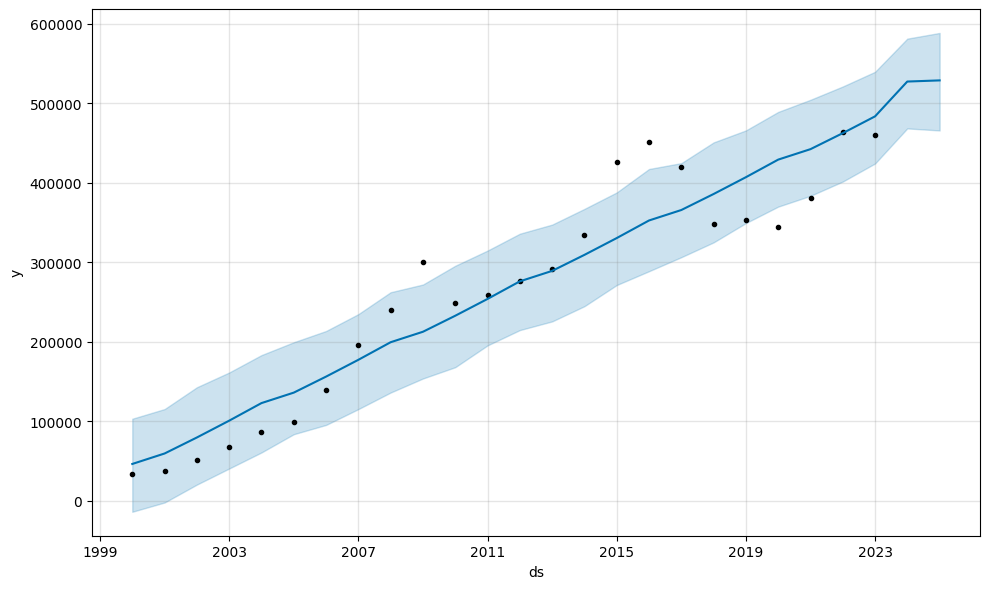

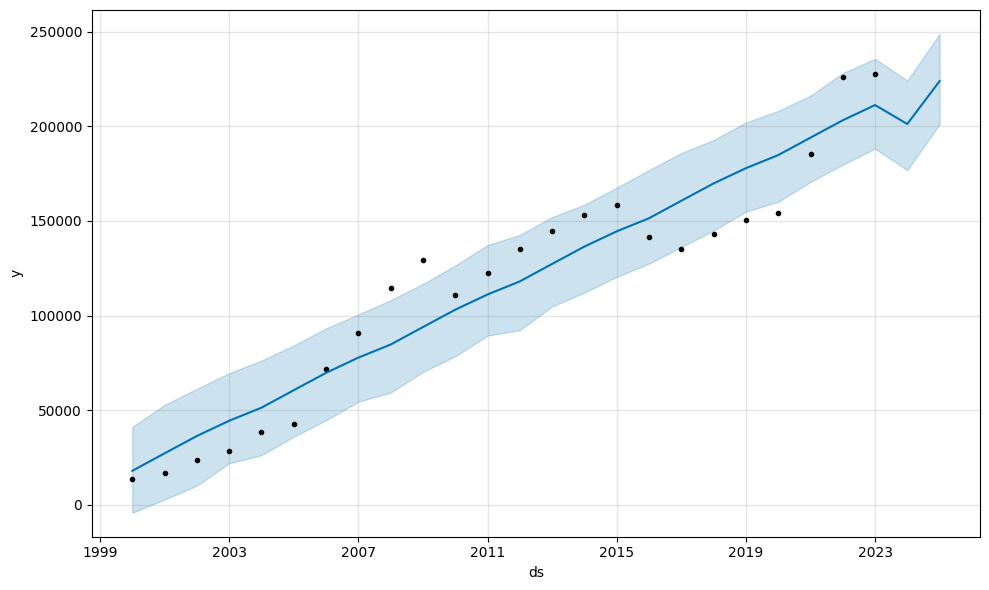

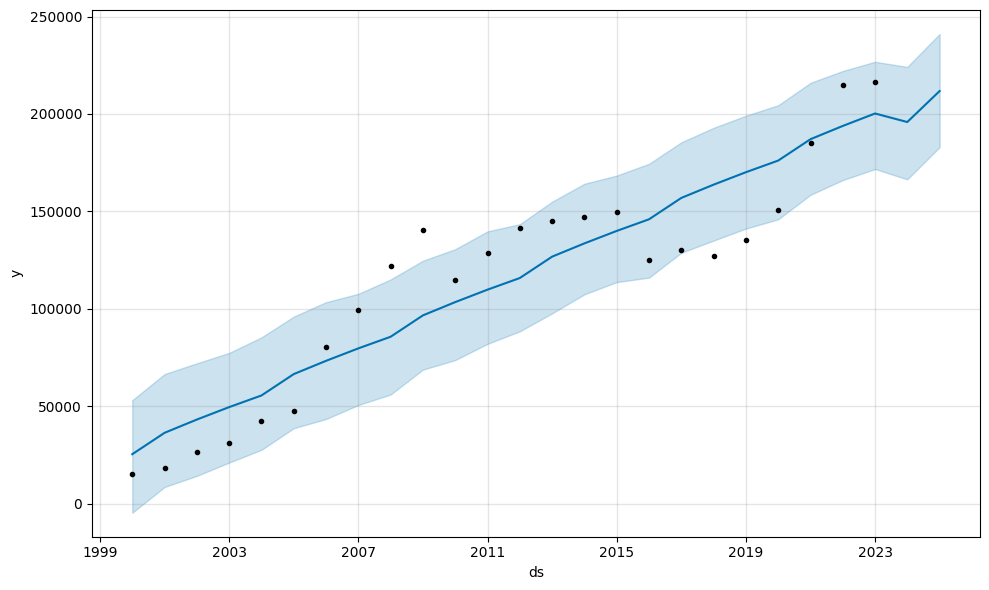

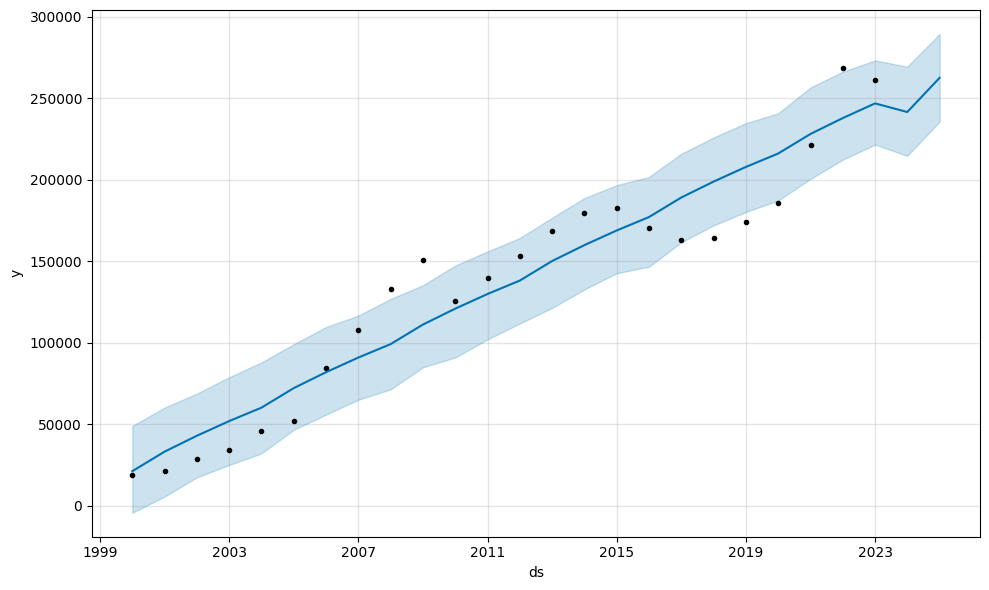

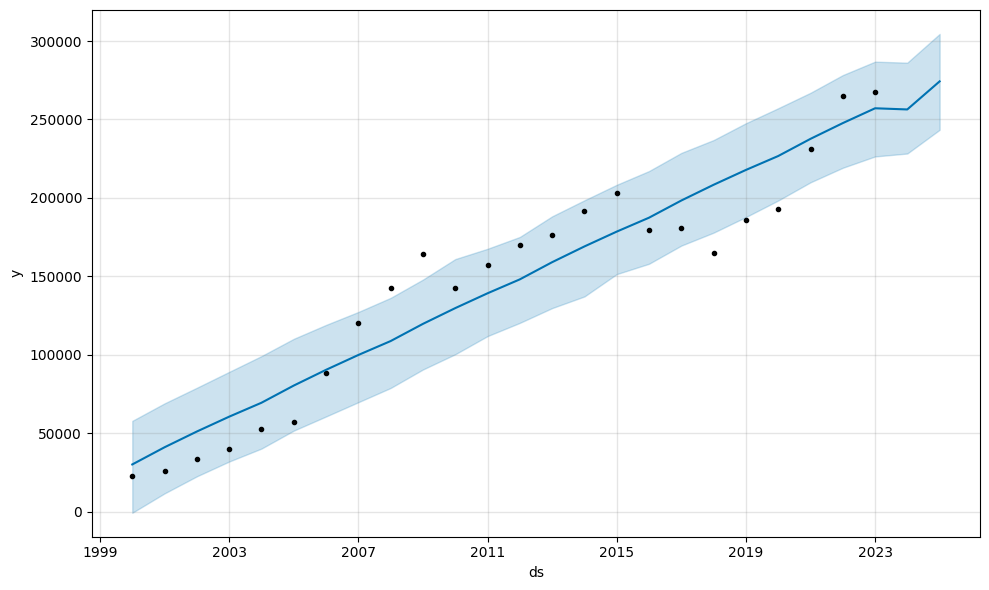

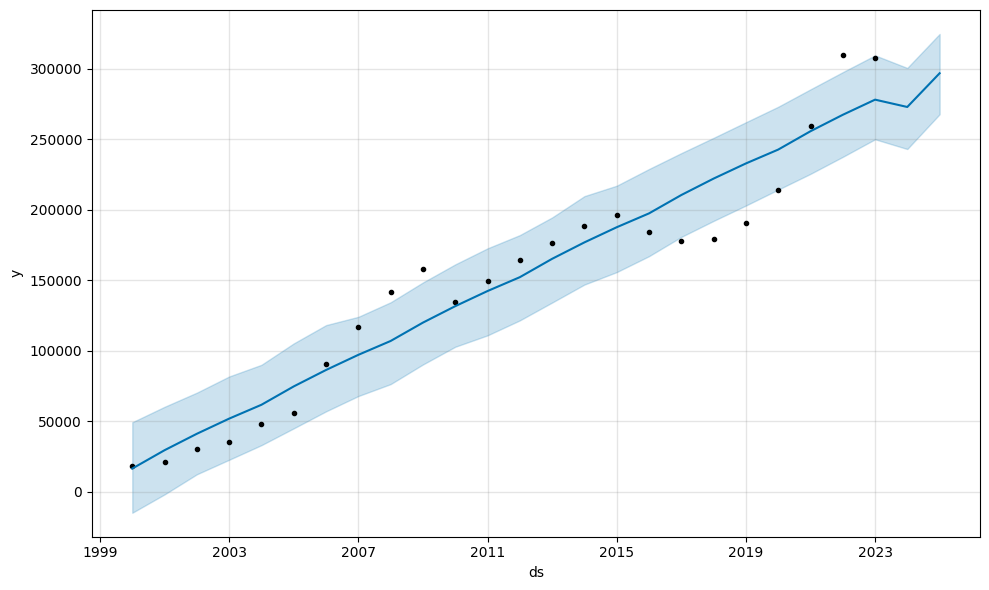

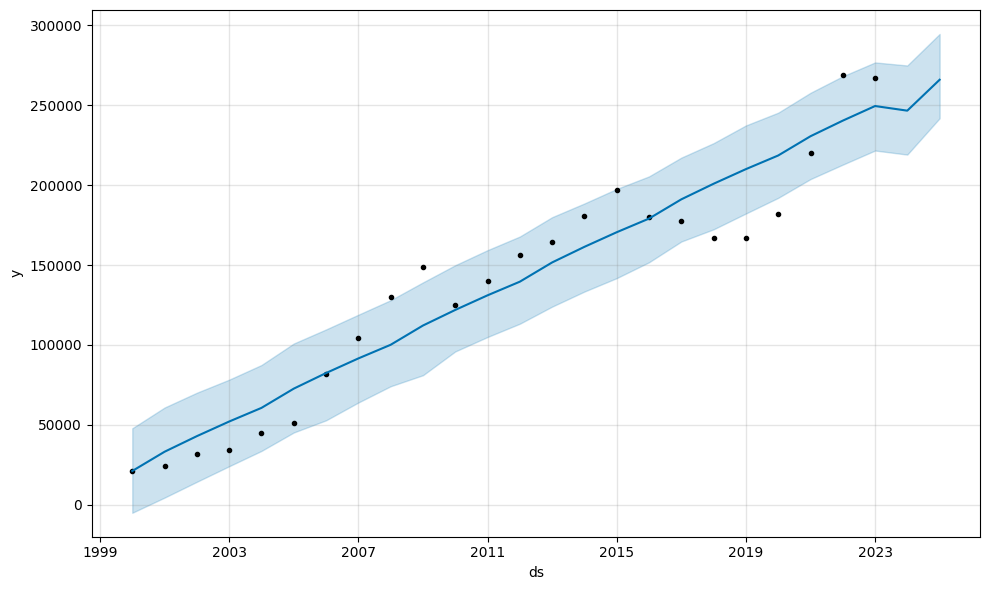

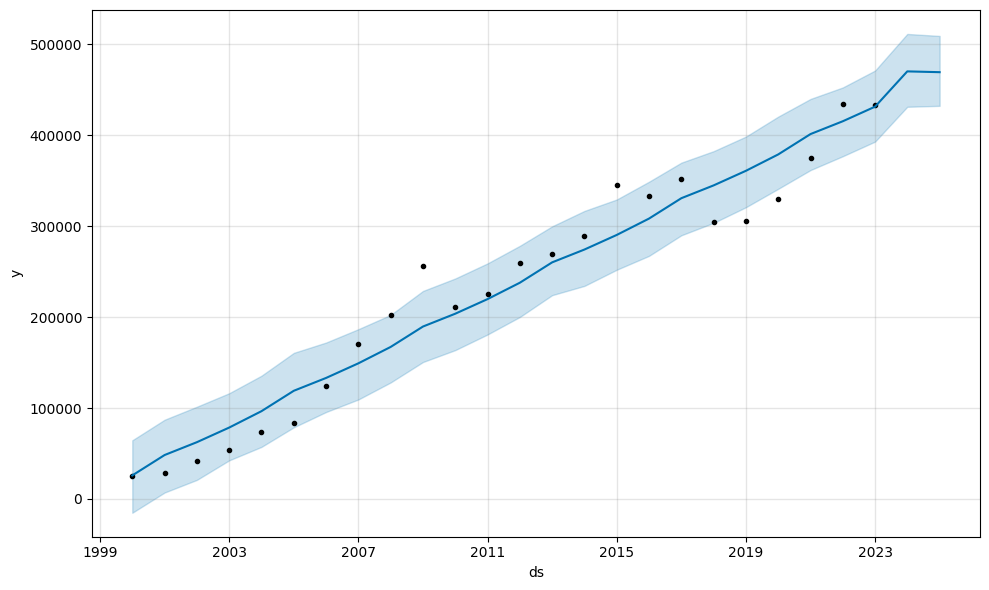

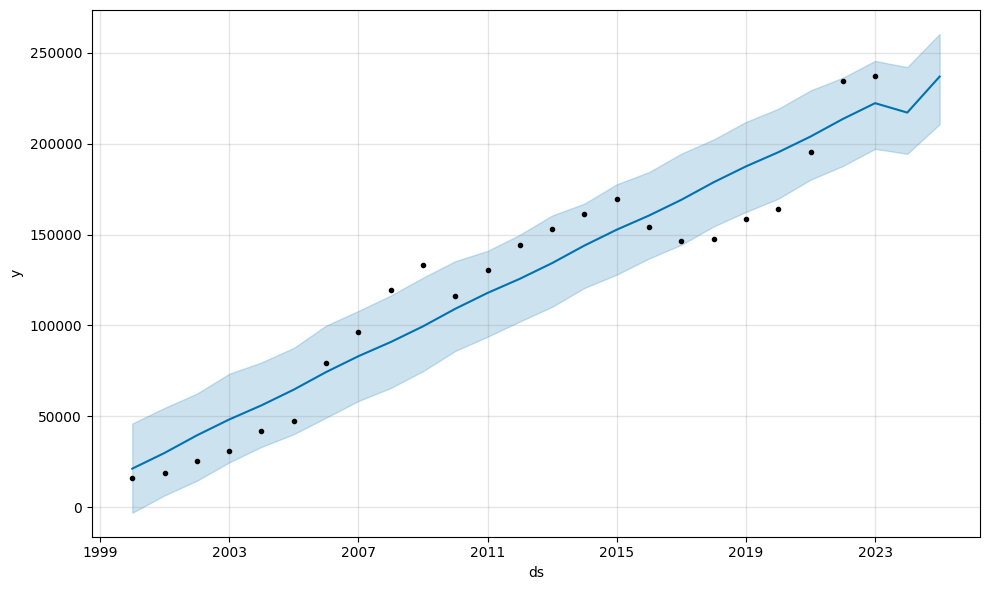

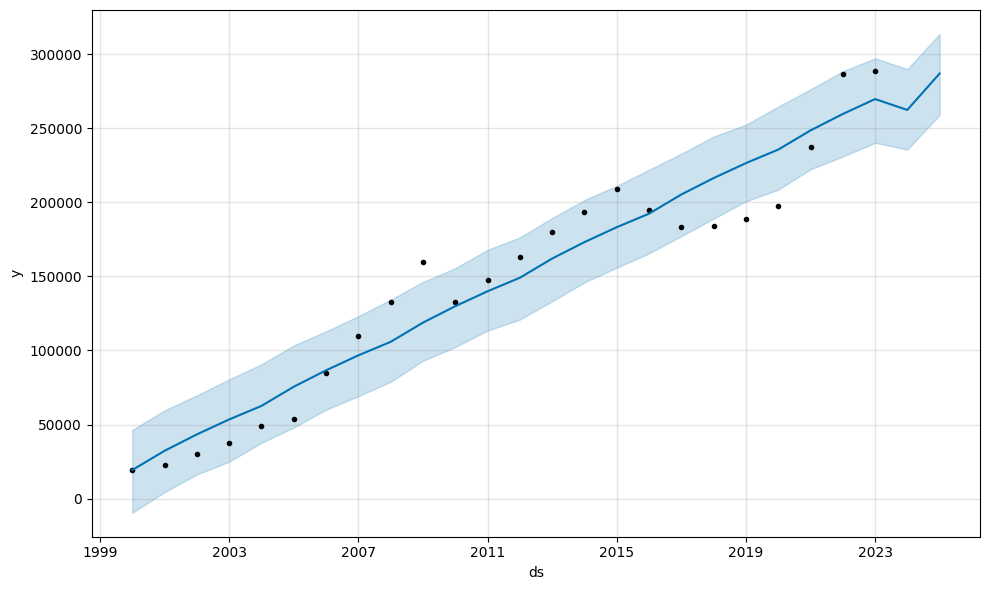

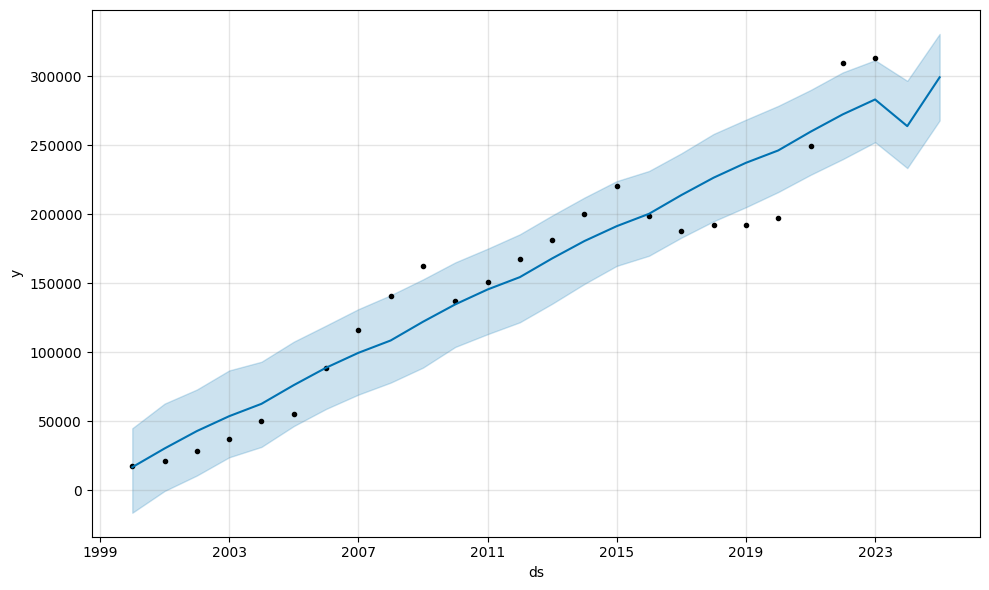

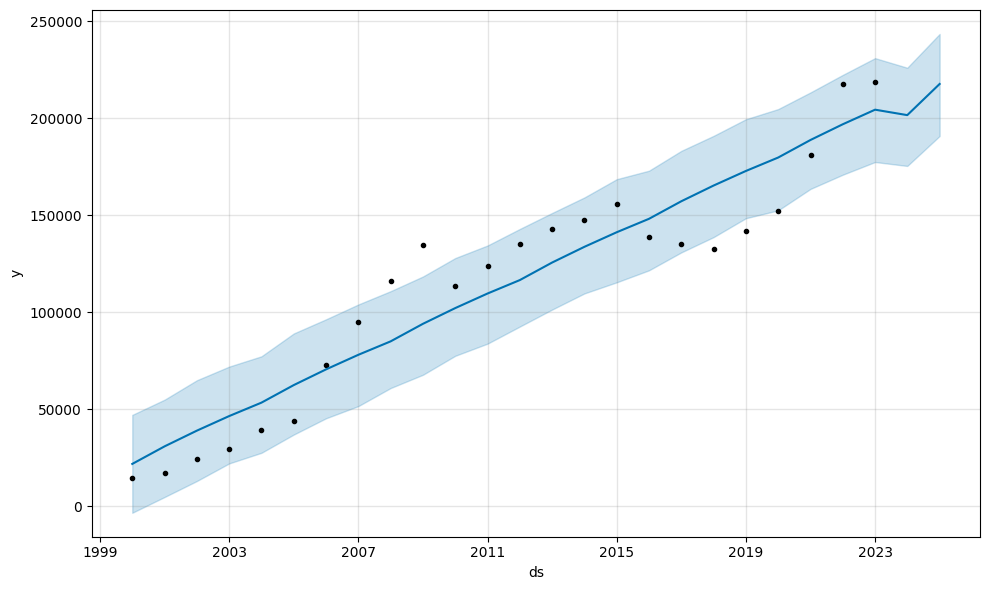

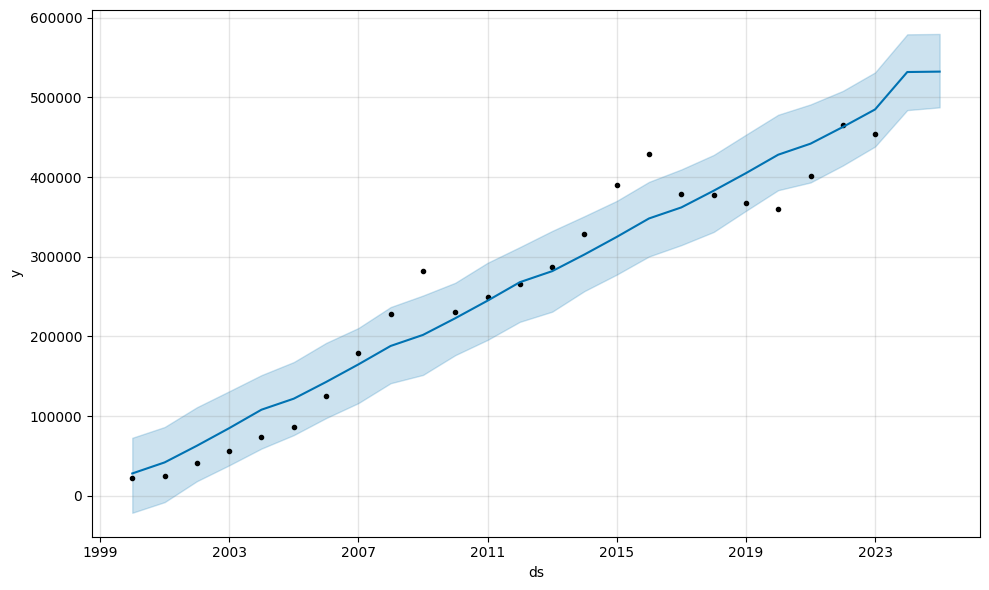

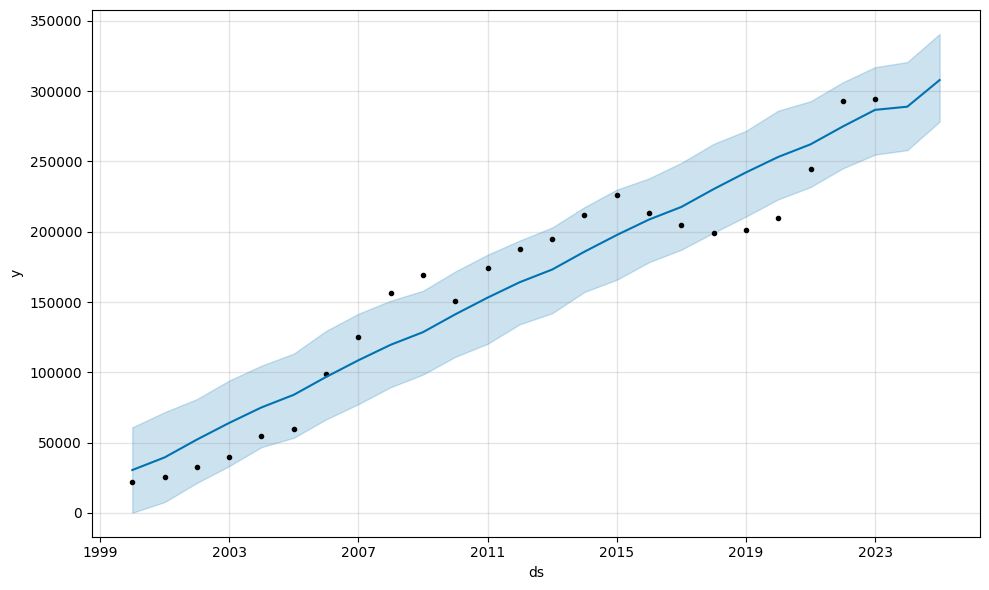

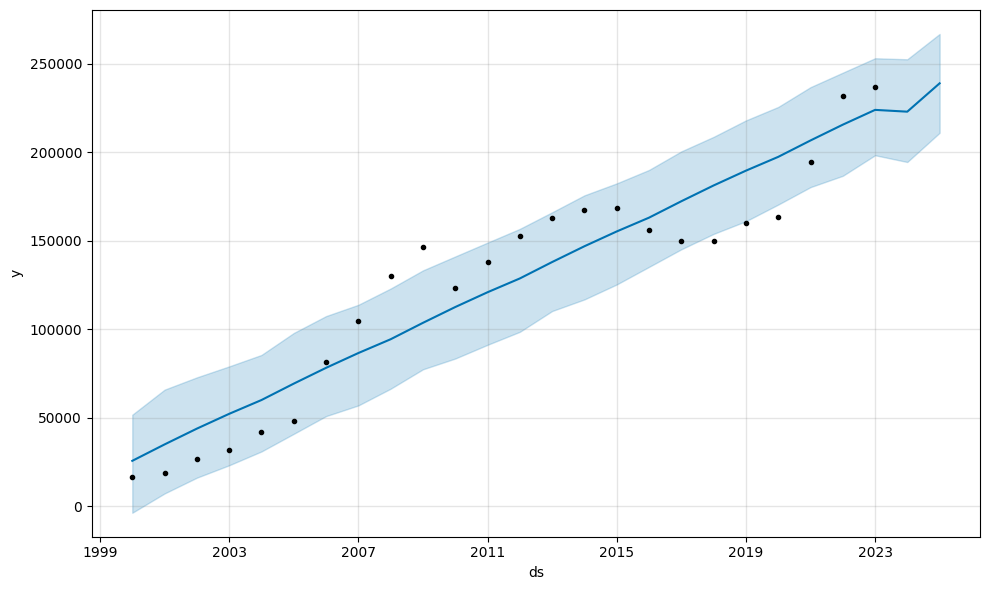

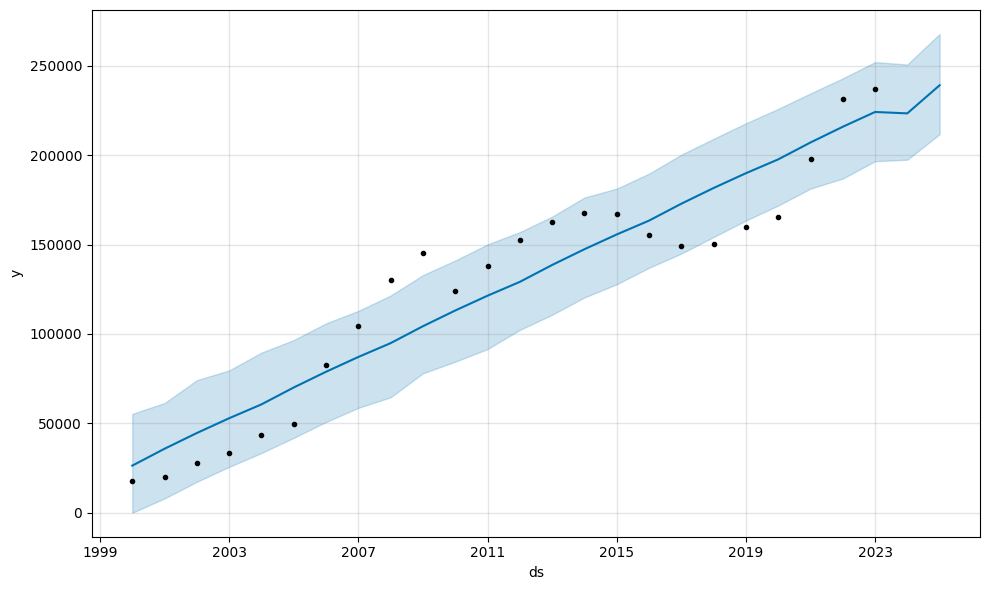

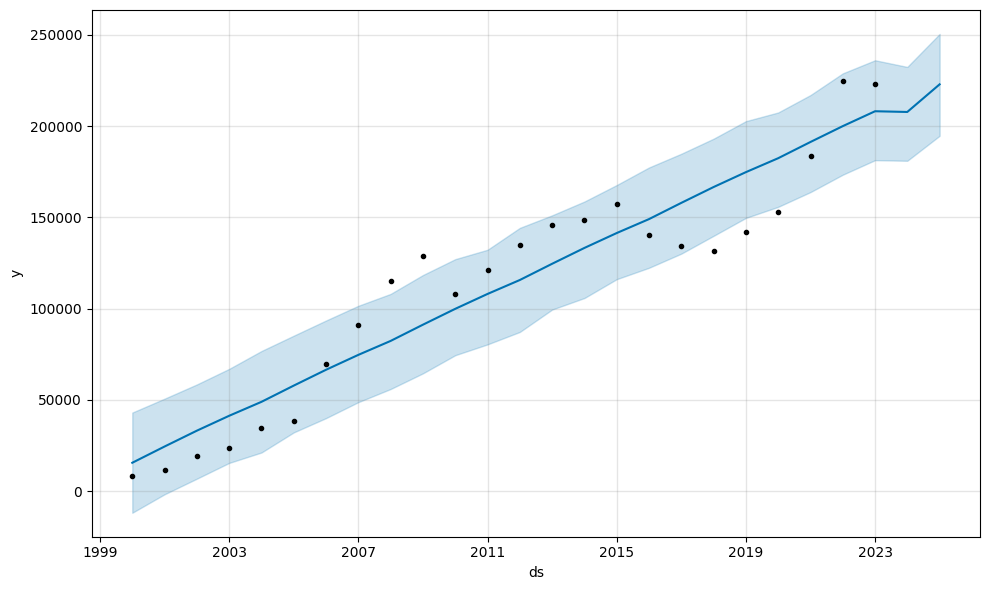

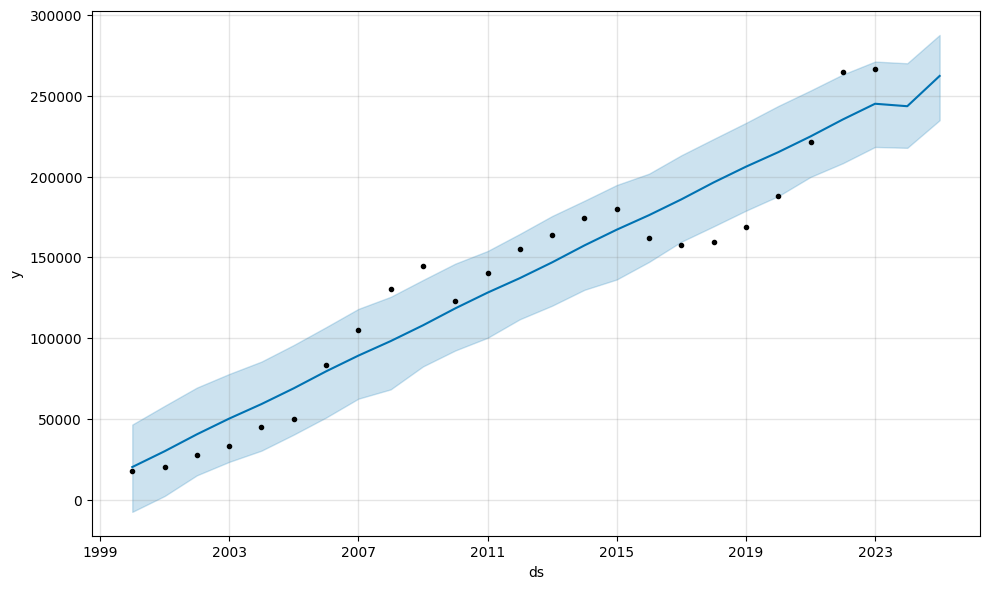

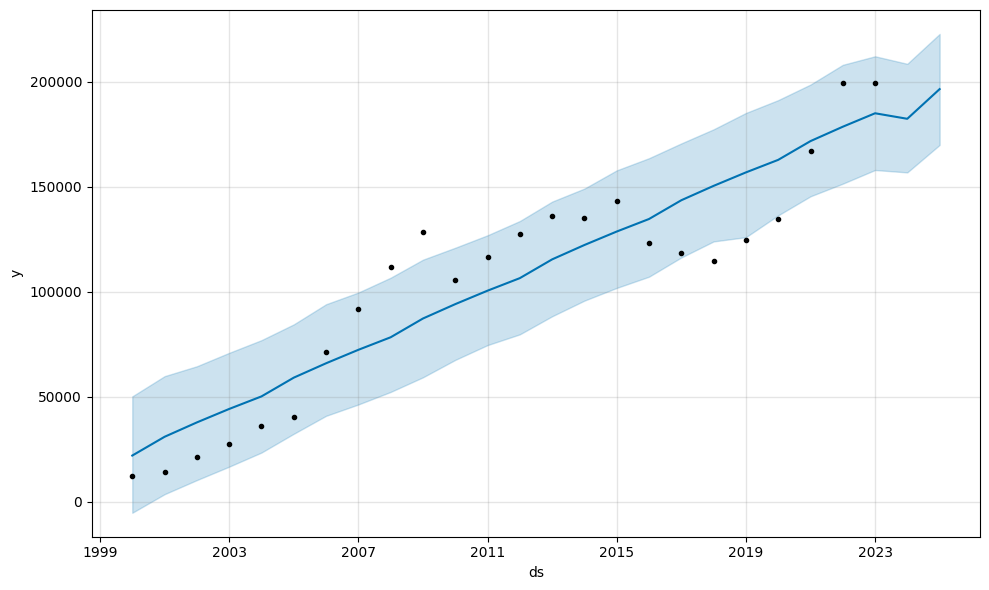

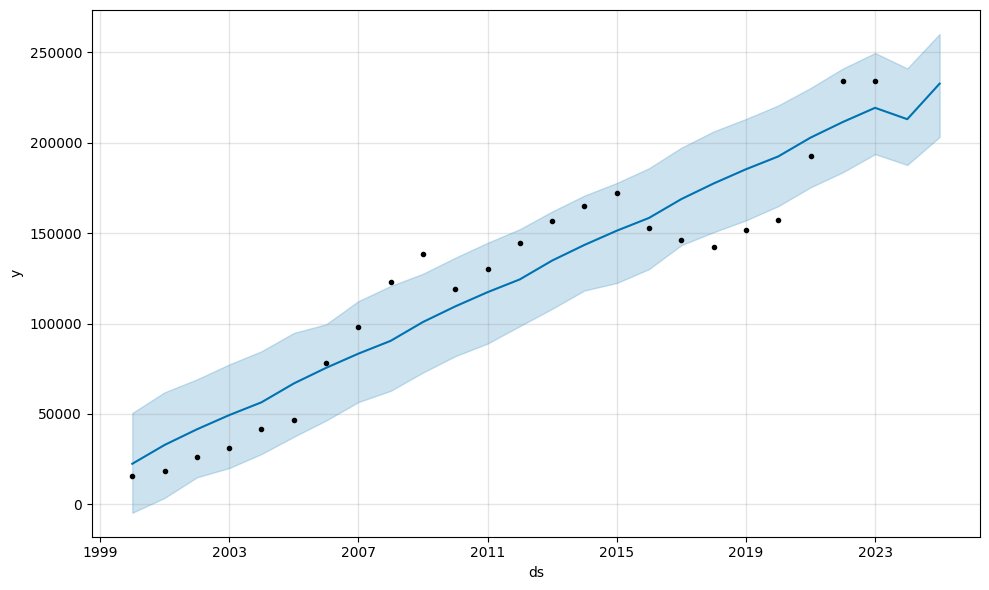

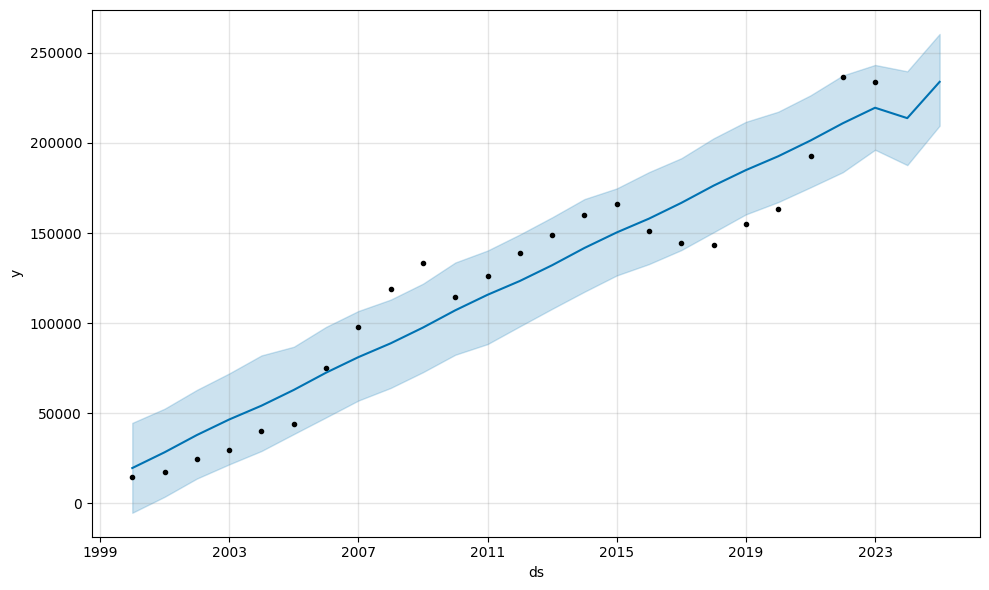

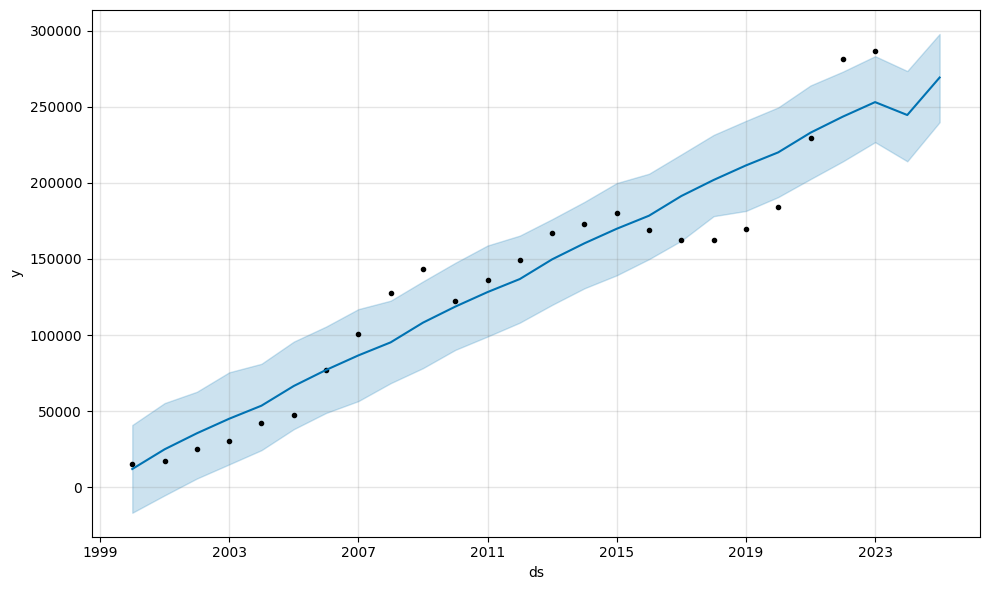

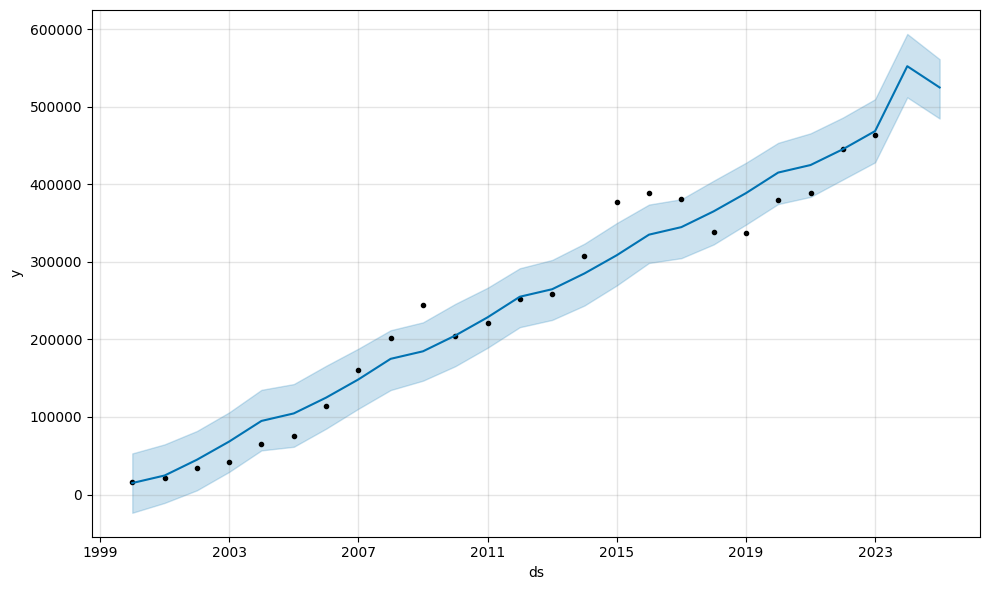

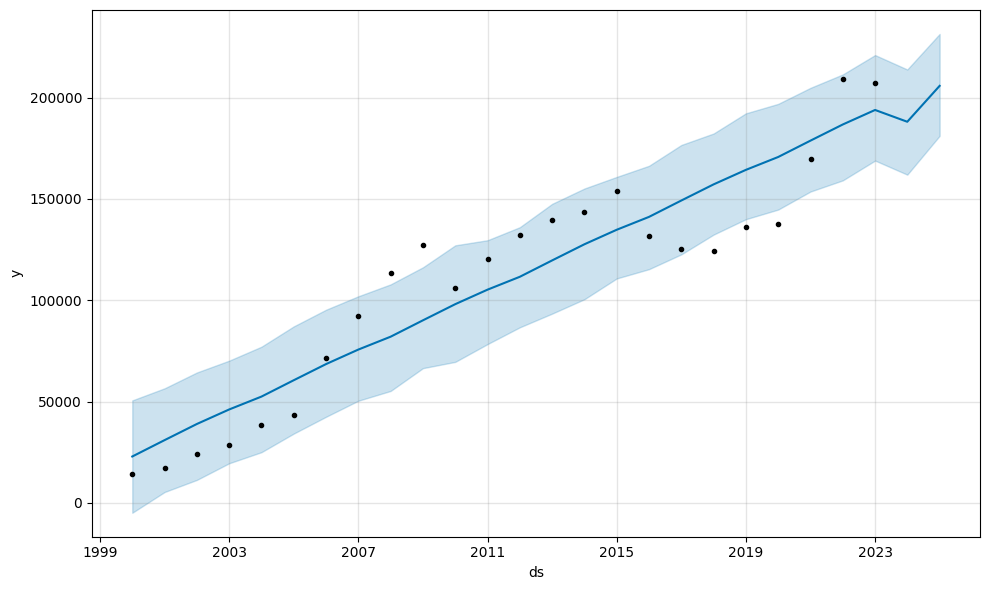

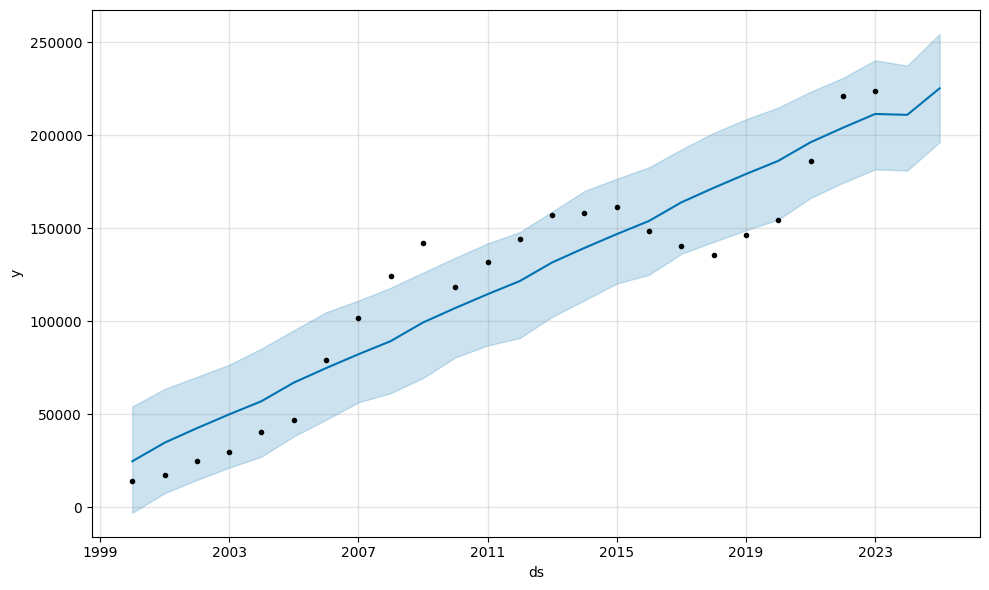

In [75]:
model = Prophet()

total_metrics = pd.DataFrame(columns=["MAE", "MSE", "RMSE", "MAPE (%)", "R2 Score"])

for i in range(0, 127):
    filtered_df = df[df['Район'] == i]


    test_years = df_interpolated['Год'].max() - 1  # последние 2 года
    
    train_df = filtered_df[filtered_df['Год'] < test_years].copy()
    test_df = filtered_df[filtered_df['Год'] >= test_years].copy()


    features = ['Ковид', 'Санкции', 'Ключевая ставка ЦБ РФ (%)', 'Доллар', 'ИПЦ (% к декабрю предыдущего года)', 'Год', 'Район']
    target = 'Цена'
    
    X_train = train_df[features]
    y_train = train_df[target]
    
    X_test = test_df[features]
    y_test = test_df[target]

    df_prophet = train_df[['Год', 'Цена']].copy()
    df_prophet = df_prophet.rename(columns={'Год': 'ds', 'Цена': 'y'})

    def convert_decimal_year_to_datetime(decimal_year):
        year = int(decimal_year)
        remainder = decimal_year - year
        month = int(remainder * 12) + 1  # +1 чтобы январь был 1
        return pd.Timestamp(year=year, month=month, day=1)

    # Применяем
    df_prophet['ds'] = df_prophet['ds'].apply(convert_decimal_year_to_datetime)
    
    # Инициализируем и обучаем модель Prophet
    # print(i)
    model = Prophet()
    model.fit(df_prophet) 

    future = model.make_future_dataframe(periods=2, freq='Y')

    # Прогноз
    forecast = model.predict(future)
    # break

    current_metrics = evaluate_model(filtered_df['Цена'],forecast.yhat)
    # print(current_metrics)
    model.plot(forecast)
    total_metrics.loc[len(total_metrics)] = current_metrics
    

In [74]:
total_metrics.mean()

MAE         2.000862e+04
MSE         5.681745e+08
RMSE        2.310886e+04
MAPE (%)    7.629103e+02
R2 Score    9.072388e-01
dtype: float64